In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPool2D,UpSampling2D
from keras.models import Model
from keras.optimizers import  RMSprop

def extract_data(filename,num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_images)
        data = np.frombuffer(buf,dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images,28,28)
        return data


train_data = extract_data('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\train-images-idx3-ubyte.gz',60000)
test_data = extract_data('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\t10k-images-idx3-ubyte.gz',10000)

def extract_labels(filename,num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1*num_images)
        labels = np.frombuffer(buf,dtype=np.uint8).astype(np.int64)
        return labels
train_labels = extract_labels('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\train-labels-idx1-ubyte.gz',60000)
test_labels = extract_labels('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\t10k-labels-idx1-ubyte.gz',10000)



C:\Users\HyunA\AppData\Local\conda\conda\envs\tutorial\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [2]:
# create dictionary of target classes 
label_dict = {
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
    7:'H',
    8:'I',
    9:'J'
}

In [3]:
train_data = train_data.reshape(-1,28,28,1)
test_data = test_data.reshape(-1,28,28,1)

In [4]:
# 0-1 사이 값으로 rescale 하기
# np.max(train_data),np.max(test_data)

train_data = train_data/np.max(train_data)
test_data = test_data/np.max(test_data)

np.max(train_data),np.max(test_data)


(1.0, 1.0)

In [5]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_ground,valid_ground = train_test_split(train_data,train_data,test_size=0.2, random_state=13)


In [7]:
#noise 추가
noise_factor = 0.5
x_train_noisy = train_X + noise_factor * np.random.normal(loc=0.0,scale=1.0, size = train_X.shape)
x_valid_noisy = valid_X + noise_factor * np.random.normal(loc=0.0,scale=1.0, size = valid_X.shape)
x_test_noisy = test_data + noise_factor* np.random.normal(loc=0.0,scale=1.0, size = test_data.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_valid_noisy = np.clip(x_valid_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)


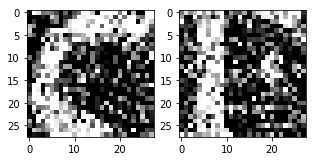

In [11]:
plt.figure(figsize=[5,5])

# display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train_noisy[1],(28,28))
plt.imshow(curr_img, cmap='gray')

# display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test_noisy[1],(28,28))
plt.imshow(curr_img, cmap='gray')

In [12]:
# denosing autoencoder network
batch_size = 128
epoch = 10
inChannel = 1
x, y = 28,28
input_img = Input(shape=(x,y,inChannel))


In [15]:
def autoencoder(input_img):
    # encoder
    conv1 = Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
    pool1 = MaxPool2D(pool_size=(2,2))(conv1)
    conv2 = Conv2D(64,(3,3), activation='relu', padding='same')(pool1)
    pool2 = MaxPool2D(pool_size=(2,2))(conv2)
    conv3 = Conv2D(128,(3,3),activation='relu', padding='same')(pool2)
    
    # decoder
    conv4  = Conv2D(128 ,(3,3), activation='relu', padding='same')(conv3)
    up1 = UpSampling2D((2,2))(conv4)
    conv5 = Conv2D(64,(3,3),activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2,2))(conv5)
    decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(up2)
    return decoded

In [17]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())


In [18]:
autoencoder_trian = autoencoder.fit(x_train_noisy,train_X, batch_size=batch_size, epochs = epoch, verbose = 1, validation_data = (x_valid_noisy,valid_X))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10


  128/48000 [..............................] - ETA: 10:18 - loss: 0.2149

  256/48000 [..............................] - ETA: 8:43 - loss: 0.2315 

  384/48000 [..............................] - ETA: 8:18 - loss: 0.2323

  512/48000 [..............................] - ETA: 7:52 - loss: 0.2268

  640/48000 [..............................] - ETA: 7:35 - loss: 0.2227

  768/48000 [..............................] - ETA: 7:23 - loss: 0.2184

  896/48000 [..............................] - ETA: 7:16 - loss: 0.2154

 1024/48000 [..............................] - ETA: 7:08 - loss: 0.2308

 1152/48000 [..............................] - ETA: 7:02 - loss: 0.2264

 1280/48000 [..............................] - ETA: 6:57 - loss: 0.2213

 1408/48000 [..............................] - ETA: 6:53 - loss: 0.2146

 1536/48000 [..............................] - ETA: 6:48 - loss: 0.2100

 1664/48000 [>.............................] - ETA: 6:44 - loss: 0.2220

 1792/48000 [>.............................] - ETA: 6:40 - loss: 0.2274

 1920/48000 [>.............................] - ETA: 6:37 - loss: 0.2227

 2048/48000 [>.............................] - ETA: 6:34 - loss: 0.2176

 2176/48000 [>.............................] - ETA: 6:31 - loss: 0.2116

 2304/48000 [>.............................] - ETA: 6:29 - loss: 0.2051

 2432/48000 [>.............................] - ETA: 6:27 - loss: 0.1995

 2560/48000 [>.............................] - ETA: 6:24 - loss: 0.2084

 2688/48000 [>.............................] - ETA: 6:22 - loss: 0.2045

 2816/48000 [>.............................] - ETA: 6:20 - loss: 0.2012

 2944/48000 [>.............................] - ETA: 6:18 - loss: 0.1975

 3072/48000 [>.............................] - ETA: 6:16 - loss: 0.1938

 3200/48000 [=>............................] - ETA: 6:15 - loss: 0.1900

 3328/48000 [=>............................] - ETA: 6:13 - loss: 0.1863

 3456/48000 [=>............................] - ETA: 6:12 - loss: 0.1832

 3584/48000 [=>............................] - ETA: 6:10 - loss: 0.1807

 3712/48000 [=>............................] - ETA: 6:09 - loss: 0.1790

 3840/48000 [=>............................] - ETA: 6:07 - loss: 0.1765

 3968/48000 [=>............................] - ETA: 6:06 - loss: 0.1735

 4096/48000 [=>............................] - ETA: 6:04 - loss: 0.1705

 4224/48000 [=>............................] - ETA: 6:03 - loss: 0.1676

 4352/48000 [=>............................] - ETA: 6:01 - loss: 0.1654

 4480/48000 [=>............................] - ETA: 6:00 - loss: 0.1640

 4608/48000 [=>............................] - ETA: 5:59 - loss: 0.1624

 4736/48000 [=>............................] - ETA: 5:57 - loss: 0.1601

 4864/48000 [==>...........................] - ETA: 5:56 - loss: 0.1577

 4992/48000 [==>...........................] - ETA: 5:55 - loss: 0.1554

 5120/48000 [==>...........................] - ETA: 5:53 - loss: 0.1531

 5248/48000 [==>...........................] - ETA: 5:52 - loss: 0.1509

 5376/48000 [==>...........................] - ETA: 5:51 - loss: 0.1496

 5504/48000 [==>...........................] - ETA: 5:50 - loss: 0.1500

 5632/48000 [==>...........................] - ETA: 5:48 - loss: 0.1488

 5760/48000 [==>...........................] - ETA: 5:47 - loss: 0.1471

 5888/48000 [==>...........................] - ETA: 5:46 - loss: 0.1452

 6016/48000 [==>...........................] - ETA: 5:44 - loss: 0.1434

 6144/48000 [==>...........................] - ETA: 5:43 - loss: 0.1416

 6272/48000 [==>...........................] - ETA: 5:42 - loss: 0.1400

 6400/48000 [===>..........................] - ETA: 5:41 - loss: 0.1388

 6528/48000 [===>..........................] - ETA: 5:40 - loss: 0.1383

 6656/48000 [===>..........................] - ETA: 5:38 - loss: 0.1373

 6784/48000 [===>..........................] - ETA: 5:37 - loss: 0.1361

 6912/48000 [===>..........................] - ETA: 5:36 - loss: 0.1347

 7040/48000 [===>..........................] - ETA: 5:35 - loss: 0.1332

 7168/48000 [===>..........................] - ETA: 5:34 - loss: 0.1319

 7296/48000 [===>..........................] - ETA: 5:33 - loss: 0.1307

 7424/48000 [===>..........................] - ETA: 5:32 - loss: 0.1299

 7552/48000 [===>..........................] - ETA: 5:31 - loss: 0.1293

 7680/48000 [===>..........................] - ETA: 5:29 - loss: 0.1284

 7808/48000 [===>..........................] - ETA: 5:28 - loss: 0.1273

 7936/48000 [===>..........................] - ETA: 5:27 - loss: 0.1261

 8064/48000 [====>.........................] - ETA: 5:26 - loss: 0.1249

 8192/48000 [====>.........................] - ETA: 5:25 - loss: 0.1238

 8320/48000 [====>.........................] - ETA: 5:24 - loss: 0.1230

 8448/48000 [====>.........................] - ETA: 5:23 - loss: 0.1222

 8576/48000 [====>.........................] - ETA: 5:22 - loss: 0.1216

 8704/48000 [====>.........................] - ETA: 5:20 - loss: 0.1207

 8832/48000 [====>.........................] - ETA: 5:19 - loss: 0.1198

 8960/48000 [====>.........................] - ETA: 5:18 - loss: 0.1189

 9088/48000 [====>.........................] - ETA: 5:17 - loss: 0.1180

 9216/48000 [====>.........................] - ETA: 5:16 - loss: 0.1172

 9344/48000 [====>.........................] - ETA: 5:15 - loss: 0.1166

 9472/48000 [====>.........................] - ETA: 5:14 - loss: 0.1158

 9600/48000 [=====>........................] - ETA: 5:13 - loss: 0.1150

 9728/48000 [=====>........................] - ETA: 5:12 - loss: 0.1142

 9856/48000 [=====>........................] - ETA: 5:10 - loss: 0.1136

 9984/48000 [=====>........................] - ETA: 5:09 - loss: 0.1129

10112/48000 [=====>........................] - ETA: 5:08 - loss: 0.1123

10240/48000 [=====>........................] - ETA: 5:07 - loss: 0.1117

10368/48000 [=====>........................] - ETA: 5:06 - loss: 0.1110

10496/48000 [=====>........................] - ETA: 5:05 - loss: 0.1104

10624/48000 [=====>........................] - ETA: 5:04 - loss: 0.1097

10752/48000 [=====>........................] - ETA: 5:03 - loss: 0.1090

10880/48000 [=====>........................] - ETA: 5:02 - loss: 0.1083

11008/48000 [=====>........................] - ETA: 5:01 - loss: 0.1078

11136/48000 [=====>........................] - ETA: 4:59 - loss: 0.1073

11264/48000 [======>.......................] - ETA: 4:58 - loss: 0.1067

11392/48000 [======>.......................] - ETA: 4:57 - loss: 0.1061

11520/48000 [======>.......................] - ETA: 4:56 - loss: 0.1054

11648/48000 [======>.......................] - ETA: 4:55 - loss: 0.1048

11776/48000 [======>.......................] - ETA: 4:54 - loss: 0.1041

11904/48000 [======>.......................] - ETA: 4:53 - loss: 0.1036

12032/48000 [======>.......................] - ETA: 4:52 - loss: 0.1031

12160/48000 [======>.......................] - ETA: 4:51 - loss: 0.1026

12288/48000 [======>.......................] - ETA: 4:50 - loss: 0.1021

12416/48000 [======>.......................] - ETA: 4:49 - loss: 0.1015

12544/48000 [======>.......................] - ETA: 4:48 - loss: 0.1009

12672/48000 [======>.......................] - ETA: 4:47 - loss: 0.1004

12800/48000 [=======>......................] - ETA: 4:46 - loss: 0.0998

12928/48000 [=======>......................] - ETA: 4:45 - loss: 0.0994

13056/48000 [=======>......................] - ETA: 4:44 - loss: 0.0990

13184/48000 [=======>......................] - ETA: 4:42 - loss: 0.0986

13312/48000 [=======>......................] - ETA: 4:41 - loss: 0.0981

13440/48000 [=======>......................] - ETA: 4:40 - loss: 0.0976

13568/48000 [=======>......................] - ETA: 4:39 - loss: 0.0971

13696/48000 [=======>......................] - ETA: 4:38 - loss: 0.0967

13824/48000 [=======>......................] - ETA: 4:37 - loss: 0.0963

13952/48000 [=======>......................] - ETA: 4:36 - loss: 0.0959

14080/48000 [=======>......................] - ETA: 4:35 - loss: 0.0955

14208/48000 [=======>......................] - ETA: 4:34 - loss: 0.0951

14336/48000 [=======>......................] - ETA: 4:33 - loss: 0.0947

14464/48000 [========>.....................] - ETA: 4:32 - loss: 0.0943

14592/48000 [========>.....................] - ETA: 4:31 - loss: 0.0938

14720/48000 [========>.....................] - ETA: 4:30 - loss: 0.0934

14848/48000 [========>.....................] - ETA: 4:28 - loss: 0.0930

14976/48000 [========>.....................] - ETA: 4:27 - loss: 0.0926

15104/48000 [========>.....................] - ETA: 4:26 - loss: 0.0922

15232/48000 [========>.....................] - ETA: 4:25 - loss: 0.0919

15360/48000 [========>.....................] - ETA: 4:24 - loss: 0.0915

15488/48000 [========>.....................] - ETA: 4:23 - loss: 0.0911

15616/48000 [========>.....................] - ETA: 4:22 - loss: 0.0907

15744/48000 [========>.....................] - ETA: 4:21 - loss: 0.0903

15872/48000 [========>.....................] - ETA: 4:20 - loss: 0.0900

16000/48000 [=========>....................] - ETA: 4:19 - loss: 0.0896

16128/48000 [=========>....................] - ETA: 4:18 - loss: 0.0893

16256/48000 [=========>....................] - ETA: 4:17 - loss: 0.0890

16384/48000 [=========>....................] - ETA: 4:16 - loss: 0.0887

16512/48000 [=========>....................] - ETA: 4:15 - loss: 0.0883

16640/48000 [=========>....................] - ETA: 4:14 - loss: 0.0879

16768/48000 [=========>....................] - ETA: 4:13 - loss: 0.0876

16896/48000 [=========>....................] - ETA: 4:11 - loss: 0.0872

17024/48000 [=========>....................] - ETA: 4:10 - loss: 0.0869

17152/48000 [=========>....................] - ETA: 4:09 - loss: 0.0866

17280/48000 [=========>....................] - ETA: 4:08 - loss: 0.0863

17408/48000 [=========>....................] - ETA: 4:07 - loss: 0.0860

17536/48000 [=========>....................] - ETA: 4:06 - loss: 0.0857

17664/48000 [==========>...................] - ETA: 4:05 - loss: 0.0854

17792/48000 [==========>...................] - ETA: 4:04 - loss: 0.0851

17920/48000 [==========>...................] - ETA: 4:03 - loss: 0.0847

18048/48000 [==========>...................] - ETA: 4:02 - loss: 0.0844

18176/48000 [==========>...................] - ETA: 4:01 - loss: 0.0841

18304/48000 [==========>...................] - ETA: 4:00 - loss: 0.0838

18432/48000 [==========>...................] - ETA: 3:59 - loss: 0.0835

18560/48000 [==========>...................] - ETA: 3:58 - loss: 0.0832

18688/48000 [==========>...................] - ETA: 3:57 - loss: 0.0830

18816/48000 [==========>...................] - ETA: 3:56 - loss: 0.0827

18944/48000 [==========>...................] - ETA: 3:55 - loss: 0.0825

19072/48000 [==========>...................] - ETA: 3:54 - loss: 0.0822

19200/48000 [===========>..................] - ETA: 3:53 - loss: 0.0818

19328/48000 [===========>..................] - ETA: 3:52 - loss: 0.0815

19456/48000 [===========>..................] - ETA: 3:52 - loss: 0.0812

19584/48000 [===========>..................] - ETA: 3:51 - loss: 0.0810

19712/48000 [===========>..................] - ETA: 3:50 - loss: 0.0808

19840/48000 [===========>..................] - ETA: 3:49 - loss: 0.0806

19968/48000 [===========>..................] - ETA: 3:48 - loss: 0.0804

20096/48000 [===========>..................] - ETA: 3:47 - loss: 0.0801

20224/48000 [===========>..................] - ETA: 3:46 - loss: 0.0799

20352/48000 [===========>..................] - ETA: 3:45 - loss: 0.0796

20480/48000 [===========>..................] - ETA: 3:44 - loss: 0.0793

20608/48000 [===========>..................] - ETA: 3:43 - loss: 0.0790

20736/48000 [===========>..................] - ETA: 3:42 - loss: 0.0787

20864/48000 [============>.................] - ETA: 3:42 - loss: 0.0785

20992/48000 [============>.................] - ETA: 3:41 - loss: 0.0784

21120/48000 [============>.................] - ETA: 3:40 - loss: 0.0782

21248/48000 [============>.................] - ETA: 3:39 - loss: 0.0780

21376/48000 [============>.................] - ETA: 3:38 - loss: 0.0778

21504/48000 [============>.................] - ETA: 3:37 - loss: 0.0776

21632/48000 [============>.................] - ETA: 3:36 - loss: 0.0773

21760/48000 [============>.................] - ETA: 3:35 - loss: 0.0771

21888/48000 [============>.................] - ETA: 3:34 - loss: 0.0769

22016/48000 [============>.................] - ETA: 3:32 - loss: 0.0766

22144/48000 [============>.................] - ETA: 3:31 - loss: 0.0764

22272/48000 [============>.................] - ETA: 3:30 - loss: 0.0762

22400/48000 [=============>................] - ETA: 3:29 - loss: 0.0759

22528/48000 [=============>................] - ETA: 3:28 - loss: 0.0757

22656/48000 [=============>................] - ETA: 3:27 - loss: 0.0755

22784/48000 [=============>................] - ETA: 3:26 - loss: 0.0753

22912/48000 [=============>................] - ETA: 3:25 - loss: 0.0751

23040/48000 [=============>................] - ETA: 3:24 - loss: 0.0748

23168/48000 [=============>................] - ETA: 3:24 - loss: 0.0747

23296/48000 [=============>................] - ETA: 3:22 - loss: 0.0744

23424/48000 [=============>................] - ETA: 3:21 - loss: 0.0742

23552/48000 [=============>................] - ETA: 3:20 - loss: 0.0740

23680/48000 [=============>................] - ETA: 3:19 - loss: 0.0738

23808/48000 [=============>................] - ETA: 3:18 - loss: 0.0736

23936/48000 [=============>................] - ETA: 3:17 - loss: 0.0734

24064/48000 [==============>...............] - ETA: 3:16 - loss: 0.0732

24192/48000 [==============>...............] - ETA: 3:15 - loss: 0.0730

24320/48000 [==============>...............] - ETA: 3:14 - loss: 0.0729

24448/48000 [==============>...............] - ETA: 3:13 - loss: 0.0727

24576/48000 [==============>...............] - ETA: 3:12 - loss: 0.0725

24704/48000 [==============>...............] - ETA: 3:11 - loss: 0.0723

24832/48000 [==============>...............] - ETA: 3:10 - loss: 0.0721

24960/48000 [==============>...............] - ETA: 3:09 - loss: 0.0719

25088/48000 [==============>...............] - ETA: 3:08 - loss: 0.0717

25216/48000 [==============>...............] - ETA: 3:06 - loss: 0.0715

25344/48000 [==============>...............] - ETA: 3:05 - loss: 0.0713

25472/48000 [==============>...............] - ETA: 3:04 - loss: 0.0712

25600/48000 [===============>..............] - ETA: 3:03 - loss: 0.0710

25728/48000 [===============>..............] - ETA: 3:02 - loss: 0.0708

25856/48000 [===============>..............] - ETA: 3:01 - loss: 0.0706

25984/48000 [===============>..............] - ETA: 3:00 - loss: 0.0705

26112/48000 [===============>..............] - ETA: 2:59 - loss: 0.0703

26240/48000 [===============>..............] - ETA: 2:58 - loss: 0.0701

26368/48000 [===============>..............] - ETA: 2:57 - loss: 0.0700

26496/48000 [===============>..............] - ETA: 2:56 - loss: 0.0698

26624/48000 [===============>..............] - ETA: 2:55 - loss: 0.0696

26752/48000 [===============>..............] - ETA: 2:54 - loss: 0.0694

26880/48000 [===============>..............] - ETA: 2:53 - loss: 0.0693

27008/48000 [===============>..............] - ETA: 2:52 - loss: 0.0691

27136/48000 [===============>..............] - ETA: 2:51 - loss: 0.0689

27264/48000 [================>.............] - ETA: 2:50 - loss: 0.0688

27392/48000 [================>.............] - ETA: 2:49 - loss: 0.0686

27520/48000 [================>.............] - ETA: 2:48 - loss: 0.0685

27648/48000 [================>.............] - ETA: 2:47 - loss: 0.0683

27776/48000 [================>.............] - ETA: 2:46 - loss: 0.0682

27904/48000 [================>.............] - ETA: 2:45 - loss: 0.0680

28032/48000 [================>.............] - ETA: 2:44 - loss: 0.0679

28160/48000 [================>.............] - ETA: 2:43 - loss: 0.0677

28288/48000 [================>.............] - ETA: 2:42 - loss: 0.0676

28416/48000 [================>.............] - ETA: 2:41 - loss: 0.0674

28544/48000 [================>.............] - ETA: 2:40 - loss: 0.0673

28672/48000 [================>.............] - ETA: 2:39 - loss: 0.0671

28800/48000 [=================>............] - ETA: 2:38 - loss: 0.0669

28928/48000 [=================>............] - ETA: 2:37 - loss: 0.0668

29056/48000 [=================>............] - ETA: 2:36 - loss: 0.0667

29184/48000 [=================>............] - ETA: 2:35 - loss: 0.0665

29312/48000 [=================>............] - ETA: 2:34 - loss: 0.0664

29440/48000 [=================>............] - ETA: 2:33 - loss: 0.0663

29568/48000 [=================>............] - ETA: 2:32 - loss: 0.0661

29696/48000 [=================>............] - ETA: 2:31 - loss: 0.0659

29824/48000 [=================>............] - ETA: 2:30 - loss: 0.0658

29952/48000 [=================>............] - ETA: 2:29 - loss: 0.0656

30080/48000 [=================>............] - ETA: 2:28 - loss: 0.0655

30208/48000 [=================>............] - ETA: 2:27 - loss: 0.0653

30336/48000 [=================>............] - ETA: 2:26 - loss: 0.0652

30464/48000 [==================>...........] - ETA: 2:25 - loss: 0.0651

30592/48000 [==================>...........] - ETA: 2:24 - loss: 0.0650

30720/48000 [==================>...........] - ETA: 2:23 - loss: 0.0649

30848/48000 [==================>...........] - ETA: 2:22 - loss: 0.0648

30976/48000 [==================>...........] - ETA: 2:21 - loss: 0.0647

31104/48000 [==================>...........] - ETA: 2:20 - loss: 0.0645

31232/48000 [==================>...........] - ETA: 2:19 - loss: 0.0644

31360/48000 [==================>...........] - ETA: 2:17 - loss: 0.0642

31488/48000 [==================>...........] - ETA: 2:16 - loss: 0.0641

31616/48000 [==================>...........] - ETA: 2:15 - loss: 0.0640

31744/48000 [==================>...........] - ETA: 2:14 - loss: 0.0639

31872/48000 [==================>...........] - ETA: 2:13 - loss: 0.0638

32000/48000 [===================>..........] - ETA: 2:12 - loss: 0.0636

32128/48000 [===================>..........] - ETA: 2:11 - loss: 0.0635

32256/48000 [===================>..........] - ETA: 2:10 - loss: 0.0634

32384/48000 [===================>..........] - ETA: 2:09 - loss: 0.0632

32512/48000 [===================>..........] - ETA: 2:08 - loss: 0.0631

32640/48000 [===================>..........] - ETA: 2:07 - loss: 0.0630

32768/48000 [===================>..........] - ETA: 2:06 - loss: 0.0628

32896/48000 [===================>..........] - ETA: 2:05 - loss: 0.0627

33024/48000 [===================>..........] - ETA: 2:04 - loss: 0.0626

33152/48000 [===================>..........] - ETA: 2:03 - loss: 0.0625

33280/48000 [===================>..........] - ETA: 2:02 - loss: 0.0624

33408/48000 [===================>..........] - ETA: 2:01 - loss: 0.0623

33536/48000 [===================>..........] - ETA: 2:00 - loss: 0.0622

33664/48000 [====================>.........] - ETA: 1:59 - loss: 0.0621

33792/48000 [====================>.........] - ETA: 1:58 - loss: 0.0620

33920/48000 [====================>.........] - ETA: 1:57 - loss: 0.0619

34048/48000 [====================>.........] - ETA: 1:55 - loss: 0.0618

34176/48000 [====================>.........] - ETA: 1:54 - loss: 0.0616

34304/48000 [====================>.........] - ETA: 1:53 - loss: 0.0615

34432/48000 [====================>.........] - ETA: 1:52 - loss: 0.0614

34560/48000 [====================>.........] - ETA: 1:51 - loss: 0.0613

34688/48000 [====================>.........] - ETA: 1:50 - loss: 0.0612

34816/48000 [====================>.........] - ETA: 1:49 - loss: 0.0611

34944/48000 [====================>.........] - ETA: 1:48 - loss: 0.0610

35072/48000 [====================>.........] - ETA: 1:47 - loss: 0.0609

35200/48000 [=====================>........] - ETA: 1:46 - loss: 0.0608

35328/48000 [=====================>........] - ETA: 1:45 - loss: 0.0607

35456/48000 [=====================>........] - ETA: 1:44 - loss: 0.0606

35584/48000 [=====================>........] - ETA: 1:43 - loss: 0.0605

35712/48000 [=====================>........] - ETA: 1:42 - loss: 0.0604

35840/48000 [=====================>........] - ETA: 1:41 - loss: 0.0603

35968/48000 [=====================>........] - ETA: 1:39 - loss: 0.0601

36096/48000 [=====================>........] - ETA: 1:38 - loss: 0.0600

36224/48000 [=====================>........] - ETA: 1:37 - loss: 0.0599

36352/48000 [=====================>........] - ETA: 1:36 - loss: 0.0598

36480/48000 [=====================>........] - ETA: 1:35 - loss: 0.0597

36608/48000 [=====================>........] - ETA: 1:34 - loss: 0.0596

36736/48000 [=====================>........] - ETA: 1:33 - loss: 0.0595

36864/48000 [======================>.......] - ETA: 1:32 - loss: 0.0594

36992/48000 [======================>.......] - ETA: 1:31 - loss: 0.0593

37120/48000 [======================>.......] - ETA: 1:30 - loss: 0.0592

37248/48000 [======================>.......] - ETA: 1:29 - loss: 0.0591

37376/48000 [======================>.......] - ETA: 1:28 - loss: 0.0591

37504/48000 [======================>.......] - ETA: 1:27 - loss: 0.0590

37632/48000 [======================>.......] - ETA: 1:26 - loss: 0.0589

37760/48000 [======================>.......] - ETA: 1:25 - loss: 0.0588

37888/48000 [======================>.......] - ETA: 1:24 - loss: 0.0586

38016/48000 [======================>.......] - ETA: 1:23 - loss: 0.0585

38144/48000 [======================>.......] - ETA: 1:22 - loss: 0.0585

38272/48000 [======================>.......] - ETA: 1:21 - loss: 0.0584

38400/48000 [=======================>......] - ETA: 1:19 - loss: 0.0583

38528/48000 [=======================>......] - ETA: 1:18 - loss: 0.0582

38656/48000 [=======================>......] - ETA: 1:17 - loss: 0.0581

38784/48000 [=======================>......] - ETA: 1:16 - loss: 0.0580

38912/48000 [=======================>......] - ETA: 1:15 - loss: 0.0579

39040/48000 [=======================>......] - ETA: 1:14 - loss: 0.0578

39168/48000 [=======================>......] - ETA: 1:13 - loss: 0.0578

39296/48000 [=======================>......] - ETA: 1:12 - loss: 0.0577

39424/48000 [=======================>......] - ETA: 1:11 - loss: 0.0576

39552/48000 [=======================>......] - ETA: 1:10 - loss: 0.0575

39680/48000 [=======================>......] - ETA: 1:09 - loss: 0.0574

39808/48000 [=======================>......] - ETA: 1:08 - loss: 0.0573

39936/48000 [=======================>......] - ETA: 1:07 - loss: 0.0572

40064/48000 [========================>.....] - ETA: 1:06 - loss: 0.0571

40192/48000 [========================>.....] - ETA: 1:05 - loss: 0.0570

40320/48000 [========================>.....] - ETA: 1:04 - loss: 0.0569

40448/48000 [========================>.....] - ETA: 1:03 - loss: 0.0568

40576/48000 [========================>.....] - ETA: 1:01 - loss: 0.0568

40704/48000 [========================>.....] - ETA: 1:00 - loss: 0.0567

40832/48000 [========================>.....] - ETA: 59s - loss: 0.0566 

40960/48000 [========================>.....] - ETA: 58s - loss: 0.0565

41088/48000 [========================>.....] - ETA: 57s - loss: 0.0564

41216/48000 [========================>.....] - ETA: 56s - loss: 0.0563

41344/48000 [========================>.....] - ETA: 55s - loss: 0.0563

41472/48000 [========================>.....] - ETA: 54s - loss: 0.0562

41600/48000 [=========================>....] - ETA: 53s - loss: 0.0561

41728/48000 [=========================>....] - ETA: 52s - loss: 0.0560

41856/48000 [=========================>....] - ETA: 51s - loss: 0.0559

41984/48000 [=========================>....] - ETA: 50s - loss: 0.0559

42112/48000 [=========================>....] - ETA: 49s - loss: 0.0558

42240/48000 [=========================>....] - ETA: 48s - loss: 0.0557

42368/48000 [=========================>....] - ETA: 46s - loss: 0.0556

42496/48000 [=========================>....] - ETA: 45s - loss: 0.0556

42624/48000 [=========================>....] - ETA: 44s - loss: 0.0555

42752/48000 [=========================>....] - ETA: 43s - loss: 0.0555

42880/48000 [=========================>....] - ETA: 42s - loss: 0.0554

43008/48000 [=========================>....] - ETA: 41s - loss: 0.0553

43136/48000 [=========================>....] - ETA: 40s - loss: 0.0552

43264/48000 [==========================>...] - ETA: 39s - loss: 0.0551

43392/48000 [==========================>...] - ETA: 38s - loss: 0.0550

43520/48000 [==========================>...] - ETA: 37s - loss: 0.0549

43648/48000 [==========================>...] - ETA: 36s - loss: 0.0548

43776/48000 [==========================>...] - ETA: 35s - loss: 0.0548

43904/48000 [==========================>...] - ETA: 34s - loss: 0.0547

44032/48000 [==========================>...] - ETA: 33s - loss: 0.0546

44160/48000 [==========================>...] - ETA: 31s - loss: 0.0546

44288/48000 [==========================>...] - ETA: 30s - loss: 0.0545

44416/48000 [==========================>...] - ETA: 29s - loss: 0.0544

44544/48000 [==========================>...] - ETA: 28s - loss: 0.0544

44672/48000 [==========================>...] - ETA: 27s - loss: 0.0543

44800/48000 [===========================>..] - ETA: 26s - loss: 0.0542

44928/48000 [===========================>..] - ETA: 25s - loss: 0.0542

45056/48000 [===========================>..] - ETA: 24s - loss: 0.0541

45184/48000 [===========================>..] - ETA: 23s - loss: 0.0540

45312/48000 [===========================>..] - ETA: 22s - loss: 0.0539

45440/48000 [===========================>..] - ETA: 21s - loss: 0.0539

45568/48000 [===========================>..] - ETA: 20s - loss: 0.0538

45696/48000 [===========================>..] - ETA: 19s - loss: 0.0537

45824/48000 [===========================>..] - ETA: 18s - loss: 0.0537

45952/48000 [===========================>..] - ETA: 17s - loss: 0.0536

46080/48000 [===========================>..] - ETA: 15s - loss: 0.0535

46208/48000 [===========================>..] - ETA: 14s - loss: 0.0535

46336/48000 [===========================>..] - ETA: 13s - loss: 0.0534

46464/48000 [============================>.] - ETA: 12s - loss: 0.0533

46592/48000 [============================>.] - ETA: 11s - loss: 0.0532

46720/48000 [============================>.] - ETA: 10s - loss: 0.0531

46848/48000 [============================>.] - ETA: 9s - loss: 0.0531 

46976/48000 [============================>.] - ETA: 8s - loss: 0.0530

47104/48000 [============================>.] - ETA: 7s - loss: 0.0529

47232/48000 [============================>.] - ETA: 6s - loss: 0.0529

47360/48000 [============================>.] - ETA: 5s - loss: 0.0528

47488/48000 [============================>.] - ETA: 4s - loss: 0.0528

47616/48000 [============================>.] - ETA: 3s - loss: 0.0527

47744/48000 [============================>.] - ETA: 2s - loss: 0.0526

47872/48000 [============================>.] - ETA: 1s - loss: 0.0526

48000/48000 [==============================] - 431s 9ms/step - loss: 0.0525 - val_loss: 0.0254


Epoch 2/10


  128/48000 [..............................] - ETA: 6:51 - loss: 0.0263

  256/48000 [..............................] - ETA: 6:56 - loss: 0.0273

  384/48000 [..............................] - ETA: 6:59 - loss: 0.0281

  512/48000 [..............................] - ETA: 6:49 - loss: 0.0285

  640/48000 [..............................] - ETA: 6:41 - loss: 0.0289

  768/48000 [..............................] - ETA: 6:37 - loss: 0.0291

  896/48000 [..............................] - ETA: 6:33 - loss: 0.0294

 1024/48000 [..............................] - ETA: 6:31 - loss: 0.0292

 1152/48000 [..............................] - ETA: 6:28 - loss: 0.0289

 1280/48000 [..............................] - ETA: 6:25 - loss: 0.0288

 1408/48000 [..............................] - ETA: 6:23 - loss: 0.0287

 1536/48000 [..............................] - ETA: 6:21 - loss: 0.0286

 1664/48000 [>.............................] - ETA: 6:20 - loss: 0.0285

 1792/48000 [>.............................] - ETA: 6:18 - loss: 0.0282

 1920/48000 [>.............................] - ETA: 6:18 - loss: 0.0282

 2048/48000 [>.............................] - ETA: 6:16 - loss: 0.0280

 2176/48000 [>.............................] - ETA: 6:14 - loss: 0.0281

 2304/48000 [>.............................] - ETA: 6:13 - loss: 0.0281

 2432/48000 [>.............................] - ETA: 6:11 - loss: 0.0281

 2560/48000 [>.............................] - ETA: 6:10 - loss: 0.0280

 2688/48000 [>.............................] - ETA: 6:09 - loss: 0.0281

 2816/48000 [>.............................] - ETA: 6:08 - loss: 0.0280

 2944/48000 [>.............................] - ETA: 6:08 - loss: 0.0280

 3072/48000 [>.............................] - ETA: 6:06 - loss: 0.0279

 3200/48000 [=>............................] - ETA: 6:07 - loss: 0.0278

 3328/48000 [=>............................] - ETA: 6:07 - loss: 0.0278

 3456/48000 [=>............................] - ETA: 6:07 - loss: 0.0277

 3584/48000 [=>............................] - ETA: 6:07 - loss: 0.0277

 3712/48000 [=>............................] - ETA: 6:09 - loss: 0.0277

 3840/48000 [=>............................] - ETA: 6:11 - loss: 0.0277

 3968/48000 [=>............................] - ETA: 6:13 - loss: 0.0277

 4096/48000 [=>............................] - ETA: 6:14 - loss: 0.0277

 4224/48000 [=>............................] - ETA: 6:14 - loss: 0.0279

 4352/48000 [=>............................] - ETA: 6:14 - loss: 0.0279

 4480/48000 [=>............................] - ETA: 6:14 - loss: 0.0279

 4608/48000 [=>............................] - ETA: 6:14 - loss: 0.0279

 4736/48000 [=>............................] - ETA: 6:14 - loss: 0.0278

 4864/48000 [==>...........................] - ETA: 6:13 - loss: 0.0277

 4992/48000 [==>...........................] - ETA: 6:13 - loss: 0.0277

 5120/48000 [==>...........................] - ETA: 6:11 - loss: 0.0276

 5248/48000 [==>...........................] - ETA: 6:09 - loss: 0.0276

 5376/48000 [==>...........................] - ETA: 6:08 - loss: 0.0277

 5504/48000 [==>...........................] - ETA: 6:06 - loss: 0.0277

 5632/48000 [==>...........................] - ETA: 6:06 - loss: 0.0277

 5760/48000 [==>...........................] - ETA: 6:04 - loss: 0.0278

 5888/48000 [==>...........................] - ETA: 6:03 - loss: 0.0277

 6016/48000 [==>...........................] - ETA: 6:01 - loss: 0.0276

 6144/48000 [==>...........................] - ETA: 6:00 - loss: 0.0275

 6272/48000 [==>...........................] - ETA: 5:58 - loss: 0.0275

 6400/48000 [===>..........................] - ETA: 5:57 - loss: 0.0274

 6528/48000 [===>..........................] - ETA: 5:55 - loss: 0.0274

 6656/48000 [===>..........................] - ETA: 5:54 - loss: 0.0274

 6784/48000 [===>..........................] - ETA: 5:53 - loss: 0.0275

 6912/48000 [===>..........................] - ETA: 5:52 - loss: 0.0275

 7040/48000 [===>..........................] - ETA: 5:51 - loss: 0.0275

 7168/48000 [===>..........................] - ETA: 5:50 - loss: 0.0275

 7296/48000 [===>..........................] - ETA: 5:49 - loss: 0.0275

 7424/48000 [===>..........................] - ETA: 5:47 - loss: 0.0274

 7552/48000 [===>..........................] - ETA: 5:46 - loss: 0.0274

 7680/48000 [===>..........................] - ETA: 5:45 - loss: 0.0274

 7808/48000 [===>..........................] - ETA: 5:44 - loss: 0.0274

 7936/48000 [===>..........................] - ETA: 5:44 - loss: 0.0274

 8064/48000 [====>.........................] - ETA: 5:45 - loss: 0.0274

 8192/48000 [====>.........................] - ETA: 5:45 - loss: 0.0274

 8320/48000 [====>.........................] - ETA: 5:46 - loss: 0.0274

 8448/48000 [====>.........................] - ETA: 5:46 - loss: 0.0274

 8576/48000 [====>.........................] - ETA: 5:45 - loss: 0.0274

 8704/48000 [====>.........................] - ETA: 5:44 - loss: 0.0274

 8832/48000 [====>.........................] - ETA: 5:44 - loss: 0.0275

 8960/48000 [====>.........................] - ETA: 5:44 - loss: 0.0275

 9088/48000 [====>.........................] - ETA: 5:43 - loss: 0.0275

 9216/48000 [====>.........................] - ETA: 5:42 - loss: 0.0275

 9344/48000 [====>.........................] - ETA: 5:41 - loss: 0.0275

 9472/48000 [====>.........................] - ETA: 5:40 - loss: 0.0275

 9600/48000 [=====>........................] - ETA: 5:39 - loss: 0.0274

 9728/48000 [=====>........................] - ETA: 5:37 - loss: 0.0274

 9856/48000 [=====>........................] - ETA: 5:36 - loss: 0.0273

 9984/48000 [=====>........................] - ETA: 5:35 - loss: 0.0273

10112/48000 [=====>........................] - ETA: 5:35 - loss: 0.0273

10240/48000 [=====>........................] - ETA: 5:33 - loss: 0.0272

10368/48000 [=====>........................] - ETA: 5:32 - loss: 0.0273

10496/48000 [=====>........................] - ETA: 5:31 - loss: 0.0272

10624/48000 [=====>........................] - ETA: 5:30 - loss: 0.0273

10752/48000 [=====>........................] - ETA: 5:29 - loss: 0.0273

10880/48000 [=====>........................] - ETA: 5:27 - loss: 0.0273

11008/48000 [=====>........................] - ETA: 5:29 - loss: 0.0273

11136/48000 [=====>........................] - ETA: 5:29 - loss: 0.0273

11264/48000 [======>.......................] - ETA: 5:28 - loss: 0.0273

11392/48000 [======>.......................] - ETA: 5:26 - loss: 0.0273

11520/48000 [======>.......................] - ETA: 5:25 - loss: 0.0272

11648/48000 [======>.......................] - ETA: 5:23 - loss: 0.0272

11776/48000 [======>.......................] - ETA: 5:22 - loss: 0.0271

11904/48000 [======>.......................] - ETA: 5:20 - loss: 0.0271

12032/48000 [======>.......................] - ETA: 5:19 - loss: 0.0272

12160/48000 [======>.......................] - ETA: 5:18 - loss: 0.0272

12288/48000 [======>.......................] - ETA: 5:16 - loss: 0.0272

12416/48000 [======>.......................] - ETA: 5:15 - loss: 0.0272

12544/48000 [======>.......................] - ETA: 5:14 - loss: 0.0271

12672/48000 [======>.......................] - ETA: 5:12 - loss: 0.0271

12800/48000 [=======>......................] - ETA: 5:11 - loss: 0.0271

12928/48000 [=======>......................] - ETA: 5:10 - loss: 0.0271

13056/48000 [=======>......................] - ETA: 5:09 - loss: 0.0270

13184/48000 [=======>......................] - ETA: 5:09 - loss: 0.0270

13312/48000 [=======>......................] - ETA: 5:07 - loss: 0.0270

13440/48000 [=======>......................] - ETA: 5:06 - loss: 0.0270

13568/48000 [=======>......................] - ETA: 5:05 - loss: 0.0270

13696/48000 [=======>......................] - ETA: 5:03 - loss: 0.0270

13824/48000 [=======>......................] - ETA: 5:02 - loss: 0.0270

13952/48000 [=======>......................] - ETA: 5:01 - loss: 0.0270

14080/48000 [=======>......................] - ETA: 4:59 - loss: 0.0270

14208/48000 [=======>......................] - ETA: 4:58 - loss: 0.0270

14336/48000 [=======>......................] - ETA: 4:57 - loss: 0.0270

14464/48000 [========>.....................] - ETA: 4:56 - loss: 0.0270

14592/48000 [========>.....................] - ETA: 4:55 - loss: 0.0269

14720/48000 [========>.....................] - ETA: 4:53 - loss: 0.0269

14848/48000 [========>.....................] - ETA: 4:52 - loss: 0.0269

14976/48000 [========>.....................] - ETA: 4:51 - loss: 0.0269

15104/48000 [========>.....................] - ETA: 4:50 - loss: 0.0269

15232/48000 [========>.....................] - ETA: 4:49 - loss: 0.0269

15360/48000 [========>.....................] - ETA: 4:48 - loss: 0.0268

15488/48000 [========>.....................] - ETA: 4:47 - loss: 0.0268

15616/48000 [========>.....................] - ETA: 4:45 - loss: 0.0268

15744/48000 [========>.....................] - ETA: 4:44 - loss: 0.0268

15872/48000 [========>.....................] - ETA: 4:43 - loss: 0.0268

16000/48000 [=========>....................] - ETA: 4:42 - loss: 0.0268

16128/48000 [=========>....................] - ETA: 4:41 - loss: 0.0268

16256/48000 [=========>....................] - ETA: 4:40 - loss: 0.0268

16384/48000 [=========>....................] - ETA: 4:39 - loss: 0.0268

16512/48000 [=========>....................] - ETA: 4:38 - loss: 0.0268

16640/48000 [=========>....................] - ETA: 4:37 - loss: 0.0268

16768/48000 [=========>....................] - ETA: 4:36 - loss: 0.0268

16896/48000 [=========>....................] - ETA: 4:35 - loss: 0.0267

17024/48000 [=========>....................] - ETA: 4:34 - loss: 0.0267

17152/48000 [=========>....................] - ETA: 4:33 - loss: 0.0267

17280/48000 [=========>....................] - ETA: 4:32 - loss: 0.0266

17408/48000 [=========>....................] - ETA: 4:31 - loss: 0.0266

17536/48000 [=========>....................] - ETA: 4:31 - loss: 0.0267

17664/48000 [==========>...................] - ETA: 4:30 - loss: 0.0267

17792/48000 [==========>...................] - ETA: 4:29 - loss: 0.0267

17920/48000 [==========>...................] - ETA: 4:27 - loss: 0.0267

18048/48000 [==========>...................] - ETA: 4:27 - loss: 0.0267

18176/48000 [==========>...................] - ETA: 4:25 - loss: 0.0267

18304/48000 [==========>...................] - ETA: 4:24 - loss: 0.0267

18432/48000 [==========>...................] - ETA: 4:23 - loss: 0.0266

18560/48000 [==========>...................] - ETA: 4:22 - loss: 0.0266

18688/48000 [==========>...................] - ETA: 4:20 - loss: 0.0266

18816/48000 [==========>...................] - ETA: 4:19 - loss: 0.0266

18944/48000 [==========>...................] - ETA: 4:19 - loss: 0.0265

19072/48000 [==========>...................] - ETA: 4:18 - loss: 0.0265

19200/48000 [===========>..................] - ETA: 4:16 - loss: 0.0265

19328/48000 [===========>..................] - ETA: 4:15 - loss: 0.0265

19456/48000 [===========>..................] - ETA: 4:14 - loss: 0.0265

19584/48000 [===========>..................] - ETA: 4:13 - loss: 0.0265

19712/48000 [===========>..................] - ETA: 4:11 - loss: 0.0265

19840/48000 [===========>..................] - ETA: 4:11 - loss: 0.0264

19968/48000 [===========>..................] - ETA: 4:10 - loss: 0.0264

20096/48000 [===========>..................] - ETA: 4:09 - loss: 0.0264

20224/48000 [===========>..................] - ETA: 4:08 - loss: 0.0264

20352/48000 [===========>..................] - ETA: 4:07 - loss: 0.0265

20480/48000 [===========>..................] - ETA: 4:05 - loss: 0.0265

20608/48000 [===========>..................] - ETA: 4:05 - loss: 0.0265

20736/48000 [===========>..................] - ETA: 4:04 - loss: 0.0265

20864/48000 [============>.................] - ETA: 4:03 - loss: 0.0264

20992/48000 [============>.................] - ETA: 4:02 - loss: 0.0264

21120/48000 [============>.................] - ETA: 4:01 - loss: 0.0264

21248/48000 [============>.................] - ETA: 4:00 - loss: 0.0264

21376/48000 [============>.................] - ETA: 3:58 - loss: 0.0264

21504/48000 [============>.................] - ETA: 3:57 - loss: 0.0263

21632/48000 [============>.................] - ETA: 3:56 - loss: 0.0263

21760/48000 [============>.................] - ETA: 3:55 - loss: 0.0263

21888/48000 [============>.................] - ETA: 3:54 - loss: 0.0263

22016/48000 [============>.................] - ETA: 3:52 - loss: 0.0263

22144/48000 [============>.................] - ETA: 3:51 - loss: 0.0264

22272/48000 [============>.................] - ETA: 3:50 - loss: 0.0264

22400/48000 [=============>................] - ETA: 3:49 - loss: 0.0264

22528/48000 [=============>................] - ETA: 3:47 - loss: 0.0264

22656/48000 [=============>................] - ETA: 3:46 - loss: 0.0263

22784/48000 [=============>................] - ETA: 3:45 - loss: 0.0263

22912/48000 [=============>................] - ETA: 3:44 - loss: 0.0263

23040/48000 [=============>................] - ETA: 3:42 - loss: 0.0263

23168/48000 [=============>................] - ETA: 3:41 - loss: 0.0263

23296/48000 [=============>................] - ETA: 3:40 - loss: 0.0262

23424/48000 [=============>................] - ETA: 3:39 - loss: 0.0262

23552/48000 [=============>................] - ETA: 3:38 - loss: 0.0263

23680/48000 [=============>................] - ETA: 3:36 - loss: 0.0263

23808/48000 [=============>................] - ETA: 3:35 - loss: 0.0263

23936/48000 [=============>................] - ETA: 3:34 - loss: 0.0263

24064/48000 [==============>...............] - ETA: 3:33 - loss: 0.0263

24192/48000 [==============>...............] - ETA: 3:32 - loss: 0.0263

24320/48000 [==============>...............] - ETA: 3:31 - loss: 0.0263

24448/48000 [==============>...............] - ETA: 3:30 - loss: 0.0262

24576/48000 [==============>...............] - ETA: 3:28 - loss: 0.0262

24704/48000 [==============>...............] - ETA: 3:27 - loss: 0.0262

24832/48000 [==============>...............] - ETA: 3:26 - loss: 0.0262

24960/48000 [==============>...............] - ETA: 3:25 - loss: 0.0262

25088/48000 [==============>...............] - ETA: 3:24 - loss: 0.0262

25216/48000 [==============>...............] - ETA: 3:23 - loss: 0.0262

25344/48000 [==============>...............] - ETA: 3:21 - loss: 0.0262

25472/48000 [==============>...............] - ETA: 3:20 - loss: 0.0262

25600/48000 [===============>..............] - ETA: 3:19 - loss: 0.0261

25728/48000 [===============>..............] - ETA: 3:18 - loss: 0.0261

25856/48000 [===============>..............] - ETA: 3:17 - loss: 0.0261

25984/48000 [===============>..............] - ETA: 3:16 - loss: 0.0261

26112/48000 [===============>..............] - ETA: 3:14 - loss: 0.0261

26240/48000 [===============>..............] - ETA: 3:13 - loss: 0.0261

26368/48000 [===============>..............] - ETA: 3:12 - loss: 0.0261

26496/48000 [===============>..............] - ETA: 3:11 - loss: 0.0261

26624/48000 [===============>..............] - ETA: 3:10 - loss: 0.0261

26752/48000 [===============>..............] - ETA: 3:08 - loss: 0.0261

26880/48000 [===============>..............] - ETA: 3:07 - loss: 0.0261

27008/48000 [===============>..............] - ETA: 3:07 - loss: 0.0261

27136/48000 [===============>..............] - ETA: 3:06 - loss: 0.0261

27264/48000 [================>.............] - ETA: 3:04 - loss: 0.0261

27392/48000 [================>.............] - ETA: 3:03 - loss: 0.0261

27520/48000 [================>.............] - ETA: 3:02 - loss: 0.0261

27648/48000 [================>.............] - ETA: 3:01 - loss: 0.0260

27776/48000 [================>.............] - ETA: 3:00 - loss: 0.0260

27904/48000 [================>.............] - ETA: 2:58 - loss: 0.0260

28032/48000 [================>.............] - ETA: 2:57 - loss: 0.0260

28160/48000 [================>.............] - ETA: 2:56 - loss: 0.0260

28288/48000 [================>.............] - ETA: 2:55 - loss: 0.0260

28416/48000 [================>.............] - ETA: 2:53 - loss: 0.0260

28544/48000 [================>.............] - ETA: 2:52 - loss: 0.0260

28672/48000 [================>.............] - ETA: 2:51 - loss: 0.0260

28800/48000 [=================>............] - ETA: 2:50 - loss: 0.0259

28928/48000 [=================>............] - ETA: 2:49 - loss: 0.0259

29056/48000 [=================>............] - ETA: 2:47 - loss: 0.0259

29184/48000 [=================>............] - ETA: 2:46 - loss: 0.0259

29312/48000 [=================>............] - ETA: 2:45 - loss: 0.0259

29440/48000 [=================>............] - ETA: 2:44 - loss: 0.0259

29568/48000 [=================>............] - ETA: 2:43 - loss: 0.0259

29696/48000 [=================>............] - ETA: 2:41 - loss: 0.0259

29824/48000 [=================>............] - ETA: 2:40 - loss: 0.0259

29952/48000 [=================>............] - ETA: 2:39 - loss: 0.0259

30080/48000 [=================>............] - ETA: 2:38 - loss: 0.0259

30208/48000 [=================>............] - ETA: 2:37 - loss: 0.0259

30336/48000 [=================>............] - ETA: 2:36 - loss: 0.0259

30464/48000 [==================>...........] - ETA: 2:34 - loss: 0.0259

30592/48000 [==================>...........] - ETA: 2:33 - loss: 0.0259

30720/48000 [==================>...........] - ETA: 2:32 - loss: 0.0259

30848/48000 [==================>...........] - ETA: 2:31 - loss: 0.0259

30976/48000 [==================>...........] - ETA: 2:30 - loss: 0.0259

31104/48000 [==================>...........] - ETA: 2:28 - loss: 0.0259

31232/48000 [==================>...........] - ETA: 2:27 - loss: 0.0259

31360/48000 [==================>...........] - ETA: 2:26 - loss: 0.0259

31488/48000 [==================>...........] - ETA: 2:25 - loss: 0.0259

31616/48000 [==================>...........] - ETA: 2:24 - loss: 0.0259

31744/48000 [==================>...........] - ETA: 2:23 - loss: 0.0258

31872/48000 [==================>...........] - ETA: 2:22 - loss: 0.0258

32000/48000 [===================>..........] - ETA: 2:21 - loss: 0.0258

32128/48000 [===================>..........] - ETA: 2:20 - loss: 0.0258

32256/48000 [===================>..........] - ETA: 2:18 - loss: 0.0258

32384/48000 [===================>..........] - ETA: 2:17 - loss: 0.0258

32512/48000 [===================>..........] - ETA: 2:16 - loss: 0.0258

32640/48000 [===================>..........] - ETA: 2:15 - loss: 0.0258

32768/48000 [===================>..........] - ETA: 2:14 - loss: 0.0257

32896/48000 [===================>..........] - ETA: 2:13 - loss: 0.0257

33024/48000 [===================>..........] - ETA: 2:12 - loss: 0.0257

33152/48000 [===================>..........] - ETA: 2:10 - loss: 0.0257

33280/48000 [===================>..........] - ETA: 2:09 - loss: 0.0258

33408/48000 [===================>..........] - ETA: 2:08 - loss: 0.0258

33536/48000 [===================>..........] - ETA: 2:07 - loss: 0.0257

33664/48000 [====================>.........] - ETA: 2:06 - loss: 0.0257

33792/48000 [====================>.........] - ETA: 2:05 - loss: 0.0257

33920/48000 [====================>.........] - ETA: 2:04 - loss: 0.0257

34048/48000 [====================>.........] - ETA: 2:03 - loss: 0.0257

34176/48000 [====================>.........] - ETA: 2:02 - loss: 0.0257

34304/48000 [====================>.........] - ETA: 2:01 - loss: 0.0257

34432/48000 [====================>.........] - ETA: 2:00 - loss: 0.0257

34560/48000 [====================>.........] - ETA: 1:58 - loss: 0.0257

34688/48000 [====================>.........] - ETA: 1:57 - loss: 0.0257

34816/48000 [====================>.........] - ETA: 1:56 - loss: 0.0256

34944/48000 [====================>.........] - ETA: 1:55 - loss: 0.0256

35072/48000 [====================>.........] - ETA: 1:54 - loss: 0.0256

35200/48000 [=====================>........] - ETA: 1:53 - loss: 0.0256

35328/48000 [=====================>........] - ETA: 1:52 - loss: 0.0256

35456/48000 [=====================>........] - ETA: 1:51 - loss: 0.0256

35584/48000 [=====================>........] - ETA: 1:49 - loss: 0.0256

35712/48000 [=====================>........] - ETA: 1:48 - loss: 0.0256

35840/48000 [=====================>........] - ETA: 1:47 - loss: 0.0256

35968/48000 [=====================>........] - ETA: 1:46 - loss: 0.0256

36096/48000 [=====================>........] - ETA: 1:45 - loss: 0.0256

36224/48000 [=====================>........] - ETA: 1:44 - loss: 0.0256

36352/48000 [=====================>........] - ETA: 1:43 - loss: 0.0256

36480/48000 [=====================>........] - ETA: 1:41 - loss: 0.0256

36608/48000 [=====================>........] - ETA: 1:40 - loss: 0.0255

36736/48000 [=====================>........] - ETA: 1:39 - loss: 0.0255

36864/48000 [======================>.......] - ETA: 1:38 - loss: 0.0255

36992/48000 [======================>.......] - ETA: 1:37 - loss: 0.0255

37120/48000 [======================>.......] - ETA: 1:36 - loss: 0.0255

37248/48000 [======================>.......] - ETA: 1:35 - loss: 0.0255

37376/48000 [======================>.......] - ETA: 1:34 - loss: 0.0255

37504/48000 [======================>.......] - ETA: 1:33 - loss: 0.0255

37632/48000 [======================>.......] - ETA: 1:31 - loss: 0.0255

37760/48000 [======================>.......] - ETA: 1:30 - loss: 0.0255

37888/48000 [======================>.......] - ETA: 1:29 - loss: 0.0255

38016/48000 [======================>.......] - ETA: 1:28 - loss: 0.0255

38144/48000 [======================>.......] - ETA: 1:27 - loss: 0.0255

38272/48000 [======================>.......] - ETA: 1:26 - loss: 0.0255

38400/48000 [=======================>......] - ETA: 1:24 - loss: 0.0255

38528/48000 [=======================>......] - ETA: 1:23 - loss: 0.0255

38656/48000 [=======================>......] - ETA: 1:22 - loss: 0.0254

38784/48000 [=======================>......] - ETA: 1:21 - loss: 0.0254

38912/48000 [=======================>......] - ETA: 1:20 - loss: 0.0254

39040/48000 [=======================>......] - ETA: 1:19 - loss: 0.0254

39168/48000 [=======================>......] - ETA: 1:18 - loss: 0.0254

39296/48000 [=======================>......] - ETA: 1:17 - loss: 0.0254

39424/48000 [=======================>......] - ETA: 1:16 - loss: 0.0254

39552/48000 [=======================>......] - ETA: 1:14 - loss: 0.0254

39680/48000 [=======================>......] - ETA: 1:13 - loss: 0.0254

39808/48000 [=======================>......] - ETA: 1:12 - loss: 0.0254

39936/48000 [=======================>......] - ETA: 1:11 - loss: 0.0254

40064/48000 [========================>.....] - ETA: 1:10 - loss: 0.0254

40192/48000 [========================>.....] - ETA: 1:09 - loss: 0.0254

40320/48000 [========================>.....] - ETA: 1:08 - loss: 0.0254

40448/48000 [========================>.....] - ETA: 1:07 - loss: 0.0254

40576/48000 [========================>.....] - ETA: 1:05 - loss: 0.0254

40704/48000 [========================>.....] - ETA: 1:04 - loss: 0.0253

40832/48000 [========================>.....] - ETA: 1:03 - loss: 0.0253

40960/48000 [========================>.....] - ETA: 1:02 - loss: 0.0253

41088/48000 [========================>.....] - ETA: 1:01 - loss: 0.0253

41216/48000 [========================>.....] - ETA: 1:00 - loss: 0.0253

41344/48000 [========================>.....] - ETA: 59s - loss: 0.0253 

41472/48000 [========================>.....] - ETA: 57s - loss: 0.0253

41600/48000 [=========================>....] - ETA: 56s - loss: 0.0253

41728/48000 [=========================>....] - ETA: 55s - loss: 0.0253

41856/48000 [=========================>....] - ETA: 54s - loss: 0.0253

41984/48000 [=========================>....] - ETA: 53s - loss: 0.0253

42112/48000 [=========================>....] - ETA: 52s - loss: 0.0253

42240/48000 [=========================>....] - ETA: 51s - loss: 0.0253

42368/48000 [=========================>....] - ETA: 50s - loss: 0.0253

42496/48000 [=========================>....] - ETA: 48s - loss: 0.0253

42624/48000 [=========================>....] - ETA: 47s - loss: 0.0253

42752/48000 [=========================>....] - ETA: 46s - loss: 0.0253

42880/48000 [=========================>....] - ETA: 45s - loss: 0.0253

43008/48000 [=========================>....] - ETA: 44s - loss: 0.0253

43136/48000 [=========================>....] - ETA: 43s - loss: 0.0252

43264/48000 [==========================>...] - ETA: 42s - loss: 0.0252

43392/48000 [==========================>...] - ETA: 40s - loss: 0.0252

43520/48000 [==========================>...] - ETA: 39s - loss: 0.0252

43648/48000 [==========================>...] - ETA: 38s - loss: 0.0252

43776/48000 [==========================>...] - ETA: 37s - loss: 0.0252

43904/48000 [==========================>...] - ETA: 36s - loss: 0.0252

44032/48000 [==========================>...] - ETA: 35s - loss: 0.0252

44160/48000 [==========================>...] - ETA: 34s - loss: 0.0252

44288/48000 [==========================>...] - ETA: 33s - loss: 0.0252

44416/48000 [==========================>...] - ETA: 31s - loss: 0.0252

44544/48000 [==========================>...] - ETA: 30s - loss: 0.0251

44672/48000 [==========================>...] - ETA: 29s - loss: 0.0251

44800/48000 [===========================>..] - ETA: 28s - loss: 0.0251

44928/48000 [===========================>..] - ETA: 27s - loss: 0.0251

45056/48000 [===========================>..] - ETA: 26s - loss: 0.0251

45184/48000 [===========================>..] - ETA: 25s - loss: 0.0251

45312/48000 [===========================>..] - ETA: 23s - loss: 0.0251

45440/48000 [===========================>..] - ETA: 22s - loss: 0.0251

45568/48000 [===========================>..] - ETA: 21s - loss: 0.0251

45696/48000 [===========================>..] - ETA: 20s - loss: 0.0251

45824/48000 [===========================>..] - ETA: 19s - loss: 0.0251

45952/48000 [===========================>..] - ETA: 18s - loss: 0.0251

46080/48000 [===========================>..] - ETA: 17s - loss: 0.0251

46208/48000 [===========================>..] - ETA: 15s - loss: 0.0251

46336/48000 [===========================>..] - ETA: 14s - loss: 0.0251

46464/48000 [============================>.] - ETA: 13s - loss: 0.0251

46592/48000 [============================>.] - ETA: 12s - loss: 0.0251

46720/48000 [============================>.] - ETA: 11s - loss: 0.0250

46848/48000 [============================>.] - ETA: 10s - loss: 0.0250

46976/48000 [============================>.] - ETA: 9s - loss: 0.0250 

47104/48000 [============================>.] - ETA: 7s - loss: 0.0250

47232/48000 [============================>.] - ETA: 6s - loss: 0.0250

47360/48000 [============================>.] - ETA: 5s - loss: 0.0250

47488/48000 [============================>.] - ETA: 4s - loss: 0.0250

47616/48000 [============================>.] - ETA: 3s - loss: 0.0250

47744/48000 [============================>.] - ETA: 2s - loss: 0.0250

47872/48000 [============================>.] - ETA: 1s - loss: 0.0250

48000/48000 [==============================] - 462s 10ms/step - loss: 0.0250 - val_loss: 0.0221


Epoch 3/10


  128/48000 [..............................] - ETA: 6:53 - loss: 0.0224

  256/48000 [..............................] - ETA: 6:48 - loss: 0.0224

  384/48000 [..............................] - ETA: 7:11 - loss: 0.0228

  512/48000 [..............................] - ETA: 7:06 - loss: 0.0229

  640/48000 [..............................] - ETA: 7:06 - loss: 0.0228

  768/48000 [..............................] - ETA: 7:05 - loss: 0.0224

  896/48000 [..............................] - ETA: 7:04 - loss: 0.0223

 1024/48000 [..............................] - ETA: 7:06 - loss: 0.0224

 1152/48000 [..............................] - ETA: 7:02 - loss: 0.0222

 1280/48000 [..............................] - ETA: 7:00 - loss: 0.0220

 1408/48000 [..............................] - ETA: 7:00 - loss: 0.0221

 1536/48000 [..............................] - ETA: 6:57 - loss: 0.0222

 1664/48000 [>.............................] - ETA: 6:57 - loss: 0.0225

 1792/48000 [>.............................] - ETA: 7:02 - loss: 0.0227

 1920/48000 [>.............................] - ETA: 7:09 - loss: 0.0228

 2048/48000 [>.............................] - ETA: 7:11 - loss: 0.0229

 2176/48000 [>.............................] - ETA: 7:12 - loss: 0.0228

 2304/48000 [>.............................] - ETA: 7:10 - loss: 0.0227

 2432/48000 [>.............................] - ETA: 7:07 - loss: 0.0227

 2560/48000 [>.............................] - ETA: 7:04 - loss: 0.0226

 2688/48000 [>.............................] - ETA: 7:01 - loss: 0.0226

 2816/48000 [>.............................] - ETA: 7:00 - loss: 0.0226

 2944/48000 [>.............................] - ETA: 6:58 - loss: 0.0225

 3072/48000 [>.............................] - ETA: 6:55 - loss: 0.0224

 3200/48000 [=>............................] - ETA: 6:55 - loss: 0.0224

 3328/48000 [=>............................] - ETA: 6:53 - loss: 0.0225

 3456/48000 [=>............................] - ETA: 6:55 - loss: 0.0225

 3584/48000 [=>............................] - ETA: 6:56 - loss: 0.0227

 3712/48000 [=>............................] - ETA: 6:53 - loss: 0.0227

 3840/48000 [=>............................] - ETA: 6:52 - loss: 0.0226

 3968/48000 [=>............................] - ETA: 6:50 - loss: 0.0226

 4096/48000 [=>............................] - ETA: 6:47 - loss: 0.0225

 4224/48000 [=>............................] - ETA: 6:46 - loss: 0.0225

 4352/48000 [=>............................] - ETA: 6:45 - loss: 0.0225

 4480/48000 [=>............................] - ETA: 6:44 - loss: 0.0224

 4608/48000 [=>............................] - ETA: 6:43 - loss: 0.0224

 4736/48000 [=>............................] - ETA: 6:42 - loss: 0.0224

 4864/48000 [==>...........................] - ETA: 6:41 - loss: 0.0224

 4992/48000 [==>...........................] - ETA: 6:39 - loss: 0.0224

 5120/48000 [==>...........................] - ETA: 6:39 - loss: 0.0224

 5248/48000 [==>...........................] - ETA: 6:40 - loss: 0.0224

 5376/48000 [==>...........................] - ETA: 6:44 - loss: 0.0224

 5504/48000 [==>...........................] - ETA: 6:44 - loss: 0.0224

 5632/48000 [==>...........................] - ETA: 6:42 - loss: 0.0224

 5760/48000 [==>...........................] - ETA: 6:40 - loss: 0.0224

 5888/48000 [==>...........................] - ETA: 6:39 - loss: 0.0224

 6016/48000 [==>...........................] - ETA: 6:37 - loss: 0.0223

 6144/48000 [==>...........................] - ETA: 6:36 - loss: 0.0223

 6272/48000 [==>...........................] - ETA: 6:36 - loss: 0.0223

 6400/48000 [===>..........................] - ETA: 6:36 - loss: 0.0222

 6528/48000 [===>..........................] - ETA: 6:33 - loss: 0.0223

 6656/48000 [===>..........................] - ETA: 6:31 - loss: 0.0223

 6784/48000 [===>..........................] - ETA: 6:30 - loss: 0.0223

 6912/48000 [===>..........................] - ETA: 6:28 - loss: 0.0223

 7040/48000 [===>..........................] - ETA: 6:27 - loss: 0.0223

 7168/48000 [===>..........................] - ETA: 6:25 - loss: 0.0223

 7296/48000 [===>..........................] - ETA: 6:23 - loss: 0.0223

 7424/48000 [===>..........................] - ETA: 6:23 - loss: 0.0223

 7552/48000 [===>..........................] - ETA: 6:22 - loss: 0.0222

 7680/48000 [===>..........................] - ETA: 6:20 - loss: 0.0222

 7808/48000 [===>..........................] - ETA: 6:18 - loss: 0.0222

 7936/48000 [===>..........................] - ETA: 6:16 - loss: 0.0223

 8064/48000 [====>.........................] - ETA: 6:14 - loss: 0.0223

 8192/48000 [====>.........................] - ETA: 6:12 - loss: 0.0223

 8320/48000 [====>.........................] - ETA: 6:10 - loss: 0.0223

 8448/48000 [====>.........................] - ETA: 6:08 - loss: 0.0223

 8576/48000 [====>.........................] - ETA: 6:07 - loss: 0.0223

 8704/48000 [====>.........................] - ETA: 6:05 - loss: 0.0223

 8832/48000 [====>.........................] - ETA: 6:04 - loss: 0.0222

 8960/48000 [====>.........................] - ETA: 6:03 - loss: 0.0222

 9088/48000 [====>.........................] - ETA: 6:01 - loss: 0.0222

 9216/48000 [====>.........................] - ETA: 6:00 - loss: 0.0222

 9344/48000 [====>.........................] - ETA: 5:58 - loss: 0.0223

 9472/48000 [====>.........................] - ETA: 5:57 - loss: 0.0223

 9600/48000 [=====>........................] - ETA: 5:55 - loss: 0.0223

 9728/48000 [=====>........................] - ETA: 5:53 - loss: 0.0222

 9856/48000 [=====>........................] - ETA: 5:52 - loss: 0.0222

 9984/48000 [=====>........................] - ETA: 5:51 - loss: 0.0222

10112/48000 [=====>........................] - ETA: 5:50 - loss: 0.0222

10240/48000 [=====>........................] - ETA: 5:49 - loss: 0.0222

10368/48000 [=====>........................] - ETA: 5:48 - loss: 0.0222

10496/48000 [=====>........................] - ETA: 5:46 - loss: 0.0222

10624/48000 [=====>........................] - ETA: 5:45 - loss: 0.0222

10752/48000 [=====>........................] - ETA: 5:43 - loss: 0.0222

10880/48000 [=====>........................] - ETA: 5:42 - loss: 0.0222

11008/48000 [=====>........................] - ETA: 5:40 - loss: 0.0222

11136/48000 [=====>........................] - ETA: 5:39 - loss: 0.0222

11264/48000 [======>.......................] - ETA: 5:37 - loss: 0.0221

11392/48000 [======>.......................] - ETA: 5:36 - loss: 0.0221

11520/48000 [======>.......................] - ETA: 5:35 - loss: 0.0221

11648/48000 [======>.......................] - ETA: 5:33 - loss: 0.0222

11776/48000 [======>.......................] - ETA: 5:32 - loss: 0.0222

11904/48000 [======>.......................] - ETA: 5:30 - loss: 0.0222

12032/48000 [======>.......................] - ETA: 5:29 - loss: 0.0222

12160/48000 [======>.......................] - ETA: 5:28 - loss: 0.0222

12288/48000 [======>.......................] - ETA: 5:27 - loss: 0.0222

12416/48000 [======>.......................] - ETA: 5:26 - loss: 0.0222

12544/48000 [======>.......................] - ETA: 5:26 - loss: 0.0222

12672/48000 [======>.......................] - ETA: 5:26 - loss: 0.0222

12800/48000 [=======>......................] - ETA: 5:27 - loss: 0.0221

12928/48000 [=======>......................] - ETA: 5:27 - loss: 0.0221

13056/48000 [=======>......................] - ETA: 5:27 - loss: 0.0221

13184/48000 [=======>......................] - ETA: 5:26 - loss: 0.0221

13312/48000 [=======>......................] - ETA: 5:26 - loss: 0.0221

13440/48000 [=======>......................] - ETA: 5:26 - loss: 0.0222

13568/48000 [=======>......................] - ETA: 5:25 - loss: 0.0222

13696/48000 [=======>......................] - ETA: 5:25 - loss: 0.0222

13824/48000 [=======>......................] - ETA: 5:24 - loss: 0.0222

13952/48000 [=======>......................] - ETA: 5:24 - loss: 0.0222

14080/48000 [=======>......................] - ETA: 5:23 - loss: 0.0222

14208/48000 [=======>......................] - ETA: 5:22 - loss: 0.0221

14336/48000 [=======>......................] - ETA: 5:21 - loss: 0.0221

14464/48000 [========>.....................] - ETA: 5:20 - loss: 0.0221

14592/48000 [========>.....................] - ETA: 5:19 - loss: 0.0221

14720/48000 [========>.....................] - ETA: 5:18 - loss: 0.0221

14848/48000 [========>.....................] - ETA: 5:17 - loss: 0.0221

14976/48000 [========>.....................] - ETA: 5:16 - loss: 0.0222

15104/48000 [========>.....................] - ETA: 5:15 - loss: 0.0222

15232/48000 [========>.....................] - ETA: 5:13 - loss: 0.0221

15360/48000 [========>.....................] - ETA: 5:12 - loss: 0.0222

15488/48000 [========>.....................] - ETA: 5:11 - loss: 0.0222

15616/48000 [========>.....................] - ETA: 5:09 - loss: 0.0222

15744/48000 [========>.....................] - ETA: 5:08 - loss: 0.0222

15872/48000 [========>.....................] - ETA: 5:07 - loss: 0.0222

16000/48000 [=========>....................] - ETA: 5:06 - loss: 0.0222

16128/48000 [=========>....................] - ETA: 5:05 - loss: 0.0222

16256/48000 [=========>....................] - ETA: 5:03 - loss: 0.0222

16384/48000 [=========>....................] - ETA: 5:02 - loss: 0.0221

16512/48000 [=========>....................] - ETA: 5:01 - loss: 0.0221

16640/48000 [=========>....................] - ETA: 4:59 - loss: 0.0221

16768/48000 [=========>....................] - ETA: 4:58 - loss: 0.0221

16896/48000 [=========>....................] - ETA: 4:57 - loss: 0.0222

17024/48000 [=========>....................] - ETA: 4:55 - loss: 0.0222

17152/48000 [=========>....................] - ETA: 4:54 - loss: 0.0222

17280/48000 [=========>....................] - ETA: 4:52 - loss: 0.0222

17408/48000 [=========>....................] - ETA: 4:51 - loss: 0.0222

17536/48000 [=========>....................] - ETA: 4:50 - loss: 0.0222

17664/48000 [==========>...................] - ETA: 4:48 - loss: 0.0222

17792/48000 [==========>...................] - ETA: 4:47 - loss: 0.0222

17920/48000 [==========>...................] - ETA: 4:46 - loss: 0.0222

18048/48000 [==========>...................] - ETA: 4:44 - loss: 0.0222

18176/48000 [==========>...................] - ETA: 4:43 - loss: 0.0222

18304/48000 [==========>...................] - ETA: 4:42 - loss: 0.0222

18432/48000 [==========>...................] - ETA: 4:41 - loss: 0.0222

18560/48000 [==========>...................] - ETA: 4:40 - loss: 0.0222

18688/48000 [==========>...................] - ETA: 4:39 - loss: 0.0222

18816/48000 [==========>...................] - ETA: 4:37 - loss: 0.0222

18944/48000 [==========>...................] - ETA: 4:36 - loss: 0.0222

19072/48000 [==========>...................] - ETA: 4:35 - loss: 0.0222

19200/48000 [===========>..................] - ETA: 4:33 - loss: 0.0222

19328/48000 [===========>..................] - ETA: 4:32 - loss: 0.0222

19456/48000 [===========>..................] - ETA: 4:30 - loss: 0.0222

19584/48000 [===========>..................] - ETA: 4:29 - loss: 0.0222

19712/48000 [===========>..................] - ETA: 4:28 - loss: 0.0222

19840/48000 [===========>..................] - ETA: 4:26 - loss: 0.0221

19968/48000 [===========>..................] - ETA: 4:25 - loss: 0.0221

20096/48000 [===========>..................] - ETA: 4:24 - loss: 0.0221

20224/48000 [===========>..................] - ETA: 4:23 - loss: 0.0221

20352/48000 [===========>..................] - ETA: 4:22 - loss: 0.0221

20480/48000 [===========>..................] - ETA: 4:21 - loss: 0.0221

20608/48000 [===========>..................] - ETA: 4:19 - loss: 0.0221

20736/48000 [===========>..................] - ETA: 4:18 - loss: 0.0221

20864/48000 [============>.................] - ETA: 4:17 - loss: 0.0221

20992/48000 [============>.................] - ETA: 4:16 - loss: 0.0221

21120/48000 [============>.................] - ETA: 4:14 - loss: 0.0221

21248/48000 [============>.................] - ETA: 4:13 - loss: 0.0221

21376/48000 [============>.................] - ETA: 4:12 - loss: 0.0221

21504/48000 [============>.................] - ETA: 4:10 - loss: 0.0221

21632/48000 [============>.................] - ETA: 4:09 - loss: 0.0221

21760/48000 [============>.................] - ETA: 4:08 - loss: 0.0221

21888/48000 [============>.................] - ETA: 4:06 - loss: 0.0221

22016/48000 [============>.................] - ETA: 4:05 - loss: 0.0221

22144/48000 [============>.................] - ETA: 4:04 - loss: 0.0221

22272/48000 [============>.................] - ETA: 4:02 - loss: 0.0221

22400/48000 [=============>................] - ETA: 4:01 - loss: 0.0221

22528/48000 [=============>................] - ETA: 4:00 - loss: 0.0221

22656/48000 [=============>................] - ETA: 3:59 - loss: 0.0221

22784/48000 [=============>................] - ETA: 3:57 - loss: 0.0221

22912/48000 [=============>................] - ETA: 3:56 - loss: 0.0221

23040/48000 [=============>................] - ETA: 3:55 - loss: 0.0221

23168/48000 [=============>................] - ETA: 3:54 - loss: 0.0221

23296/48000 [=============>................] - ETA: 3:53 - loss: 0.0221

23424/48000 [=============>................] - ETA: 3:51 - loss: 0.0221

23552/48000 [=============>................] - ETA: 3:50 - loss: 0.0221

23680/48000 [=============>................] - ETA: 3:49 - loss: 0.0221

23808/48000 [=============>................] - ETA: 3:47 - loss: 0.0221

23936/48000 [=============>................] - ETA: 3:46 - loss: 0.0221

24064/48000 [==============>...............] - ETA: 3:45 - loss: 0.0221

24192/48000 [==============>...............] - ETA: 3:43 - loss: 0.0220

24320/48000 [==============>...............] - ETA: 3:42 - loss: 0.0220

24448/48000 [==============>...............] - ETA: 3:41 - loss: 0.0220

24576/48000 [==============>...............] - ETA: 3:40 - loss: 0.0220

24704/48000 [==============>...............] - ETA: 3:39 - loss: 0.0220

24832/48000 [==============>...............] - ETA: 3:38 - loss: 0.0220

24960/48000 [==============>...............] - ETA: 3:37 - loss: 0.0220

25088/48000 [==============>...............] - ETA: 3:36 - loss: 0.0220

25216/48000 [==============>...............] - ETA: 3:34 - loss: 0.0220

25344/48000 [==============>...............] - ETA: 3:33 - loss: 0.0220

25472/48000 [==============>...............] - ETA: 3:32 - loss: 0.0220

25600/48000 [===============>..............] - ETA: 3:31 - loss: 0.0220

25728/48000 [===============>..............] - ETA: 3:30 - loss: 0.0220

25856/48000 [===============>..............] - ETA: 3:28 - loss: 0.0220

25984/48000 [===============>..............] - ETA: 3:27 - loss: 0.0220

26112/48000 [===============>..............] - ETA: 3:26 - loss: 0.0220

26240/48000 [===============>..............] - ETA: 3:25 - loss: 0.0220

26368/48000 [===============>..............] - ETA: 3:24 - loss: 0.0220

26496/48000 [===============>..............] - ETA: 3:23 - loss: 0.0220

26624/48000 [===============>..............] - ETA: 3:21 - loss: 0.0220

26752/48000 [===============>..............] - ETA: 3:20 - loss: 0.0220

26880/48000 [===============>..............] - ETA: 3:19 - loss: 0.0219

27008/48000 [===============>..............] - ETA: 3:18 - loss: 0.0219

27136/48000 [===============>..............] - ETA: 3:16 - loss: 0.0219

27264/48000 [================>.............] - ETA: 3:15 - loss: 0.0219

27392/48000 [================>.............] - ETA: 3:14 - loss: 0.0219

27520/48000 [================>.............] - ETA: 3:13 - loss: 0.0219

27648/48000 [================>.............] - ETA: 3:12 - loss: 0.0219

27776/48000 [================>.............] - ETA: 3:10 - loss: 0.0219

27904/48000 [================>.............] - ETA: 3:09 - loss: 0.0220

28032/48000 [================>.............] - ETA: 3:08 - loss: 0.0220

28160/48000 [================>.............] - ETA: 3:07 - loss: 0.0220

28288/48000 [================>.............] - ETA: 3:05 - loss: 0.0220

28416/48000 [================>.............] - ETA: 3:04 - loss: 0.0220

28544/48000 [================>.............] - ETA: 3:03 - loss: 0.0220

28672/48000 [================>.............] - ETA: 3:02 - loss: 0.0220

28800/48000 [=================>............] - ETA: 3:00 - loss: 0.0220

28928/48000 [=================>............] - ETA: 3:00 - loss: 0.0220

29056/48000 [=================>............] - ETA: 2:58 - loss: 0.0219

29184/48000 [=================>............] - ETA: 2:57 - loss: 0.0219

29312/48000 [=================>............] - ETA: 2:56 - loss: 0.0219

29440/48000 [=================>............] - ETA: 2:55 - loss: 0.0219

29568/48000 [=================>............] - ETA: 2:53 - loss: 0.0219

29696/48000 [=================>............] - ETA: 2:52 - loss: 0.0219

29824/48000 [=================>............] - ETA: 2:51 - loss: 0.0219

29952/48000 [=================>............] - ETA: 2:50 - loss: 0.0219

30080/48000 [=================>............] - ETA: 2:48 - loss: 0.0219

30208/48000 [=================>............] - ETA: 2:47 - loss: 0.0219

30336/48000 [=================>............] - ETA: 2:46 - loss: 0.0219

30464/48000 [==================>...........] - ETA: 2:45 - loss: 0.0219

30592/48000 [==================>...........] - ETA: 2:43 - loss: 0.0219

30720/48000 [==================>...........] - ETA: 2:42 - loss: 0.0219

30848/48000 [==================>...........] - ETA: 2:41 - loss: 0.0219

30976/48000 [==================>...........] - ETA: 2:40 - loss: 0.0219

31104/48000 [==================>...........] - ETA: 2:39 - loss: 0.0219

31232/48000 [==================>...........] - ETA: 2:37 - loss: 0.0219

31360/48000 [==================>...........] - ETA: 2:36 - loss: 0.0218

31488/48000 [==================>...........] - ETA: 2:35 - loss: 0.0219

31616/48000 [==================>...........] - ETA: 2:34 - loss: 0.0219

31744/48000 [==================>...........] - ETA: 2:33 - loss: 0.0219

31872/48000 [==================>...........] - ETA: 2:32 - loss: 0.0219

32000/48000 [===================>..........] - ETA: 2:30 - loss: 0.0219

32128/48000 [===================>..........] - ETA: 2:29 - loss: 0.0219

32256/48000 [===================>..........] - ETA: 2:28 - loss: 0.0219

32384/48000 [===================>..........] - ETA: 2:27 - loss: 0.0219

32512/48000 [===================>..........] - ETA: 2:26 - loss: 0.0219

32640/48000 [===================>..........] - ETA: 2:24 - loss: 0.0218

32768/48000 [===================>..........] - ETA: 2:23 - loss: 0.0218

32896/48000 [===================>..........] - ETA: 2:22 - loss: 0.0218

33024/48000 [===================>..........] - ETA: 2:21 - loss: 0.0218

33152/48000 [===================>..........] - ETA: 2:20 - loss: 0.0218

33280/48000 [===================>..........] - ETA: 2:19 - loss: 0.0219

33408/48000 [===================>..........] - ETA: 2:17 - loss: 0.0218

33536/48000 [===================>..........] - ETA: 2:16 - loss: 0.0219

33664/48000 [====================>.........] - ETA: 2:15 - loss: 0.0218

33792/48000 [====================>.........] - ETA: 2:14 - loss: 0.0218

33920/48000 [====================>.........] - ETA: 2:13 - loss: 0.0218

34048/48000 [====================>.........] - ETA: 2:11 - loss: 0.0218

34176/48000 [====================>.........] - ETA: 2:10 - loss: 0.0218

34304/48000 [====================>.........] - ETA: 2:09 - loss: 0.0218

34432/48000 [====================>.........] - ETA: 2:08 - loss: 0.0218

34560/48000 [====================>.........] - ETA: 2:06 - loss: 0.0218

34688/48000 [====================>.........] - ETA: 2:05 - loss: 0.0218

34816/48000 [====================>.........] - ETA: 2:04 - loss: 0.0218

34944/48000 [====================>.........] - ETA: 2:03 - loss: 0.0218

35072/48000 [====================>.........] - ETA: 2:02 - loss: 0.0218

35200/48000 [=====================>........] - ETA: 2:01 - loss: 0.0218

35328/48000 [=====================>........] - ETA: 1:59 - loss: 0.0218

35456/48000 [=====================>........] - ETA: 1:58 - loss: 0.0218

35584/48000 [=====================>........] - ETA: 1:57 - loss: 0.0218

35712/48000 [=====================>........] - ETA: 1:56 - loss: 0.0218

35840/48000 [=====================>........] - ETA: 1:54 - loss: 0.0218

35968/48000 [=====================>........] - ETA: 1:53 - loss: 0.0218

36096/48000 [=====================>........] - ETA: 1:52 - loss: 0.0218

36224/48000 [=====================>........] - ETA: 1:51 - loss: 0.0218

36352/48000 [=====================>........] - ETA: 1:50 - loss: 0.0218

36480/48000 [=====================>........] - ETA: 1:49 - loss: 0.0218

36608/48000 [=====================>........] - ETA: 1:47 - loss: 0.0218

36736/48000 [=====================>........] - ETA: 1:46 - loss: 0.0218

36864/48000 [======================>.......] - ETA: 1:45 - loss: 0.0218

36992/48000 [======================>.......] - ETA: 1:44 - loss: 0.0218

37120/48000 [======================>.......] - ETA: 1:43 - loss: 0.0218

37248/48000 [======================>.......] - ETA: 1:42 - loss: 0.0218

37376/48000 [======================>.......] - ETA: 1:40 - loss: 0.0218

37504/48000 [======================>.......] - ETA: 1:39 - loss: 0.0218

37632/48000 [======================>.......] - ETA: 1:38 - loss: 0.0218

37760/48000 [======================>.......] - ETA: 1:37 - loss: 0.0218

37888/48000 [======================>.......] - ETA: 1:36 - loss: 0.0218

38016/48000 [======================>.......] - ETA: 1:34 - loss: 0.0218

38144/48000 [======================>.......] - ETA: 1:33 - loss: 0.0218

38272/48000 [======================>.......] - ETA: 1:32 - loss: 0.0218

38400/48000 [=======================>......] - ETA: 1:31 - loss: 0.0218

38528/48000 [=======================>......] - ETA: 1:29 - loss: 0.0218

38656/48000 [=======================>......] - ETA: 1:28 - loss: 0.0218

38784/48000 [=======================>......] - ETA: 1:27 - loss: 0.0218

38912/48000 [=======================>......] - ETA: 1:26 - loss: 0.0218

39040/48000 [=======================>......] - ETA: 1:25 - loss: 0.0218

39168/48000 [=======================>......] - ETA: 1:24 - loss: 0.0218

39296/48000 [=======================>......] - ETA: 1:22 - loss: 0.0218

39424/48000 [=======================>......] - ETA: 1:21 - loss: 0.0217

39552/48000 [=======================>......] - ETA: 1:20 - loss: 0.0217

39680/48000 [=======================>......] - ETA: 1:19 - loss: 0.0217

39808/48000 [=======================>......] - ETA: 1:17 - loss: 0.0217

39936/48000 [=======================>......] - ETA: 1:16 - loss: 0.0217

40064/48000 [========================>.....] - ETA: 1:15 - loss: 0.0217

40192/48000 [========================>.....] - ETA: 1:14 - loss: 0.0217

40320/48000 [========================>.....] - ETA: 1:12 - loss: 0.0217

40448/48000 [========================>.....] - ETA: 1:11 - loss: 0.0217

40576/48000 [========================>.....] - ETA: 1:10 - loss: 0.0217

40704/48000 [========================>.....] - ETA: 1:09 - loss: 0.0217

40832/48000 [========================>.....] - ETA: 1:08 - loss: 0.0217

40960/48000 [========================>.....] - ETA: 1:06 - loss: 0.0217

41088/48000 [========================>.....] - ETA: 1:05 - loss: 0.0217

41216/48000 [========================>.....] - ETA: 1:04 - loss: 0.0217

41344/48000 [========================>.....] - ETA: 1:03 - loss: 0.0217

41472/48000 [========================>.....] - ETA: 1:02 - loss: 0.0217

41600/48000 [=========================>....] - ETA: 1:00 - loss: 0.0217

41728/48000 [=========================>....] - ETA: 59s - loss: 0.0217 

41856/48000 [=========================>....] - ETA: 58s - loss: 0.0217

41984/48000 [=========================>....] - ETA: 57s - loss: 0.0217

42112/48000 [=========================>....] - ETA: 55s - loss: 0.0217

42240/48000 [=========================>....] - ETA: 54s - loss: 0.0217

42368/48000 [=========================>....] - ETA: 53s - loss: 0.0217

42496/48000 [=========================>....] - ETA: 52s - loss: 0.0217

42624/48000 [=========================>....] - ETA: 51s - loss: 0.0217

42752/48000 [=========================>....] - ETA: 49s - loss: 0.0217

42880/48000 [=========================>....] - ETA: 48s - loss: 0.0217

43008/48000 [=========================>....] - ETA: 47s - loss: 0.0217

43136/48000 [=========================>....] - ETA: 46s - loss: 0.0217

43264/48000 [==========================>...] - ETA: 45s - loss: 0.0217

43392/48000 [==========================>...] - ETA: 43s - loss: 0.0217

43520/48000 [==========================>...] - ETA: 42s - loss: 0.0217

43648/48000 [==========================>...] - ETA: 41s - loss: 0.0217

43776/48000 [==========================>...] - ETA: 40s - loss: 0.0217

43904/48000 [==========================>...] - ETA: 39s - loss: 0.0217

44032/48000 [==========================>...] - ETA: 37s - loss: 0.0217

44160/48000 [==========================>...] - ETA: 36s - loss: 0.0217

44288/48000 [==========================>...] - ETA: 35s - loss: 0.0217

44416/48000 [==========================>...] - ETA: 34s - loss: 0.0217

44544/48000 [==========================>...] - ETA: 32s - loss: 0.0217

44672/48000 [==========================>...] - ETA: 31s - loss: 0.0217

44800/48000 [===========================>..] - ETA: 30s - loss: 0.0217

44928/48000 [===========================>..] - ETA: 29s - loss: 0.0217

45056/48000 [===========================>..] - ETA: 28s - loss: 0.0217

45184/48000 [===========================>..] - ETA: 26s - loss: 0.0217

45312/48000 [===========================>..] - ETA: 25s - loss: 0.0217

45440/48000 [===========================>..] - ETA: 24s - loss: 0.0217

45568/48000 [===========================>..] - ETA: 23s - loss: 0.0217

45696/48000 [===========================>..] - ETA: 21s - loss: 0.0217

45824/48000 [===========================>..] - ETA: 20s - loss: 0.0217

45952/48000 [===========================>..] - ETA: 19s - loss: 0.0216

46080/48000 [===========================>..] - ETA: 18s - loss: 0.0217

46208/48000 [===========================>..] - ETA: 17s - loss: 0.0216

46336/48000 [===========================>..] - ETA: 15s - loss: 0.0216

46464/48000 [============================>.] - ETA: 14s - loss: 0.0216

46592/48000 [============================>.] - ETA: 13s - loss: 0.0216

46720/48000 [============================>.] - ETA: 12s - loss: 0.0216

46848/48000 [============================>.] - ETA: 10s - loss: 0.0216

46976/48000 [============================>.] - ETA: 9s - loss: 0.0216 

47104/48000 [============================>.] - ETA: 8s - loss: 0.0216

47232/48000 [============================>.] - ETA: 7s - loss: 0.0216

47360/48000 [============================>.] - ETA: 6s - loss: 0.0216

47488/48000 [============================>.] - ETA: 4s - loss: 0.0216

47616/48000 [============================>.] - ETA: 3s - loss: 0.0216

47744/48000 [============================>.] - ETA: 2s - loss: 0.0216

47872/48000 [============================>.] - ETA: 1s - loss: 0.0216

48000/48000 [==============================] - 490s 10ms/step - loss: 0.0216 - val_loss: 0.0210


Epoch 4/10


  128/48000 [..............................] - ETA: 7:26 - loss: 0.0218

  256/48000 [..............................] - ETA: 7:23 - loss: 0.0202

  384/48000 [..............................] - ETA: 8:21 - loss: 0.0195

  512/48000 [..............................] - ETA: 7:57 - loss: 0.0194

  640/48000 [..............................] - ETA: 7:39 - loss: 0.0196

  768/48000 [..............................] - ETA: 7:27 - loss: 0.0194

  896/48000 [..............................] - ETA: 7:20 - loss: 0.0193

 1024/48000 [..............................] - ETA: 7:20 - loss: 0.0193

 1152/48000 [..............................] - ETA: 7:19 - loss: 0.0195

 1280/48000 [..............................] - ETA: 7:18 - loss: 0.0197

 1408/48000 [..............................] - ETA: 7:17 - loss: 0.0198

 1536/48000 [..............................] - ETA: 7:17 - loss: 0.0200

 1664/48000 [>.............................] - ETA: 7:16 - loss: 0.0199

 1792/48000 [>.............................] - ETA: 7:16 - loss: 0.0198

 1920/48000 [>.............................] - ETA: 7:15 - loss: 0.0199

 2048/48000 [>.............................] - ETA: 7:16 - loss: 0.0199

 2176/48000 [>.............................] - ETA: 7:16 - loss: 0.0199

 2304/48000 [>.............................] - ETA: 7:14 - loss: 0.0198

 2432/48000 [>.............................] - ETA: 7:12 - loss: 0.0198

 2560/48000 [>.............................] - ETA: 7:08 - loss: 0.0197

 2688/48000 [>.............................] - ETA: 7:05 - loss: 0.0198

 2816/48000 [>.............................] - ETA: 7:02 - loss: 0.0198

 2944/48000 [>.............................] - ETA: 7:00 - loss: 0.0198

 3072/48000 [>.............................] - ETA: 6:57 - loss: 0.0198

 3200/48000 [=>............................] - ETA: 6:54 - loss: 0.0199

 3328/48000 [=>............................] - ETA: 6:51 - loss: 0.0199

 3456/48000 [=>............................] - ETA: 6:48 - loss: 0.0200

 3584/48000 [=>............................] - ETA: 6:45 - loss: 0.0200

 3712/48000 [=>............................] - ETA: 6:43 - loss: 0.0200

 3840/48000 [=>............................] - ETA: 6:41 - loss: 0.0199

 3968/48000 [=>............................] - ETA: 6:39 - loss: 0.0200

 4096/48000 [=>............................] - ETA: 6:42 - loss: 0.0200

 4224/48000 [=>............................] - ETA: 6:42 - loss: 0.0200

 4352/48000 [=>............................] - ETA: 6:42 - loss: 0.0200

 4480/48000 [=>............................] - ETA: 6:40 - loss: 0.0200

 4608/48000 [=>............................] - ETA: 6:38 - loss: 0.0200

 4736/48000 [=>............................] - ETA: 6:36 - loss: 0.0200

 4864/48000 [==>...........................] - ETA: 6:33 - loss: 0.0200

 4992/48000 [==>...........................] - ETA: 6:31 - loss: 0.0200

 5120/48000 [==>...........................] - ETA: 6:29 - loss: 0.0200

 5248/48000 [==>...........................] - ETA: 6:27 - loss: 0.0200

 5376/48000 [==>...........................] - ETA: 6:25 - loss: 0.0200

 5504/48000 [==>...........................] - ETA: 6:24 - loss: 0.0200

 5632/48000 [==>...........................] - ETA: 6:22 - loss: 0.0200

 5760/48000 [==>...........................] - ETA: 6:20 - loss: 0.0200

 5888/48000 [==>...........................] - ETA: 6:18 - loss: 0.0200

 6016/48000 [==>...........................] - ETA: 6:16 - loss: 0.0201

 6144/48000 [==>...........................] - ETA: 6:14 - loss: 0.0201

 6272/48000 [==>...........................] - ETA: 6:13 - loss: 0.0201

 6400/48000 [===>..........................] - ETA: 6:11 - loss: 0.0201

 6528/48000 [===>..........................] - ETA: 6:09 - loss: 0.0201

 6656/48000 [===>..........................] - ETA: 6:08 - loss: 0.0202

 6784/48000 [===>..........................] - ETA: 6:06 - loss: 0.0202

 6912/48000 [===>..........................] - ETA: 6:04 - loss: 0.0202

 7040/48000 [===>..........................] - ETA: 6:03 - loss: 0.0201

 7168/48000 [===>..........................] - ETA: 6:01 - loss: 0.0201

 7296/48000 [===>..........................] - ETA: 6:01 - loss: 0.0201

 7424/48000 [===>..........................] - ETA: 6:00 - loss: 0.0202

 7552/48000 [===>..........................] - ETA: 6:03 - loss: 0.0202

 7680/48000 [===>..........................] - ETA: 6:03 - loss: 0.0201

 7808/48000 [===>..........................] - ETA: 6:02 - loss: 0.0201

 7936/48000 [===>..........................] - ETA: 6:01 - loss: 0.0201

 8064/48000 [====>.........................] - ETA: 5:59 - loss: 0.0201

 8192/48000 [====>.........................] - ETA: 5:58 - loss: 0.0200

 8320/48000 [====>.........................] - ETA: 5:56 - loss: 0.0200

 8448/48000 [====>.........................] - ETA: 5:55 - loss: 0.0201

 8576/48000 [====>.........................] - ETA: 5:53 - loss: 0.0201

 8704/48000 [====>.........................] - ETA: 5:52 - loss: 0.0202

 8832/48000 [====>.........................] - ETA: 5:50 - loss: 0.0202

 8960/48000 [====>.........................] - ETA: 5:49 - loss: 0.0202

 9088/48000 [====>.........................] - ETA: 5:47 - loss: 0.0202

 9216/48000 [====>.........................] - ETA: 5:46 - loss: 0.0202

 9344/48000 [====>.........................] - ETA: 5:45 - loss: 0.0202

 9472/48000 [====>.........................] - ETA: 5:43 - loss: 0.0202

 9600/48000 [=====>........................] - ETA: 5:42 - loss: 0.0202

 9728/48000 [=====>........................] - ETA: 5:41 - loss: 0.0202

 9856/48000 [=====>........................] - ETA: 5:39 - loss: 0.0202

 9984/48000 [=====>........................] - ETA: 5:38 - loss: 0.0202

10112/48000 [=====>........................] - ETA: 5:37 - loss: 0.0202

10240/48000 [=====>........................] - ETA: 5:36 - loss: 0.0202

10368/48000 [=====>........................] - ETA: 5:35 - loss: 0.0201

10496/48000 [=====>........................] - ETA: 5:34 - loss: 0.0202

10624/48000 [=====>........................] - ETA: 5:32 - loss: 0.0202

10752/48000 [=====>........................] - ETA: 5:31 - loss: 0.0202

10880/48000 [=====>........................] - ETA: 5:30 - loss: 0.0202

11008/48000 [=====>........................] - ETA: 5:29 - loss: 0.0202

11136/48000 [=====>........................] - ETA: 5:27 - loss: 0.0202

11264/48000 [======>.......................] - ETA: 5:27 - loss: 0.0202

11392/48000 [======>.......................] - ETA: 5:26 - loss: 0.0202

11520/48000 [======>.......................] - ETA: 5:25 - loss: 0.0202

11648/48000 [======>.......................] - ETA: 5:25 - loss: 0.0202

11776/48000 [======>.......................] - ETA: 5:23 - loss: 0.0202

11904/48000 [======>.......................] - ETA: 5:22 - loss: 0.0202

12032/48000 [======>.......................] - ETA: 5:21 - loss: 0.0202

12160/48000 [======>.......................] - ETA: 5:20 - loss: 0.0202

12288/48000 [======>.......................] - ETA: 5:18 - loss: 0.0202

12416/48000 [======>.......................] - ETA: 5:17 - loss: 0.0202

12544/48000 [======>.......................] - ETA: 5:16 - loss: 0.0202

12672/48000 [======>.......................] - ETA: 5:15 - loss: 0.0202

12800/48000 [=======>......................] - ETA: 5:14 - loss: 0.0202

12928/48000 [=======>......................] - ETA: 5:13 - loss: 0.0202

13056/48000 [=======>......................] - ETA: 5:11 - loss: 0.0202

13184/48000 [=======>......................] - ETA: 5:10 - loss: 0.0202

13312/48000 [=======>......................] - ETA: 5:09 - loss: 0.0201

13440/48000 [=======>......................] - ETA: 5:08 - loss: 0.0201

13568/48000 [=======>......................] - ETA: 5:06 - loss: 0.0201

13696/48000 [=======>......................] - ETA: 5:05 - loss: 0.0201

13824/48000 [=======>......................] - ETA: 5:05 - loss: 0.0201

13952/48000 [=======>......................] - ETA: 5:04 - loss: 0.0201

14080/48000 [=======>......................] - ETA: 5:02 - loss: 0.0201

14208/48000 [=======>......................] - ETA: 5:01 - loss: 0.0201

14336/48000 [=======>......................] - ETA: 5:00 - loss: 0.0201

14464/48000 [========>.....................] - ETA: 4:59 - loss: 0.0202

14592/48000 [========>.....................] - ETA: 4:57 - loss: 0.0202

14720/48000 [========>.....................] - ETA: 4:56 - loss: 0.0202

14848/48000 [========>.....................] - ETA: 4:55 - loss: 0.0202

14976/48000 [========>.....................] - ETA: 4:55 - loss: 0.0202

15104/48000 [========>.....................] - ETA: 4:55 - loss: 0.0202

15232/48000 [========>.....................] - ETA: 4:54 - loss: 0.0201

15360/48000 [========>.....................] - ETA: 4:53 - loss: 0.0201

15488/48000 [========>.....................] - ETA: 4:52 - loss: 0.0201

15616/48000 [========>.....................] - ETA: 4:51 - loss: 0.0201

15744/48000 [========>.....................] - ETA: 4:49 - loss: 0.0201

15872/48000 [========>.....................] - ETA: 4:49 - loss: 0.0201

16000/48000 [=========>....................] - ETA: 4:47 - loss: 0.0201

16128/48000 [=========>....................] - ETA: 4:46 - loss: 0.0201

16256/48000 [=========>....................] - ETA: 4:45 - loss: 0.0201

16384/48000 [=========>....................] - ETA: 4:44 - loss: 0.0201

16512/48000 [=========>....................] - ETA: 4:42 - loss: 0.0201

16640/48000 [=========>....................] - ETA: 4:41 - loss: 0.0201

16768/48000 [=========>....................] - ETA: 4:40 - loss: 0.0201

16896/48000 [=========>....................] - ETA: 4:39 - loss: 0.0201

17024/48000 [=========>....................] - ETA: 4:38 - loss: 0.0201

17152/48000 [=========>....................] - ETA: 4:37 - loss: 0.0201

17280/48000 [=========>....................] - ETA: 4:35 - loss: 0.0201

17408/48000 [=========>....................] - ETA: 4:34 - loss: 0.0201

17536/48000 [=========>....................] - ETA: 4:33 - loss: 0.0202

17664/48000 [==========>...................] - ETA: 4:32 - loss: 0.0202

17792/48000 [==========>...................] - ETA: 4:30 - loss: 0.0202

17920/48000 [==========>...................] - ETA: 4:29 - loss: 0.0201

18048/48000 [==========>...................] - ETA: 4:28 - loss: 0.0201

18176/48000 [==========>...................] - ETA: 4:26 - loss: 0.0201

18304/48000 [==========>...................] - ETA: 4:25 - loss: 0.0201

18432/48000 [==========>...................] - ETA: 4:24 - loss: 0.0201

18560/48000 [==========>...................] - ETA: 4:22 - loss: 0.0201

18688/48000 [==========>...................] - ETA: 4:21 - loss: 0.0201

18816/48000 [==========>...................] - ETA: 4:20 - loss: 0.0201

18944/48000 [==========>...................] - ETA: 4:18 - loss: 0.0201

19072/48000 [==========>...................] - ETA: 4:17 - loss: 0.0201

19200/48000 [===========>..................] - ETA: 4:16 - loss: 0.0202

19328/48000 [===========>..................] - ETA: 4:15 - loss: 0.0202

19456/48000 [===========>..................] - ETA: 4:13 - loss: 0.0201

19584/48000 [===========>..................] - ETA: 4:12 - loss: 0.0201

19712/48000 [===========>..................] - ETA: 4:11 - loss: 0.0201

19840/48000 [===========>..................] - ETA: 4:09 - loss: 0.0201

19968/48000 [===========>..................] - ETA: 4:08 - loss: 0.0201

20096/48000 [===========>..................] - ETA: 4:07 - loss: 0.0201

20224/48000 [===========>..................] - ETA: 4:06 - loss: 0.0201

20352/48000 [===========>..................] - ETA: 4:04 - loss: 0.0201

20480/48000 [===========>..................] - ETA: 4:03 - loss: 0.0201

20608/48000 [===========>..................] - ETA: 4:02 - loss: 0.0201

20736/48000 [===========>..................] - ETA: 4:01 - loss: 0.0201

20864/48000 [============>.................] - ETA: 4:00 - loss: 0.0201

20992/48000 [============>.................] - ETA: 3:59 - loss: 0.0201

21120/48000 [============>.................] - ETA: 3:57 - loss: 0.0201

21248/48000 [============>.................] - ETA: 3:56 - loss: 0.0201

21376/48000 [============>.................] - ETA: 3:55 - loss: 0.0201

21504/48000 [============>.................] - ETA: 3:54 - loss: 0.0201

21632/48000 [============>.................] - ETA: 3:53 - loss: 0.0201

21760/48000 [============>.................] - ETA: 3:52 - loss: 0.0201

21888/48000 [============>.................] - ETA: 3:51 - loss: 0.0201

22016/48000 [============>.................] - ETA: 3:50 - loss: 0.0201

22144/48000 [============>.................] - ETA: 3:49 - loss: 0.0201

22272/48000 [============>.................] - ETA: 3:47 - loss: 0.0201

22400/48000 [=============>................] - ETA: 3:46 - loss: 0.0201

22528/48000 [=============>................] - ETA: 3:45 - loss: 0.0201

22656/48000 [=============>................] - ETA: 3:44 - loss: 0.0201

22784/48000 [=============>................] - ETA: 3:43 - loss: 0.0201

22912/48000 [=============>................] - ETA: 3:42 - loss: 0.0201

23040/48000 [=============>................] - ETA: 3:41 - loss: 0.0201

23168/48000 [=============>................] - ETA: 3:39 - loss: 0.0201

23296/48000 [=============>................] - ETA: 3:38 - loss: 0.0201

23424/48000 [=============>................] - ETA: 3:37 - loss: 0.0201

23552/48000 [=============>................] - ETA: 3:36 - loss: 0.0201

23680/48000 [=============>................] - ETA: 3:35 - loss: 0.0201

23808/48000 [=============>................] - ETA: 3:33 - loss: 0.0201

23936/48000 [=============>................] - ETA: 3:32 - loss: 0.0201

24064/48000 [==============>...............] - ETA: 3:31 - loss: 0.0201

24192/48000 [==============>...............] - ETA: 3:30 - loss: 0.0201

24320/48000 [==============>...............] - ETA: 3:28 - loss: 0.0201

24448/48000 [==============>...............] - ETA: 3:27 - loss: 0.0201

24576/48000 [==============>...............] - ETA: 3:26 - loss: 0.0201

24704/48000 [==============>...............] - ETA: 3:25 - loss: 0.0201

24832/48000 [==============>...............] - ETA: 3:24 - loss: 0.0201

24960/48000 [==============>...............] - ETA: 3:23 - loss: 0.0201

25088/48000 [==============>...............] - ETA: 3:21 - loss: 0.0201

25216/48000 [==============>...............] - ETA: 3:20 - loss: 0.0201

25344/48000 [==============>...............] - ETA: 3:19 - loss: 0.0201

25472/48000 [==============>...............] - ETA: 3:18 - loss: 0.0201

25600/48000 [===============>..............] - ETA: 3:17 - loss: 0.0201

25728/48000 [===============>..............] - ETA: 3:16 - loss: 0.0201

25856/48000 [===============>..............] - ETA: 3:15 - loss: 0.0201

25984/48000 [===============>..............] - ETA: 3:13 - loss: 0.0201

26112/48000 [===============>..............] - ETA: 3:12 - loss: 0.0201

26240/48000 [===============>..............] - ETA: 3:11 - loss: 0.0201

26368/48000 [===============>..............] - ETA: 3:10 - loss: 0.0201

26496/48000 [===============>..............] - ETA: 3:09 - loss: 0.0201

26624/48000 [===============>..............] - ETA: 3:08 - loss: 0.0201

26752/48000 [===============>..............] - ETA: 3:07 - loss: 0.0201

26880/48000 [===============>..............] - ETA: 3:05 - loss: 0.0201

27008/48000 [===============>..............] - ETA: 3:04 - loss: 0.0201

27136/48000 [===============>..............] - ETA: 3:03 - loss: 0.0201

27264/48000 [================>.............] - ETA: 3:02 - loss: 0.0200

27392/48000 [================>.............] - ETA: 3:01 - loss: 0.0200

27520/48000 [================>.............] - ETA: 3:00 - loss: 0.0200

27648/48000 [================>.............] - ETA: 2:58 - loss: 0.0200

27776/48000 [================>.............] - ETA: 2:57 - loss: 0.0200

27904/48000 [================>.............] - ETA: 2:56 - loss: 0.0200

28032/48000 [================>.............] - ETA: 2:55 - loss: 0.0200

28160/48000 [================>.............] - ETA: 2:54 - loss: 0.0200

28288/48000 [================>.............] - ETA: 2:53 - loss: 0.0200

28416/48000 [================>.............] - ETA: 2:52 - loss: 0.0200

28544/48000 [================>.............] - ETA: 2:51 - loss: 0.0200

28672/48000 [================>.............] - ETA: 2:49 - loss: 0.0200

28800/48000 [=================>............] - ETA: 2:48 - loss: 0.0200

28928/48000 [=================>............] - ETA: 2:47 - loss: 0.0200

29056/48000 [=================>............] - ETA: 2:46 - loss: 0.0200

29184/48000 [=================>............] - ETA: 2:45 - loss: 0.0200

29312/48000 [=================>............] - ETA: 2:44 - loss: 0.0200

29440/48000 [=================>............] - ETA: 2:43 - loss: 0.0200

29568/48000 [=================>............] - ETA: 2:41 - loss: 0.0200

29696/48000 [=================>............] - ETA: 2:40 - loss: 0.0200

29824/48000 [=================>............] - ETA: 2:39 - loss: 0.0200

29952/48000 [=================>............] - ETA: 2:38 - loss: 0.0200

30080/48000 [=================>............] - ETA: 2:37 - loss: 0.0200

30208/48000 [=================>............] - ETA: 2:36 - loss: 0.0200

30336/48000 [=================>............] - ETA: 2:35 - loss: 0.0200

30464/48000 [==================>...........] - ETA: 2:34 - loss: 0.0200

30592/48000 [==================>...........] - ETA: 2:33 - loss: 0.0200

30720/48000 [==================>...........] - ETA: 2:32 - loss: 0.0200

30848/48000 [==================>...........] - ETA: 2:31 - loss: 0.0200

30976/48000 [==================>...........] - ETA: 2:29 - loss: 0.0200

31104/48000 [==================>...........] - ETA: 2:28 - loss: 0.0200

31232/48000 [==================>...........] - ETA: 2:27 - loss: 0.0200

31360/48000 [==================>...........] - ETA: 2:26 - loss: 0.0200

31488/48000 [==================>...........] - ETA: 2:25 - loss: 0.0200

31616/48000 [==================>...........] - ETA: 2:24 - loss: 0.0200

31744/48000 [==================>...........] - ETA: 2:23 - loss: 0.0200

31872/48000 [==================>...........] - ETA: 2:21 - loss: 0.0200

32000/48000 [===================>..........] - ETA: 2:20 - loss: 0.0200

32128/48000 [===================>..........] - ETA: 2:19 - loss: 0.0199

32256/48000 [===================>..........] - ETA: 2:18 - loss: 0.0199

32384/48000 [===================>..........] - ETA: 2:17 - loss: 0.0199

32512/48000 [===================>..........] - ETA: 2:16 - loss: 0.0199

32640/48000 [===================>..........] - ETA: 2:15 - loss: 0.0199

32768/48000 [===================>..........] - ETA: 2:14 - loss: 0.0199

32896/48000 [===================>..........] - ETA: 2:13 - loss: 0.0199

33024/48000 [===================>..........] - ETA: 2:12 - loss: 0.0199

33152/48000 [===================>..........] - ETA: 2:10 - loss: 0.0199

33280/48000 [===================>..........] - ETA: 2:09 - loss: 0.0199

33408/48000 [===================>..........] - ETA: 2:08 - loss: 0.0199

33536/48000 [===================>..........] - ETA: 2:07 - loss: 0.0199

33664/48000 [====================>.........] - ETA: 2:06 - loss: 0.0199

33792/48000 [====================>.........] - ETA: 2:05 - loss: 0.0199

33920/48000 [====================>.........] - ETA: 2:04 - loss: 0.0199

34048/48000 [====================>.........] - ETA: 2:03 - loss: 0.0199

34176/48000 [====================>.........] - ETA: 2:02 - loss: 0.0199

34304/48000 [====================>.........] - ETA: 2:01 - loss: 0.0199

34432/48000 [====================>.........] - ETA: 2:00 - loss: 0.0199

34560/48000 [====================>.........] - ETA: 1:58 - loss: 0.0199

34688/48000 [====================>.........] - ETA: 1:57 - loss: 0.0199

34816/48000 [====================>.........] - ETA: 1:56 - loss: 0.0199

34944/48000 [====================>.........] - ETA: 1:55 - loss: 0.0199

35072/48000 [====================>.........] - ETA: 1:54 - loss: 0.0199

35200/48000 [=====================>........] - ETA: 1:53 - loss: 0.0199

35328/48000 [=====================>........] - ETA: 1:52 - loss: 0.0199

35456/48000 [=====================>........] - ETA: 1:51 - loss: 0.0199

35584/48000 [=====================>........] - ETA: 1:50 - loss: 0.0199

35712/48000 [=====================>........] - ETA: 1:48 - loss: 0.0199

35840/48000 [=====================>........] - ETA: 1:47 - loss: 0.0199

35968/48000 [=====================>........] - ETA: 1:46 - loss: 0.0199

36096/48000 [=====================>........] - ETA: 1:45 - loss: 0.0199

36224/48000 [=====================>........] - ETA: 1:44 - loss: 0.0199

36352/48000 [=====================>........] - ETA: 1:43 - loss: 0.0199

36480/48000 [=====================>........] - ETA: 1:42 - loss: 0.0199

36608/48000 [=====================>........] - ETA: 1:41 - loss: 0.0199

36736/48000 [=====================>........] - ETA: 1:39 - loss: 0.0199

36864/48000 [======================>.......] - ETA: 1:38 - loss: 0.0199

36992/48000 [======================>.......] - ETA: 1:37 - loss: 0.0199

37120/48000 [======================>.......] - ETA: 1:36 - loss: 0.0199

37248/48000 [======================>.......] - ETA: 1:35 - loss: 0.0199

37376/48000 [======================>.......] - ETA: 1:34 - loss: 0.0199

37504/48000 [======================>.......] - ETA: 1:33 - loss: 0.0199

37632/48000 [======================>.......] - ETA: 1:31 - loss: 0.0199

37760/48000 [======================>.......] - ETA: 1:30 - loss: 0.0199

37888/48000 [======================>.......] - ETA: 1:29 - loss: 0.0199

38016/48000 [======================>.......] - ETA: 1:28 - loss: 0.0199

38144/48000 [======================>.......] - ETA: 1:27 - loss: 0.0199

38272/48000 [======================>.......] - ETA: 1:26 - loss: 0.0199

38400/48000 [=======================>......] - ETA: 1:24 - loss: 0.0199

38528/48000 [=======================>......] - ETA: 1:23 - loss: 0.0199

38656/48000 [=======================>......] - ETA: 1:22 - loss: 0.0199

38784/48000 [=======================>......] - ETA: 1:21 - loss: 0.0199

38912/48000 [=======================>......] - ETA: 1:20 - loss: 0.0199

39040/48000 [=======================>......] - ETA: 1:19 - loss: 0.0199

39168/48000 [=======================>......] - ETA: 1:18 - loss: 0.0199

39296/48000 [=======================>......] - ETA: 1:17 - loss: 0.0199

39424/48000 [=======================>......] - ETA: 1:15 - loss: 0.0199

39552/48000 [=======================>......] - ETA: 1:14 - loss: 0.0199

39680/48000 [=======================>......] - ETA: 1:13 - loss: 0.0199

39808/48000 [=======================>......] - ETA: 1:12 - loss: 0.0199

39936/48000 [=======================>......] - ETA: 1:11 - loss: 0.0199

40064/48000 [========================>.....] - ETA: 1:10 - loss: 0.0199

40192/48000 [========================>.....] - ETA: 1:09 - loss: 0.0199

40320/48000 [========================>.....] - ETA: 1:07 - loss: 0.0199

40448/48000 [========================>.....] - ETA: 1:06 - loss: 0.0199

40576/48000 [========================>.....] - ETA: 1:05 - loss: 0.0199

40704/48000 [========================>.....] - ETA: 1:04 - loss: 0.0199

40832/48000 [========================>.....] - ETA: 1:03 - loss: 0.0199

40960/48000 [========================>.....] - ETA: 1:02 - loss: 0.0199

41088/48000 [========================>.....] - ETA: 1:01 - loss: 0.0199

41216/48000 [========================>.....] - ETA: 59s - loss: 0.0199 

41344/48000 [========================>.....] - ETA: 58s - loss: 0.0199

41472/48000 [========================>.....] - ETA: 57s - loss: 0.0199

41600/48000 [=========================>....] - ETA: 56s - loss: 0.0199

41728/48000 [=========================>....] - ETA: 55s - loss: 0.0199

41856/48000 [=========================>....] - ETA: 54s - loss: 0.0199

41984/48000 [=========================>....] - ETA: 52s - loss: 0.0199

42112/48000 [=========================>....] - ETA: 51s - loss: 0.0199

42240/48000 [=========================>....] - ETA: 50s - loss: 0.0199

42368/48000 [=========================>....] - ETA: 49s - loss: 0.0199

42496/48000 [=========================>....] - ETA: 48s - loss: 0.0199

42624/48000 [=========================>....] - ETA: 47s - loss: 0.0199

42752/48000 [=========================>....] - ETA: 46s - loss: 0.0199

42880/48000 [=========================>....] - ETA: 45s - loss: 0.0199

43008/48000 [=========================>....] - ETA: 43s - loss: 0.0199

43136/48000 [=========================>....] - ETA: 42s - loss: 0.0199

43264/48000 [==========================>...] - ETA: 41s - loss: 0.0199

43392/48000 [==========================>...] - ETA: 40s - loss: 0.0199

43520/48000 [==========================>...] - ETA: 39s - loss: 0.0199

43648/48000 [==========================>...] - ETA: 38s - loss: 0.0198

43776/48000 [==========================>...] - ETA: 37s - loss: 0.0198

43904/48000 [==========================>...] - ETA: 36s - loss: 0.0199

44032/48000 [==========================>...] - ETA: 34s - loss: 0.0199

44160/48000 [==========================>...] - ETA: 33s - loss: 0.0199

44288/48000 [==========================>...] - ETA: 32s - loss: 0.0199

44416/48000 [==========================>...] - ETA: 31s - loss: 0.0199

44544/48000 [==========================>...] - ETA: 30s - loss: 0.0199

44672/48000 [==========================>...] - ETA: 29s - loss: 0.0199

44800/48000 [===========================>..] - ETA: 28s - loss: 0.0198

44928/48000 [===========================>..] - ETA: 27s - loss: 0.0198

45056/48000 [===========================>..] - ETA: 25s - loss: 0.0198

45184/48000 [===========================>..] - ETA: 24s - loss: 0.0198

45312/48000 [===========================>..] - ETA: 23s - loss: 0.0198

45440/48000 [===========================>..] - ETA: 22s - loss: 0.0198

45568/48000 [===========================>..] - ETA: 21s - loss: 0.0198

45696/48000 [===========================>..] - ETA: 20s - loss: 0.0198

45824/48000 [===========================>..] - ETA: 19s - loss: 0.0198

45952/48000 [===========================>..] - ETA: 18s - loss: 0.0198

46080/48000 [===========================>..] - ETA: 16s - loss: 0.0198

46208/48000 [===========================>..] - ETA: 15s - loss: 0.0198

46336/48000 [===========================>..] - ETA: 14s - loss: 0.0198

46464/48000 [============================>.] - ETA: 13s - loss: 0.0198

46592/48000 [============================>.] - ETA: 12s - loss: 0.0198

46720/48000 [============================>.] - ETA: 11s - loss: 0.0198

46848/48000 [============================>.] - ETA: 10s - loss: 0.0198

46976/48000 [============================>.] - ETA: 9s - loss: 0.0198 

47104/48000 [============================>.] - ETA: 7s - loss: 0.0198

47232/48000 [============================>.] - ETA: 6s - loss: 0.0198

47360/48000 [============================>.] - ETA: 5s - loss: 0.0198

47488/48000 [============================>.] - ETA: 4s - loss: 0.0198

47616/48000 [============================>.] - ETA: 3s - loss: 0.0198

47744/48000 [============================>.] - ETA: 2s - loss: 0.0198

47872/48000 [============================>.] - ETA: 1s - loss: 0.0198

48000/48000 [==============================] - 457s 10ms/step - loss: 0.0198 - val_loss: 0.0201


Epoch 5/10


  128/48000 [..............................] - ETA: 6:48 - loss: 0.0197

  256/48000 [..............................] - ETA: 7:02 - loss: 0.0197

  384/48000 [..............................] - ETA: 7:42 - loss: 0.0185

  512/48000 [..............................] - ETA: 7:37 - loss: 0.0180

  640/48000 [..............................] - ETA: 7:35 - loss: 0.0183

  768/48000 [..............................] - ETA: 7:34 - loss: 0.0184

  896/48000 [..............................] - ETA: 7:28 - loss: 0.0185

 1024/48000 [..............................] - ETA: 7:22 - loss: 0.0186

 1152/48000 [..............................] - ETA: 7:16 - loss: 0.0189

 1280/48000 [..............................] - ETA: 7:15 - loss: 0.0187

 1408/48000 [..............................] - ETA: 7:08 - loss: 0.0189

 1536/48000 [..............................] - ETA: 7:03 - loss: 0.0190

 1664/48000 [>.............................] - ETA: 6:59 - loss: 0.0191

 1792/48000 [>.............................] - ETA: 6:55 - loss: 0.0190

 1920/48000 [>.............................] - ETA: 6:52 - loss: 0.0191

 2048/48000 [>.............................] - ETA: 6:48 - loss: 0.0191

 2176/48000 [>.............................] - ETA: 6:45 - loss: 0.0191

 2304/48000 [>.............................] - ETA: 6:42 - loss: 0.0191

 2432/48000 [>.............................] - ETA: 6:40 - loss: 0.0191

 2560/48000 [>.............................] - ETA: 6:37 - loss: 0.0191

 2688/48000 [>.............................] - ETA: 6:35 - loss: 0.0192

 2816/48000 [>.............................] - ETA: 6:33 - loss: 0.0192

 2944/48000 [>.............................] - ETA: 6:31 - loss: 0.0193

 3072/48000 [>.............................] - ETA: 6:29 - loss: 0.0193

 3200/48000 [=>............................] - ETA: 6:31 - loss: 0.0193

 3328/48000 [=>............................] - ETA: 6:29 - loss: 0.0193

 3456/48000 [=>............................] - ETA: 6:27 - loss: 0.0192

 3584/48000 [=>............................] - ETA: 6:26 - loss: 0.0190

 3712/48000 [=>............................] - ETA: 6:25 - loss: 0.0190

 3840/48000 [=>............................] - ETA: 6:23 - loss: 0.0190

 3968/48000 [=>............................] - ETA: 6:23 - loss: 0.0190

 4096/48000 [=>............................] - ETA: 6:24 - loss: 0.0189

 4224/48000 [=>............................] - ETA: 6:22 - loss: 0.0189

 4352/48000 [=>............................] - ETA: 6:22 - loss: 0.0189

 4480/48000 [=>............................] - ETA: 6:23 - loss: 0.0187

 4608/48000 [=>............................] - ETA: 6:23 - loss: 0.0187

 4736/48000 [=>............................] - ETA: 6:21 - loss: 0.0187

 4864/48000 [==>...........................] - ETA: 6:22 - loss: 0.0187

 4992/48000 [==>...........................] - ETA: 6:23 - loss: 0.0188

 5120/48000 [==>...........................] - ETA: 6:28 - loss: 0.0188

 5248/48000 [==>...........................] - ETA: 6:30 - loss: 0.0188

 5376/48000 [==>...........................] - ETA: 6:28 - loss: 0.0189

 5504/48000 [==>...........................] - ETA: 6:26 - loss: 0.0189

 5632/48000 [==>...........................] - ETA: 6:24 - loss: 0.0189

 5760/48000 [==>...........................] - ETA: 6:22 - loss: 0.0189

 5888/48000 [==>...........................] - ETA: 6:21 - loss: 0.0188

 6016/48000 [==>...........................] - ETA: 6:19 - loss: 0.0188

 6144/48000 [==>...........................] - ETA: 6:18 - loss: 0.0187

 6272/48000 [==>...........................] - ETA: 6:16 - loss: 0.0187

 6400/48000 [===>..........................] - ETA: 6:14 - loss: 0.0187

 6528/48000 [===>..........................] - ETA: 6:12 - loss: 0.0186

 6656/48000 [===>..........................] - ETA: 6:11 - loss: 0.0186

 6784/48000 [===>..........................] - ETA: 6:09 - loss: 0.0186

 6912/48000 [===>..........................] - ETA: 6:07 - loss: 0.0186

 7040/48000 [===>..........................] - ETA: 6:06 - loss: 0.0186

 7168/48000 [===>..........................] - ETA: 6:04 - loss: 0.0187

 7296/48000 [===>..........................] - ETA: 6:02 - loss: 0.0186

 7424/48000 [===>..........................] - ETA: 6:01 - loss: 0.0186

 7552/48000 [===>..........................] - ETA: 5:59 - loss: 0.0187

 7680/48000 [===>..........................] - ETA: 5:58 - loss: 0.0187

 7808/48000 [===>..........................] - ETA: 5:56 - loss: 0.0187

 7936/48000 [===>..........................] - ETA: 5:54 - loss: 0.0187

 8064/48000 [====>.........................] - ETA: 5:53 - loss: 0.0187

 8192/48000 [====>.........................] - ETA: 5:52 - loss: 0.0187

 8320/48000 [====>.........................] - ETA: 5:50 - loss: 0.0187

 8448/48000 [====>.........................] - ETA: 5:49 - loss: 0.0187

 8576/48000 [====>.........................] - ETA: 5:47 - loss: 0.0187

 8704/48000 [====>.........................] - ETA: 5:46 - loss: 0.0187

 8832/48000 [====>.........................] - ETA: 5:45 - loss: 0.0187

 8960/48000 [====>.........................] - ETA: 5:44 - loss: 0.0187

 9088/48000 [====>.........................] - ETA: 5:42 - loss: 0.0187

 9216/48000 [====>.........................] - ETA: 5:41 - loss: 0.0187

 9344/48000 [====>.........................] - ETA: 5:39 - loss: 0.0187

 9472/48000 [====>.........................] - ETA: 5:38 - loss: 0.0187

 9600/48000 [=====>........................] - ETA: 5:37 - loss: 0.0187

 9728/48000 [=====>........................] - ETA: 5:35 - loss: 0.0187

 9856/48000 [=====>........................] - ETA: 5:34 - loss: 0.0187

 9984/48000 [=====>........................] - ETA: 5:32 - loss: 0.0187

10112/48000 [=====>........................] - ETA: 5:31 - loss: 0.0187

10240/48000 [=====>........................] - ETA: 5:30 - loss: 0.0187

10368/48000 [=====>........................] - ETA: 5:28 - loss: 0.0187

10496/48000 [=====>........................] - ETA: 5:27 - loss: 0.0187

10624/48000 [=====>........................] - ETA: 5:26 - loss: 0.0187

10752/48000 [=====>........................] - ETA: 5:25 - loss: 0.0187

10880/48000 [=====>........................] - ETA: 5:24 - loss: 0.0187

11008/48000 [=====>........................] - ETA: 5:24 - loss: 0.0187

11136/48000 [=====>........................] - ETA: 5:23 - loss: 0.0187

11264/48000 [======>.......................] - ETA: 5:22 - loss: 0.0187

11392/48000 [======>.......................] - ETA: 5:21 - loss: 0.0187

11520/48000 [======>.......................] - ETA: 5:20 - loss: 0.0188

11648/48000 [======>.......................] - ETA: 5:19 - loss: 0.0188

11776/48000 [======>.......................] - ETA: 5:18 - loss: 0.0188

11904/48000 [======>.......................] - ETA: 5:17 - loss: 0.0188

12032/48000 [======>.......................] - ETA: 5:15 - loss: 0.0187

12160/48000 [======>.......................] - ETA: 5:14 - loss: 0.0188

12288/48000 [======>.......................] - ETA: 5:13 - loss: 0.0188

12416/48000 [======>.......................] - ETA: 5:11 - loss: 0.0188

12544/48000 [======>.......................] - ETA: 5:10 - loss: 0.0188

12672/48000 [======>.......................] - ETA: 5:09 - loss: 0.0188

12800/48000 [=======>......................] - ETA: 5:08 - loss: 0.0188

12928/48000 [=======>......................] - ETA: 5:06 - loss: 0.0188

13056/48000 [=======>......................] - ETA: 5:05 - loss: 0.0188

13184/48000 [=======>......................] - ETA: 5:04 - loss: 0.0188

13312/48000 [=======>......................] - ETA: 5:03 - loss: 0.0188

13440/48000 [=======>......................] - ETA: 5:02 - loss: 0.0188

13568/48000 [=======>......................] - ETA: 5:00 - loss: 0.0188

13696/48000 [=======>......................] - ETA: 5:00 - loss: 0.0188

13824/48000 [=======>......................] - ETA: 4:59 - loss: 0.0188

13952/48000 [=======>......................] - ETA: 4:57 - loss: 0.0188

14080/48000 [=======>......................] - ETA: 4:56 - loss: 0.0188

14208/48000 [=======>......................] - ETA: 4:55 - loss: 0.0188

14336/48000 [=======>......................] - ETA: 4:54 - loss: 0.0188

14464/48000 [========>.....................] - ETA: 4:52 - loss: 0.0188

14592/48000 [========>.....................] - ETA: 4:52 - loss: 0.0188

14720/48000 [========>.....................] - ETA: 4:52 - loss: 0.0188

14848/48000 [========>.....................] - ETA: 4:52 - loss: 0.0188

14976/48000 [========>.....................] - ETA: 4:51 - loss: 0.0188

15104/48000 [========>.....................] - ETA: 4:50 - loss: 0.0188

15232/48000 [========>.....................] - ETA: 4:49 - loss: 0.0188

15360/48000 [========>.....................] - ETA: 4:48 - loss: 0.0188

15488/48000 [========>.....................] - ETA: 4:48 - loss: 0.0188

15616/48000 [========>.....................] - ETA: 4:48 - loss: 0.0189

15744/48000 [========>.....................] - ETA: 4:47 - loss: 0.0189

15872/48000 [========>.....................] - ETA: 4:46 - loss: 0.0189

16000/48000 [=========>....................] - ETA: 4:45 - loss: 0.0188

16128/48000 [=========>....................] - ETA: 4:44 - loss: 0.0188

16256/48000 [=========>....................] - ETA: 4:44 - loss: 0.0188

16384/48000 [=========>....................] - ETA: 4:44 - loss: 0.0189

16512/48000 [=========>....................] - ETA: 4:43 - loss: 0.0189

16640/48000 [=========>....................] - ETA: 4:41 - loss: 0.0188

16768/48000 [=========>....................] - ETA: 4:41 - loss: 0.0189

16896/48000 [=========>....................] - ETA: 4:40 - loss: 0.0189

17024/48000 [=========>....................] - ETA: 4:40 - loss: 0.0189

17152/48000 [=========>....................] - ETA: 4:39 - loss: 0.0189

17280/48000 [=========>....................] - ETA: 4:39 - loss: 0.0189

17408/48000 [=========>....................] - ETA: 4:38 - loss: 0.0189

17536/48000 [=========>....................] - ETA: 4:37 - loss: 0.0188

17664/48000 [==========>...................] - ETA: 4:36 - loss: 0.0188

17792/48000 [==========>...................] - ETA: 4:35 - loss: 0.0188

17920/48000 [==========>...................] - ETA: 4:34 - loss: 0.0188

18048/48000 [==========>...................] - ETA: 4:34 - loss: 0.0188

18176/48000 [==========>...................] - ETA: 4:33 - loss: 0.0188

18304/48000 [==========>...................] - ETA: 4:32 - loss: 0.0189

18432/48000 [==========>...................] - ETA: 4:31 - loss: 0.0189

18560/48000 [==========>...................] - ETA: 4:30 - loss: 0.0189

18688/48000 [==========>...................] - ETA: 4:29 - loss: 0.0189

18816/48000 [==========>...................] - ETA: 4:28 - loss: 0.0189

18944/48000 [==========>...................] - ETA: 4:27 - loss: 0.0189

19072/48000 [==========>...................] - ETA: 4:27 - loss: 0.0189

19200/48000 [===========>..................] - ETA: 4:26 - loss: 0.0189

19328/48000 [===========>..................] - ETA: 4:26 - loss: 0.0189

19456/48000 [===========>..................] - ETA: 4:25 - loss: 0.0189

19584/48000 [===========>..................] - ETA: 4:24 - loss: 0.0189

19712/48000 [===========>..................] - ETA: 4:23 - loss: 0.0189

19840/48000 [===========>..................] - ETA: 4:21 - loss: 0.0189

19968/48000 [===========>..................] - ETA: 4:20 - loss: 0.0189

20096/48000 [===========>..................] - ETA: 4:18 - loss: 0.0189

20224/48000 [===========>..................] - ETA: 4:17 - loss: 0.0189

20352/48000 [===========>..................] - ETA: 4:16 - loss: 0.0189

20480/48000 [===========>..................] - ETA: 4:16 - loss: 0.0189

20608/48000 [===========>..................] - ETA: 4:14 - loss: 0.0189

20736/48000 [===========>..................] - ETA: 4:13 - loss: 0.0189

20864/48000 [============>.................] - ETA: 4:12 - loss: 0.0188

20992/48000 [============>.................] - ETA: 4:11 - loss: 0.0188

21120/48000 [============>.................] - ETA: 4:09 - loss: 0.0188

21248/48000 [============>.................] - ETA: 4:08 - loss: 0.0188

21376/48000 [============>.................] - ETA: 4:07 - loss: 0.0188

21504/48000 [============>.................] - ETA: 4:05 - loss: 0.0188

21632/48000 [============>.................] - ETA: 4:04 - loss: 0.0188

21760/48000 [============>.................] - ETA: 4:03 - loss: 0.0188

21888/48000 [============>.................] - ETA: 4:01 - loss: 0.0189

22016/48000 [============>.................] - ETA: 4:00 - loss: 0.0189

22144/48000 [============>.................] - ETA: 3:59 - loss: 0.0189

22272/48000 [============>.................] - ETA: 3:57 - loss: 0.0189

22400/48000 [=============>................] - ETA: 3:56 - loss: 0.0189

22528/48000 [=============>................] - ETA: 3:55 - loss: 0.0189

22656/48000 [=============>................] - ETA: 3:53 - loss: 0.0189

22784/48000 [=============>................] - ETA: 3:52 - loss: 0.0189

22912/48000 [=============>................] - ETA: 3:51 - loss: 0.0189

23040/48000 [=============>................] - ETA: 3:49 - loss: 0.0189

23168/48000 [=============>................] - ETA: 3:48 - loss: 0.0188

23296/48000 [=============>................] - ETA: 3:47 - loss: 0.0188

23424/48000 [=============>................] - ETA: 3:46 - loss: 0.0188

23552/48000 [=============>................] - ETA: 3:44 - loss: 0.0189

23680/48000 [=============>................] - ETA: 3:43 - loss: 0.0189

23808/48000 [=============>................] - ETA: 3:42 - loss: 0.0189

23936/48000 [=============>................] - ETA: 3:41 - loss: 0.0189

24064/48000 [==============>...............] - ETA: 3:40 - loss: 0.0189

24192/48000 [==============>...............] - ETA: 3:39 - loss: 0.0189

24320/48000 [==============>...............] - ETA: 3:37 - loss: 0.0189

24448/48000 [==============>...............] - ETA: 3:36 - loss: 0.0189

24576/48000 [==============>...............] - ETA: 3:35 - loss: 0.0189

24704/48000 [==============>...............] - ETA: 3:34 - loss: 0.0189

24832/48000 [==============>...............] - ETA: 3:32 - loss: 0.0189

24960/48000 [==============>...............] - ETA: 3:31 - loss: 0.0189

25088/48000 [==============>...............] - ETA: 3:30 - loss: 0.0189

25216/48000 [==============>...............] - ETA: 3:28 - loss: 0.0189

25344/48000 [==============>...............] - ETA: 3:27 - loss: 0.0188

25472/48000 [==============>...............] - ETA: 3:26 - loss: 0.0188

25600/48000 [===============>..............] - ETA: 3:24 - loss: 0.0188

25728/48000 [===============>..............] - ETA: 3:23 - loss: 0.0189

25856/48000 [===============>..............] - ETA: 3:22 - loss: 0.0189

25984/48000 [===============>..............] - ETA: 3:21 - loss: 0.0189

26112/48000 [===============>..............] - ETA: 3:19 - loss: 0.0189

26240/48000 [===============>..............] - ETA: 3:18 - loss: 0.0189

26368/48000 [===============>..............] - ETA: 3:17 - loss: 0.0189

26496/48000 [===============>..............] - ETA: 3:16 - loss: 0.0189

26624/48000 [===============>..............] - ETA: 3:14 - loss: 0.0188

26752/48000 [===============>..............] - ETA: 3:13 - loss: 0.0188

26880/48000 [===============>..............] - ETA: 3:12 - loss: 0.0188

27008/48000 [===============>..............] - ETA: 3:10 - loss: 0.0188

27136/48000 [===============>..............] - ETA: 3:09 - loss: 0.0188

27264/48000 [================>.............] - ETA: 3:08 - loss: 0.0188

27392/48000 [================>.............] - ETA: 3:07 - loss: 0.0188

27520/48000 [================>.............] - ETA: 3:05 - loss: 0.0188

27648/48000 [================>.............] - ETA: 3:04 - loss: 0.0188

27776/48000 [================>.............] - ETA: 3:03 - loss: 0.0188

27904/48000 [================>.............] - ETA: 3:02 - loss: 0.0188

28032/48000 [================>.............] - ETA: 3:00 - loss: 0.0188

28160/48000 [================>.............] - ETA: 2:59 - loss: 0.0188

28288/48000 [================>.............] - ETA: 2:58 - loss: 0.0188

28416/48000 [================>.............] - ETA: 2:57 - loss: 0.0188

28544/48000 [================>.............] - ETA: 2:55 - loss: 0.0188

28672/48000 [================>.............] - ETA: 2:54 - loss: 0.0188

28800/48000 [=================>............] - ETA: 2:53 - loss: 0.0188

28928/48000 [=================>............] - ETA: 2:52 - loss: 0.0188

29056/48000 [=================>............] - ETA: 2:50 - loss: 0.0188

29184/48000 [=================>............] - ETA: 2:49 - loss: 0.0188

29312/48000 [=================>............] - ETA: 2:48 - loss: 0.0188

29440/48000 [=================>............] - ETA: 2:47 - loss: 0.0188

29568/48000 [=================>............] - ETA: 2:45 - loss: 0.0188

29696/48000 [=================>............] - ETA: 2:44 - loss: 0.0188

29824/48000 [=================>............] - ETA: 2:43 - loss: 0.0188

29952/48000 [=================>............] - ETA: 2:42 - loss: 0.0188

30080/48000 [=================>............] - ETA: 2:41 - loss: 0.0188

30208/48000 [=================>............] - ETA: 2:39 - loss: 0.0188

30336/48000 [=================>............] - ETA: 2:38 - loss: 0.0188

30464/48000 [==================>...........] - ETA: 2:37 - loss: 0.0188

30592/48000 [==================>...........] - ETA: 2:36 - loss: 0.0188

30720/48000 [==================>...........] - ETA: 2:34 - loss: 0.0188

30848/48000 [==================>...........] - ETA: 2:33 - loss: 0.0188

30976/48000 [==================>...........] - ETA: 2:32 - loss: 0.0188

31104/48000 [==================>...........] - ETA: 2:31 - loss: 0.0188

31232/48000 [==================>...........] - ETA: 2:30 - loss: 0.0188

31360/48000 [==================>...........] - ETA: 2:28 - loss: 0.0188

31488/48000 [==================>...........] - ETA: 2:27 - loss: 0.0188

31616/48000 [==================>...........] - ETA: 2:26 - loss: 0.0188

31744/48000 [==================>...........] - ETA: 2:25 - loss: 0.0188

31872/48000 [==================>...........] - ETA: 2:24 - loss: 0.0188

32000/48000 [===================>..........] - ETA: 2:22 - loss: 0.0188

32128/48000 [===================>..........] - ETA: 2:21 - loss: 0.0188

32256/48000 [===================>..........] - ETA: 2:20 - loss: 0.0188

32384/48000 [===================>..........] - ETA: 2:19 - loss: 0.0188

32512/48000 [===================>..........] - ETA: 2:18 - loss: 0.0188

32640/48000 [===================>..........] - ETA: 2:16 - loss: 0.0188

32768/48000 [===================>..........] - ETA: 2:15 - loss: 0.0188

32896/48000 [===================>..........] - ETA: 2:14 - loss: 0.0188

33024/48000 [===================>..........] - ETA: 2:13 - loss: 0.0187

33152/48000 [===================>..........] - ETA: 2:12 - loss: 0.0187

33280/48000 [===================>..........] - ETA: 2:10 - loss: 0.0188

33408/48000 [===================>..........] - ETA: 2:09 - loss: 0.0188

33536/48000 [===================>..........] - ETA: 2:08 - loss: 0.0188

33664/48000 [====================>.........] - ETA: 2:07 - loss: 0.0188

33792/48000 [====================>.........] - ETA: 2:06 - loss: 0.0188

33920/48000 [====================>.........] - ETA: 2:04 - loss: 0.0188

34048/48000 [====================>.........] - ETA: 2:03 - loss: 0.0188

34176/48000 [====================>.........] - ETA: 2:02 - loss: 0.0188

34304/48000 [====================>.........] - ETA: 2:01 - loss: 0.0188

34432/48000 [====================>.........] - ETA: 2:00 - loss: 0.0188

34560/48000 [====================>.........] - ETA: 1:59 - loss: 0.0187

34688/48000 [====================>.........] - ETA: 1:57 - loss: 0.0187

34816/48000 [====================>.........] - ETA: 1:56 - loss: 0.0188

34944/48000 [====================>.........] - ETA: 1:55 - loss: 0.0188

35072/48000 [====================>.........] - ETA: 1:54 - loss: 0.0188

35200/48000 [=====================>........] - ETA: 1:53 - loss: 0.0188

35328/48000 [=====================>........] - ETA: 1:52 - loss: 0.0188

35456/48000 [=====================>........] - ETA: 1:50 - loss: 0.0188

35584/48000 [=====================>........] - ETA: 1:49 - loss: 0.0188

35712/48000 [=====================>........] - ETA: 1:48 - loss: 0.0188

35840/48000 [=====================>........] - ETA: 1:47 - loss: 0.0188

35968/48000 [=====================>........] - ETA: 1:46 - loss: 0.0188

36096/48000 [=====================>........] - ETA: 1:45 - loss: 0.0188

36224/48000 [=====================>........] - ETA: 1:43 - loss: 0.0188

36352/48000 [=====================>........] - ETA: 1:42 - loss: 0.0188

36480/48000 [=====================>........] - ETA: 1:41 - loss: 0.0188

36608/48000 [=====================>........] - ETA: 1:40 - loss: 0.0188

36736/48000 [=====================>........] - ETA: 1:39 - loss: 0.0188

36864/48000 [======================>.......] - ETA: 1:38 - loss: 0.0188

36992/48000 [======================>.......] - ETA: 1:36 - loss: 0.0188

37120/48000 [======================>.......] - ETA: 1:35 - loss: 0.0187

37248/48000 [======================>.......] - ETA: 1:34 - loss: 0.0187

37376/48000 [======================>.......] - ETA: 1:33 - loss: 0.0187

37504/48000 [======================>.......] - ETA: 1:32 - loss: 0.0187

37632/48000 [======================>.......] - ETA: 1:31 - loss: 0.0187

37760/48000 [======================>.......] - ETA: 1:29 - loss: 0.0187

37888/48000 [======================>.......] - ETA: 1:28 - loss: 0.0187

38016/48000 [======================>.......] - ETA: 1:27 - loss: 0.0187

38144/48000 [======================>.......] - ETA: 1:26 - loss: 0.0187

38272/48000 [======================>.......] - ETA: 1:25 - loss: 0.0187

38400/48000 [=======================>......] - ETA: 1:24 - loss: 0.0187

38528/48000 [=======================>......] - ETA: 1:23 - loss: 0.0187

38656/48000 [=======================>......] - ETA: 1:21 - loss: 0.0187

38784/48000 [=======================>......] - ETA: 1:20 - loss: 0.0187

38912/48000 [=======================>......] - ETA: 1:19 - loss: 0.0187

39040/48000 [=======================>......] - ETA: 1:18 - loss: 0.0187

39168/48000 [=======================>......] - ETA: 1:17 - loss: 0.0187

39296/48000 [=======================>......] - ETA: 1:16 - loss: 0.0187

39424/48000 [=======================>......] - ETA: 1:15 - loss: 0.0187

39552/48000 [=======================>......] - ETA: 1:13 - loss: 0.0187

39680/48000 [=======================>......] - ETA: 1:12 - loss: 0.0187

39808/48000 [=======================>......] - ETA: 1:11 - loss: 0.0187

39936/48000 [=======================>......] - ETA: 1:10 - loss: 0.0187

40064/48000 [========================>.....] - ETA: 1:09 - loss: 0.0187

40192/48000 [========================>.....] - ETA: 1:08 - loss: 0.0187

40320/48000 [========================>.....] - ETA: 1:07 - loss: 0.0187

40448/48000 [========================>.....] - ETA: 1:05 - loss: 0.0187

40576/48000 [========================>.....] - ETA: 1:04 - loss: 0.0187

40704/48000 [========================>.....] - ETA: 1:03 - loss: 0.0187

40832/48000 [========================>.....] - ETA: 1:02 - loss: 0.0187

40960/48000 [========================>.....] - ETA: 1:01 - loss: 0.0187

41088/48000 [========================>.....] - ETA: 1:00 - loss: 0.0187

41216/48000 [========================>.....] - ETA: 59s - loss: 0.0187 

41344/48000 [========================>.....] - ETA: 58s - loss: 0.0187

41472/48000 [========================>.....] - ETA: 56s - loss: 0.0187

41600/48000 [=========================>....] - ETA: 55s - loss: 0.0187

41728/48000 [=========================>....] - ETA: 54s - loss: 0.0187

41856/48000 [=========================>....] - ETA: 53s - loss: 0.0187

41984/48000 [=========================>....] - ETA: 52s - loss: 0.0187

42112/48000 [=========================>....] - ETA: 51s - loss: 0.0187

42240/48000 [=========================>....] - ETA: 50s - loss: 0.0187

42368/48000 [=========================>....] - ETA: 49s - loss: 0.0187

42496/48000 [=========================>....] - ETA: 48s - loss: 0.0187

42624/48000 [=========================>....] - ETA: 46s - loss: 0.0187

42752/48000 [=========================>....] - ETA: 45s - loss: 0.0187

42880/48000 [=========================>....] - ETA: 44s - loss: 0.0187

43008/48000 [=========================>....] - ETA: 43s - loss: 0.0187

43136/48000 [=========================>....] - ETA: 42s - loss: 0.0187

43264/48000 [==========================>...] - ETA: 41s - loss: 0.0187

43392/48000 [==========================>...] - ETA: 40s - loss: 0.0187

43520/48000 [==========================>...] - ETA: 39s - loss: 0.0187

43648/48000 [==========================>...] - ETA: 38s - loss: 0.0187

43776/48000 [==========================>...] - ETA: 37s - loss: 0.0187

43904/48000 [==========================>...] - ETA: 36s - loss: 0.0187

44032/48000 [==========================>...] - ETA: 34s - loss: 0.0187

44160/48000 [==========================>...] - ETA: 33s - loss: 0.0187

44288/48000 [==========================>...] - ETA: 32s - loss: 0.0187

44416/48000 [==========================>...] - ETA: 31s - loss: 0.0187

44544/48000 [==========================>...] - ETA: 30s - loss: 0.0187

44672/48000 [==========================>...] - ETA: 29s - loss: 0.0187

44800/48000 [===========================>..] - ETA: 28s - loss: 0.0187

44928/48000 [===========================>..] - ETA: 27s - loss: 0.0187

45056/48000 [===========================>..] - ETA: 25s - loss: 0.0187

45184/48000 [===========================>..] - ETA: 24s - loss: 0.0187

45312/48000 [===========================>..] - ETA: 23s - loss: 0.0187

45440/48000 [===========================>..] - ETA: 22s - loss: 0.0187

45568/48000 [===========================>..] - ETA: 21s - loss: 0.0187

45696/48000 [===========================>..] - ETA: 20s - loss: 0.0187

45824/48000 [===========================>..] - ETA: 19s - loss: 0.0187

45952/48000 [===========================>..] - ETA: 18s - loss: 0.0187

46080/48000 [===========================>..] - ETA: 16s - loss: 0.0187

46208/48000 [===========================>..] - ETA: 15s - loss: 0.0187

46336/48000 [===========================>..] - ETA: 14s - loss: 0.0187

46464/48000 [============================>.] - ETA: 13s - loss: 0.0187

46592/48000 [============================>.] - ETA: 12s - loss: 0.0187

46720/48000 [============================>.] - ETA: 11s - loss: 0.0187

46848/48000 [============================>.] - ETA: 10s - loss: 0.0187

46976/48000 [============================>.] - ETA: 9s - loss: 0.0187 

47104/48000 [============================>.] - ETA: 7s - loss: 0.0187

47232/48000 [============================>.] - ETA: 6s - loss: 0.0187

47360/48000 [============================>.] - ETA: 5s - loss: 0.0187

47488/48000 [============================>.] - ETA: 4s - loss: 0.0187

47616/48000 [============================>.] - ETA: 3s - loss: 0.0187

47744/48000 [============================>.] - ETA: 2s - loss: 0.0187

47872/48000 [============================>.] - ETA: 1s - loss: 0.0187

48000/48000 [==============================] - 456s 9ms/step - loss: 0.0187 - val_loss: 0.0180


Epoch 6/10


  128/48000 [..............................] - ETA: 6:40 - loss: 0.0178

  256/48000 [..............................] - ETA: 6:33 - loss: 0.0171

  384/48000 [..............................] - ETA: 6:32 - loss: 0.0173

  512/48000 [..............................] - ETA: 7:24 - loss: 0.0171

  640/48000 [..............................] - ETA: 7:53 - loss: 0.0171

  768/48000 [..............................] - ETA: 7:52 - loss: 0.0172

  896/48000 [..............................] - ETA: 7:38 - loss: 0.0172

 1024/48000 [..............................] - ETA: 7:28 - loss: 0.0172

 1152/48000 [..............................] - ETA: 7:20 - loss: 0.0173

 1280/48000 [..............................] - ETA: 7:14 - loss: 0.0175

 1408/48000 [..............................] - ETA: 7:14 - loss: 0.0177

 1536/48000 [..............................] - ETA: 7:08 - loss: 0.0178

 1664/48000 [>.............................] - ETA: 7:02 - loss: 0.0179

 1792/48000 [>.............................] - ETA: 6:58 - loss: 0.0180

 1920/48000 [>.............................] - ETA: 6:54 - loss: 0.0180

 2048/48000 [>.............................] - ETA: 6:50 - loss: 0.0180

 2176/48000 [>.............................] - ETA: 6:46 - loss: 0.0180

 2304/48000 [>.............................] - ETA: 6:43 - loss: 0.0180

 2432/48000 [>.............................] - ETA: 6:40 - loss: 0.0179

 2560/48000 [>.............................] - ETA: 6:37 - loss: 0.0180

 2688/48000 [>.............................] - ETA: 6:35 - loss: 0.0181

 2816/48000 [>.............................] - ETA: 6:33 - loss: 0.0182

 2944/48000 [>.............................] - ETA: 6:33 - loss: 0.0182

 3072/48000 [>.............................] - ETA: 6:34 - loss: 0.0182

 3200/48000 [=>............................] - ETA: 6:34 - loss: 0.0182

 3328/48000 [=>............................] - ETA: 6:34 - loss: 0.0182

 3456/48000 [=>............................] - ETA: 6:33 - loss: 0.0182

 3584/48000 [=>............................] - ETA: 6:33 - loss: 0.0182

 3712/48000 [=>............................] - ETA: 6:33 - loss: 0.0181

 3840/48000 [=>............................] - ETA: 6:36 - loss: 0.0182

 3968/48000 [=>............................] - ETA: 6:36 - loss: 0.0181

 4096/48000 [=>............................] - ETA: 6:38 - loss: 0.0182

 4224/48000 [=>............................] - ETA: 6:39 - loss: 0.0183

 4352/48000 [=>............................] - ETA: 6:42 - loss: 0.0183

 4480/48000 [=>............................] - ETA: 6:42 - loss: 0.0182

 4608/48000 [=>............................] - ETA: 6:40 - loss: 0.0183

 4736/48000 [=>............................] - ETA: 6:38 - loss: 0.0182

 4864/48000 [==>...........................] - ETA: 6:35 - loss: 0.0182

 4992/48000 [==>...........................] - ETA: 6:33 - loss: 0.0182

 5120/48000 [==>...........................] - ETA: 6:32 - loss: 0.0181

 5248/48000 [==>...........................] - ETA: 6:30 - loss: 0.0181

 5376/48000 [==>...........................] - ETA: 6:28 - loss: 0.0181

 5504/48000 [==>...........................] - ETA: 6:26 - loss: 0.0181

 5632/48000 [==>...........................] - ETA: 6:24 - loss: 0.0181

 5760/48000 [==>...........................] - ETA: 6:22 - loss: 0.0181

 5888/48000 [==>...........................] - ETA: 6:20 - loss: 0.0180

 6016/48000 [==>...........................] - ETA: 6:18 - loss: 0.0180

 6144/48000 [==>...........................] - ETA: 6:19 - loss: 0.0180

 6272/48000 [==>...........................] - ETA: 6:18 - loss: 0.0180

 6400/48000 [===>..........................] - ETA: 6:18 - loss: 0.0180

 6528/48000 [===>..........................] - ETA: 6:17 - loss: 0.0181

 6656/48000 [===>..........................] - ETA: 6:16 - loss: 0.0181

 6784/48000 [===>..........................] - ETA: 6:15 - loss: 0.0181

 6912/48000 [===>..........................] - ETA: 6:13 - loss: 0.0181

 7040/48000 [===>..........................] - ETA: 6:11 - loss: 0.0181

 7168/48000 [===>..........................] - ETA: 6:09 - loss: 0.0181

 7296/48000 [===>..........................] - ETA: 6:07 - loss: 0.0181

 7424/48000 [===>..........................] - ETA: 6:05 - loss: 0.0181

 7552/48000 [===>..........................] - ETA: 6:03 - loss: 0.0180

 7680/48000 [===>..........................] - ETA: 6:02 - loss: 0.0180

 7808/48000 [===>..........................] - ETA: 6:02 - loss: 0.0180

 7936/48000 [===>..........................] - ETA: 6:01 - loss: 0.0180

 8064/48000 [====>.........................] - ETA: 6:00 - loss: 0.0180

 8192/48000 [====>.........................] - ETA: 5:59 - loss: 0.0180

 8320/48000 [====>.........................] - ETA: 5:58 - loss: 0.0180

 8448/48000 [====>.........................] - ETA: 5:57 - loss: 0.0180

 8576/48000 [====>.........................] - ETA: 5:55 - loss: 0.0180

 8704/48000 [====>.........................] - ETA: 5:53 - loss: 0.0180

 8832/48000 [====>.........................] - ETA: 5:52 - loss: 0.0180

 8960/48000 [====>.........................] - ETA: 5:50 - loss: 0.0180

 9088/48000 [====>.........................] - ETA: 5:49 - loss: 0.0181

 9216/48000 [====>.........................] - ETA: 5:48 - loss: 0.0180

 9344/48000 [====>.........................] - ETA: 5:46 - loss: 0.0180

 9472/48000 [====>.........................] - ETA: 5:45 - loss: 0.0180

 9600/48000 [=====>........................] - ETA: 5:44 - loss: 0.0180

 9728/48000 [=====>........................] - ETA: 5:42 - loss: 0.0180

 9856/48000 [=====>........................] - ETA: 5:41 - loss: 0.0180

 9984/48000 [=====>........................] - ETA: 5:40 - loss: 0.0180

10112/48000 [=====>........................] - ETA: 5:38 - loss: 0.0180

10240/48000 [=====>........................] - ETA: 5:37 - loss: 0.0180

10368/48000 [=====>........................] - ETA: 5:35 - loss: 0.0180

10496/48000 [=====>........................] - ETA: 5:34 - loss: 0.0180

10624/48000 [=====>........................] - ETA: 5:32 - loss: 0.0180

10752/48000 [=====>........................] - ETA: 5:31 - loss: 0.0180

10880/48000 [=====>........................] - ETA: 5:30 - loss: 0.0180

11008/48000 [=====>........................] - ETA: 5:31 - loss: 0.0180

11136/48000 [=====>........................] - ETA: 5:30 - loss: 0.0180

11264/48000 [======>.......................] - ETA: 5:29 - loss: 0.0180

11392/48000 [======>.......................] - ETA: 5:28 - loss: 0.0180

11520/48000 [======>.......................] - ETA: 5:26 - loss: 0.0180

11648/48000 [======>.......................] - ETA: 5:26 - loss: 0.0180

11776/48000 [======>.......................] - ETA: 5:25 - loss: 0.0180

11904/48000 [======>.......................] - ETA: 5:24 - loss: 0.0180

12032/48000 [======>.......................] - ETA: 5:23 - loss: 0.0180

12160/48000 [======>.......................] - ETA: 5:21 - loss: 0.0180

12288/48000 [======>.......................] - ETA: 5:21 - loss: 0.0180

12416/48000 [======>.......................] - ETA: 5:19 - loss: 0.0180

12544/48000 [======>.......................] - ETA: 5:18 - loss: 0.0180

12672/48000 [======>.......................] - ETA: 5:17 - loss: 0.0180

12800/48000 [=======>......................] - ETA: 5:15 - loss: 0.0180

12928/48000 [=======>......................] - ETA: 5:15 - loss: 0.0180

13056/48000 [=======>......................] - ETA: 5:15 - loss: 0.0180

13184/48000 [=======>......................] - ETA: 5:14 - loss: 0.0181

13312/48000 [=======>......................] - ETA: 5:13 - loss: 0.0180

13440/48000 [=======>......................] - ETA: 5:12 - loss: 0.0180

13568/48000 [=======>......................] - ETA: 5:11 - loss: 0.0180

13696/48000 [=======>......................] - ETA: 5:09 - loss: 0.0180

13824/48000 [=======>......................] - ETA: 5:08 - loss: 0.0180

13952/48000 [=======>......................] - ETA: 5:07 - loss: 0.0180

14080/48000 [=======>......................] - ETA: 5:06 - loss: 0.0180

14208/48000 [=======>......................] - ETA: 5:05 - loss: 0.0180

14336/48000 [=======>......................] - ETA: 5:04 - loss: 0.0180

14464/48000 [========>.....................] - ETA: 5:03 - loss: 0.0180

14592/48000 [========>.....................] - ETA: 5:02 - loss: 0.0180

14720/48000 [========>.....................] - ETA: 5:00 - loss: 0.0180

14848/48000 [========>.....................] - ETA: 4:59 - loss: 0.0180

14976/48000 [========>.....................] - ETA: 4:58 - loss: 0.0180

15104/48000 [========>.....................] - ETA: 4:57 - loss: 0.0180

15232/48000 [========>.....................] - ETA: 4:56 - loss: 0.0180

15360/48000 [========>.....................] - ETA: 4:55 - loss: 0.0180

15488/48000 [========>.....................] - ETA: 4:54 - loss: 0.0180

15616/48000 [========>.....................] - ETA: 4:53 - loss: 0.0181

15744/48000 [========>.....................] - ETA: 4:52 - loss: 0.0181

15872/48000 [========>.....................] - ETA: 4:51 - loss: 0.0180

16000/48000 [=========>....................] - ETA: 4:50 - loss: 0.0180

16128/48000 [=========>....................] - ETA: 4:49 - loss: 0.0180

16256/48000 [=========>....................] - ETA: 4:47 - loss: 0.0180

16384/48000 [=========>....................] - ETA: 4:46 - loss: 0.0180

16512/48000 [=========>....................] - ETA: 4:45 - loss: 0.0180

16640/48000 [=========>....................] - ETA: 4:43 - loss: 0.0180

16768/48000 [=========>....................] - ETA: 4:42 - loss: 0.0180

16896/48000 [=========>....................] - ETA: 4:41 - loss: 0.0180

17024/48000 [=========>....................] - ETA: 4:40 - loss: 0.0180

17152/48000 [=========>....................] - ETA: 4:38 - loss: 0.0180

17280/48000 [=========>....................] - ETA: 4:37 - loss: 0.0180

17408/48000 [=========>....................] - ETA: 4:36 - loss: 0.0180

17536/48000 [=========>....................] - ETA: 4:34 - loss: 0.0180

17664/48000 [==========>...................] - ETA: 4:33 - loss: 0.0180

17792/48000 [==========>...................] - ETA: 4:32 - loss: 0.0180

17920/48000 [==========>...................] - ETA: 4:32 - loss: 0.0180

18048/48000 [==========>...................] - ETA: 4:32 - loss: 0.0180

18176/48000 [==========>...................] - ETA: 4:30 - loss: 0.0180

18304/48000 [==========>...................] - ETA: 4:29 - loss: 0.0180

18432/48000 [==========>...................] - ETA: 4:28 - loss: 0.0180

18560/48000 [==========>...................] - ETA: 4:26 - loss: 0.0180

18688/48000 [==========>...................] - ETA: 4:26 - loss: 0.0180

18816/48000 [==========>...................] - ETA: 4:25 - loss: 0.0180

18944/48000 [==========>...................] - ETA: 4:24 - loss: 0.0180

19072/48000 [==========>...................] - ETA: 4:23 - loss: 0.0180

19200/48000 [===========>..................] - ETA: 4:22 - loss: 0.0180

19328/48000 [===========>..................] - ETA: 4:20 - loss: 0.0179

19456/48000 [===========>..................] - ETA: 4:19 - loss: 0.0180

19584/48000 [===========>..................] - ETA: 4:18 - loss: 0.0180

19712/48000 [===========>..................] - ETA: 4:17 - loss: 0.0180

19840/48000 [===========>..................] - ETA: 4:16 - loss: 0.0180

19968/48000 [===========>..................] - ETA: 4:14 - loss: 0.0180

20096/48000 [===========>..................] - ETA: 4:13 - loss: 0.0180

20224/48000 [===========>..................] - ETA: 4:12 - loss: 0.0180

20352/48000 [===========>..................] - ETA: 4:10 - loss: 0.0180

20480/48000 [===========>..................] - ETA: 4:09 - loss: 0.0180

20608/48000 [===========>..................] - ETA: 4:08 - loss: 0.0180

20736/48000 [===========>..................] - ETA: 4:07 - loss: 0.0180

20864/48000 [============>.................] - ETA: 4:06 - loss: 0.0180

20992/48000 [============>.................] - ETA: 4:05 - loss: 0.0180

21120/48000 [============>.................] - ETA: 4:03 - loss: 0.0180

21248/48000 [============>.................] - ETA: 4:02 - loss: 0.0180

21376/48000 [============>.................] - ETA: 4:01 - loss: 0.0180

21504/48000 [============>.................] - ETA: 4:00 - loss: 0.0180

21632/48000 [============>.................] - ETA: 3:58 - loss: 0.0180

21760/48000 [============>.................] - ETA: 3:57 - loss: 0.0180

21888/48000 [============>.................] - ETA: 3:56 - loss: 0.0180

22016/48000 [============>.................] - ETA: 3:54 - loss: 0.0180

22144/48000 [============>.................] - ETA: 3:53 - loss: 0.0180

22272/48000 [============>.................] - ETA: 3:52 - loss: 0.0180

22400/48000 [=============>................] - ETA: 3:51 - loss: 0.0180

22528/48000 [=============>................] - ETA: 3:49 - loss: 0.0180

22656/48000 [=============>................] - ETA: 3:48 - loss: 0.0180

22784/48000 [=============>................] - ETA: 3:47 - loss: 0.0180

22912/48000 [=============>................] - ETA: 3:46 - loss: 0.0180

23040/48000 [=============>................] - ETA: 3:44 - loss: 0.0179

23168/48000 [=============>................] - ETA: 3:44 - loss: 0.0180

23296/48000 [=============>................] - ETA: 3:43 - loss: 0.0180

23424/48000 [=============>................] - ETA: 3:42 - loss: 0.0180

23552/48000 [=============>................] - ETA: 3:41 - loss: 0.0180

23680/48000 [=============>................] - ETA: 3:39 - loss: 0.0180

23808/48000 [=============>................] - ETA: 3:38 - loss: 0.0180

23936/48000 [=============>................] - ETA: 3:37 - loss: 0.0180

24064/48000 [==============>...............] - ETA: 3:35 - loss: 0.0180

24192/48000 [==============>...............] - ETA: 3:34 - loss: 0.0180

24320/48000 [==============>...............] - ETA: 3:33 - loss: 0.0180

24448/48000 [==============>...............] - ETA: 3:32 - loss: 0.0180

24576/48000 [==============>...............] - ETA: 3:31 - loss: 0.0180

24704/48000 [==============>...............] - ETA: 3:30 - loss: 0.0180

24832/48000 [==============>...............] - ETA: 3:29 - loss: 0.0180

24960/48000 [==============>...............] - ETA: 3:28 - loss: 0.0180

25088/48000 [==============>...............] - ETA: 3:27 - loss: 0.0180

25216/48000 [==============>...............] - ETA: 3:26 - loss: 0.0180

25344/48000 [==============>...............] - ETA: 3:25 - loss: 0.0180

25472/48000 [==============>...............] - ETA: 3:25 - loss: 0.0180

25600/48000 [===============>..............] - ETA: 3:24 - loss: 0.0180

25728/48000 [===============>..............] - ETA: 3:22 - loss: 0.0180

25856/48000 [===============>..............] - ETA: 3:21 - loss: 0.0180

25984/48000 [===============>..............] - ETA: 3:20 - loss: 0.0180

26112/48000 [===============>..............] - ETA: 3:19 - loss: 0.0180

26240/48000 [===============>..............] - ETA: 3:17 - loss: 0.0180

26368/48000 [===============>..............] - ETA: 3:16 - loss: 0.0180

26496/48000 [===============>..............] - ETA: 3:15 - loss: 0.0180

26624/48000 [===============>..............] - ETA: 3:14 - loss: 0.0180

26752/48000 [===============>..............] - ETA: 3:13 - loss: 0.0180

26880/48000 [===============>..............] - ETA: 3:11 - loss: 0.0180

27008/48000 [===============>..............] - ETA: 3:10 - loss: 0.0180

27136/48000 [===============>..............] - ETA: 3:09 - loss: 0.0180

27264/48000 [================>.............] - ETA: 3:08 - loss: 0.0180

27392/48000 [================>.............] - ETA: 3:07 - loss: 0.0180

27520/48000 [================>.............] - ETA: 3:06 - loss: 0.0180

27648/48000 [================>.............] - ETA: 3:05 - loss: 0.0180

27776/48000 [================>.............] - ETA: 3:04 - loss: 0.0180

27904/48000 [================>.............] - ETA: 3:03 - loss: 0.0180

28032/48000 [================>.............] - ETA: 3:02 - loss: 0.0180

28160/48000 [================>.............] - ETA: 3:01 - loss: 0.0180

28288/48000 [================>.............] - ETA: 3:00 - loss: 0.0180

28416/48000 [================>.............] - ETA: 2:59 - loss: 0.0180

28544/48000 [================>.............] - ETA: 2:58 - loss: 0.0180

28672/48000 [================>.............] - ETA: 2:57 - loss: 0.0180

28800/48000 [=================>............] - ETA: 2:55 - loss: 0.0180

28928/48000 [=================>............] - ETA: 2:54 - loss: 0.0179

29056/48000 [=================>............] - ETA: 2:53 - loss: 0.0179

29184/48000 [=================>............] - ETA: 2:53 - loss: 0.0179

29312/48000 [=================>............] - ETA: 2:52 - loss: 0.0179

29440/48000 [=================>............] - ETA: 2:51 - loss: 0.0179

29568/48000 [=================>............] - ETA: 2:49 - loss: 0.0179

29696/48000 [=================>............] - ETA: 2:48 - loss: 0.0179

29824/48000 [=================>............] - ETA: 2:47 - loss: 0.0179

29952/48000 [=================>............] - ETA: 2:46 - loss: 0.0179

30080/48000 [=================>............] - ETA: 2:44 - loss: 0.0179

30208/48000 [=================>............] - ETA: 2:43 - loss: 0.0179

30336/48000 [=================>............] - ETA: 2:42 - loss: 0.0180

30464/48000 [==================>...........] - ETA: 2:41 - loss: 0.0180

30592/48000 [==================>...........] - ETA: 2:40 - loss: 0.0180

30720/48000 [==================>...........] - ETA: 2:39 - loss: 0.0180

30848/48000 [==================>...........] - ETA: 2:37 - loss: 0.0180

30976/48000 [==================>...........] - ETA: 2:36 - loss: 0.0180

31104/48000 [==================>...........] - ETA: 2:35 - loss: 0.0179

31232/48000 [==================>...........] - ETA: 2:34 - loss: 0.0179

31360/48000 [==================>...........] - ETA: 2:33 - loss: 0.0179

31488/48000 [==================>...........] - ETA: 2:32 - loss: 0.0179

31616/48000 [==================>...........] - ETA: 2:30 - loss: 0.0179

31744/48000 [==================>...........] - ETA: 2:29 - loss: 0.0179

31872/48000 [==================>...........] - ETA: 2:28 - loss: 0.0179

32000/48000 [===================>..........] - ETA: 2:27 - loss: 0.0179

32128/48000 [===================>..........] - ETA: 2:26 - loss: 0.0179

32256/48000 [===================>..........] - ETA: 2:24 - loss: 0.0179

32384/48000 [===================>..........] - ETA: 2:23 - loss: 0.0179

32512/48000 [===================>..........] - ETA: 2:22 - loss: 0.0179

32640/48000 [===================>..........] - ETA: 2:21 - loss: 0.0179

32768/48000 [===================>..........] - ETA: 2:20 - loss: 0.0179

32896/48000 [===================>..........] - ETA: 2:18 - loss: 0.0180

33024/48000 [===================>..........] - ETA: 2:17 - loss: 0.0180

33152/48000 [===================>..........] - ETA: 2:16 - loss: 0.0180

33280/48000 [===================>..........] - ETA: 2:15 - loss: 0.0180

33408/48000 [===================>..........] - ETA: 2:13 - loss: 0.0179

33536/48000 [===================>..........] - ETA: 2:12 - loss: 0.0179

33664/48000 [====================>.........] - ETA: 2:11 - loss: 0.0179

33792/48000 [====================>.........] - ETA: 2:10 - loss: 0.0179

33920/48000 [====================>.........] - ETA: 2:09 - loss: 0.0179

34048/48000 [====================>.........] - ETA: 2:07 - loss: 0.0179

34176/48000 [====================>.........] - ETA: 2:06 - loss: 0.0179

34304/48000 [====================>.........] - ETA: 2:05 - loss: 0.0179

34432/48000 [====================>.........] - ETA: 2:04 - loss: 0.0179

34560/48000 [====================>.........] - ETA: 2:02 - loss: 0.0179

34688/48000 [====================>.........] - ETA: 2:01 - loss: 0.0179

34816/48000 [====================>.........] - ETA: 2:00 - loss: 0.0179

34944/48000 [====================>.........] - ETA: 1:59 - loss: 0.0179

35072/48000 [====================>.........] - ETA: 1:58 - loss: 0.0179

35200/48000 [=====================>........] - ETA: 1:56 - loss: 0.0179

35328/48000 [=====================>........] - ETA: 1:55 - loss: 0.0179

35456/48000 [=====================>........] - ETA: 1:54 - loss: 0.0179

35584/48000 [=====================>........] - ETA: 1:53 - loss: 0.0179

35712/48000 [=====================>........] - ETA: 1:52 - loss: 0.0179

35840/48000 [=====================>........] - ETA: 1:50 - loss: 0.0179

35968/48000 [=====================>........] - ETA: 1:49 - loss: 0.0179

36096/48000 [=====================>........] - ETA: 1:48 - loss: 0.0179

36224/48000 [=====================>........] - ETA: 1:47 - loss: 0.0179

36352/48000 [=====================>........] - ETA: 1:46 - loss: 0.0179

36480/48000 [=====================>........] - ETA: 1:44 - loss: 0.0179

36608/48000 [=====================>........] - ETA: 1:43 - loss: 0.0179

36736/48000 [=====================>........] - ETA: 1:42 - loss: 0.0179

36864/48000 [======================>.......] - ETA: 1:41 - loss: 0.0179

36992/48000 [======================>.......] - ETA: 1:40 - loss: 0.0179

37120/48000 [======================>.......] - ETA: 1:39 - loss: 0.0179

37248/48000 [======================>.......] - ETA: 1:37 - loss: 0.0179

37376/48000 [======================>.......] - ETA: 1:36 - loss: 0.0179

37504/48000 [======================>.......] - ETA: 1:35 - loss: 0.0179

37632/48000 [======================>.......] - ETA: 1:34 - loss: 0.0179

37760/48000 [======================>.......] - ETA: 1:33 - loss: 0.0179

37888/48000 [======================>.......] - ETA: 1:32 - loss: 0.0179

38016/48000 [======================>.......] - ETA: 1:30 - loss: 0.0179

38144/48000 [======================>.......] - ETA: 1:29 - loss: 0.0179

38272/48000 [======================>.......] - ETA: 1:28 - loss: 0.0179

38400/48000 [=======================>......] - ETA: 1:27 - loss: 0.0179

38528/48000 [=======================>......] - ETA: 1:26 - loss: 0.0179

38656/48000 [=======================>......] - ETA: 1:25 - loss: 0.0179

38784/48000 [=======================>......] - ETA: 1:23 - loss: 0.0179

38912/48000 [=======================>......] - ETA: 1:22 - loss: 0.0179

39040/48000 [=======================>......] - ETA: 1:21 - loss: 0.0179

39168/48000 [=======================>......] - ETA: 1:20 - loss: 0.0179

39296/48000 [=======================>......] - ETA: 1:19 - loss: 0.0179

39424/48000 [=======================>......] - ETA: 1:17 - loss: 0.0179

39552/48000 [=======================>......] - ETA: 1:16 - loss: 0.0179

39680/48000 [=======================>......] - ETA: 1:15 - loss: 0.0179

39808/48000 [=======================>......] - ETA: 1:14 - loss: 0.0179

39936/48000 [=======================>......] - ETA: 1:13 - loss: 0.0179

40064/48000 [========================>.....] - ETA: 1:11 - loss: 0.0179

40192/48000 [========================>.....] - ETA: 1:10 - loss: 0.0179

40320/48000 [========================>.....] - ETA: 1:09 - loss: 0.0179

40448/48000 [========================>.....] - ETA: 1:08 - loss: 0.0179

40576/48000 [========================>.....] - ETA: 1:07 - loss: 0.0179

40704/48000 [========================>.....] - ETA: 1:06 - loss: 0.0179

40832/48000 [========================>.....] - ETA: 1:05 - loss: 0.0179

40960/48000 [========================>.....] - ETA: 1:03 - loss: 0.0179

41088/48000 [========================>.....] - ETA: 1:02 - loss: 0.0179

41216/48000 [========================>.....] - ETA: 1:01 - loss: 0.0179

41344/48000 [========================>.....] - ETA: 1:00 - loss: 0.0179

41472/48000 [========================>.....] - ETA: 59s - loss: 0.0179 

41600/48000 [=========================>....] - ETA: 58s - loss: 0.0179

41728/48000 [=========================>....] - ETA: 56s - loss: 0.0179

41856/48000 [=========================>....] - ETA: 55s - loss: 0.0179

41984/48000 [=========================>....] - ETA: 54s - loss: 0.0179

42112/48000 [=========================>....] - ETA: 53s - loss: 0.0179

42240/48000 [=========================>....] - ETA: 52s - loss: 0.0179

42368/48000 [=========================>....] - ETA: 51s - loss: 0.0179

42496/48000 [=========================>....] - ETA: 49s - loss: 0.0179

42624/48000 [=========================>....] - ETA: 48s - loss: 0.0179

42752/48000 [=========================>....] - ETA: 47s - loss: 0.0179

42880/48000 [=========================>....] - ETA: 46s - loss: 0.0179

43008/48000 [=========================>....] - ETA: 45s - loss: 0.0179

43136/48000 [=========================>....] - ETA: 44s - loss: 0.0179

43264/48000 [==========================>...] - ETA: 42s - loss: 0.0179

43392/48000 [==========================>...] - ETA: 41s - loss: 0.0179

43520/48000 [==========================>...] - ETA: 40s - loss: 0.0179

43648/48000 [==========================>...] - ETA: 39s - loss: 0.0179

43776/48000 [==========================>...] - ETA: 38s - loss: 0.0179

43904/48000 [==========================>...] - ETA: 37s - loss: 0.0179

44032/48000 [==========================>...] - ETA: 35s - loss: 0.0179

44160/48000 [==========================>...] - ETA: 34s - loss: 0.0179

44288/48000 [==========================>...] - ETA: 33s - loss: 0.0179

44416/48000 [==========================>...] - ETA: 32s - loss: 0.0179

44544/48000 [==========================>...] - ETA: 31s - loss: 0.0179

44672/48000 [==========================>...] - ETA: 30s - loss: 0.0179

44800/48000 [===========================>..] - ETA: 28s - loss: 0.0179

44928/48000 [===========================>..] - ETA: 27s - loss: 0.0179

45056/48000 [===========================>..] - ETA: 26s - loss: 0.0179

45184/48000 [===========================>..] - ETA: 25s - loss: 0.0179

45312/48000 [===========================>..] - ETA: 24s - loss: 0.0179

45440/48000 [===========================>..] - ETA: 23s - loss: 0.0179

45568/48000 [===========================>..] - ETA: 21s - loss: 0.0179

45696/48000 [===========================>..] - ETA: 20s - loss: 0.0179

45824/48000 [===========================>..] - ETA: 19s - loss: 0.0179

45952/48000 [===========================>..] - ETA: 18s - loss: 0.0179

46080/48000 [===========================>..] - ETA: 17s - loss: 0.0179

46208/48000 [===========================>..] - ETA: 16s - loss: 0.0179

46336/48000 [===========================>..] - ETA: 14s - loss: 0.0179

46464/48000 [============================>.] - ETA: 13s - loss: 0.0179

46592/48000 [============================>.] - ETA: 12s - loss: 0.0179

46720/48000 [============================>.] - ETA: 11s - loss: 0.0179

46848/48000 [============================>.] - ETA: 10s - loss: 0.0179

46976/48000 [============================>.] - ETA: 9s - loss: 0.0179 

47104/48000 [============================>.] - ETA: 8s - loss: 0.0179

47232/48000 [============================>.] - ETA: 6s - loss: 0.0179

47360/48000 [============================>.] - ETA: 5s - loss: 0.0179

47488/48000 [============================>.] - ETA: 4s - loss: 0.0179

47616/48000 [============================>.] - ETA: 3s - loss: 0.0179

47744/48000 [============================>.] - ETA: 2s - loss: 0.0179

47872/48000 [============================>.] - ETA: 1s - loss: 0.0179

48000/48000 [==============================] - 461s 10ms/step - loss: 0.0179 - val_loss: 0.0175


Epoch 7/10


  128/48000 [..............................] - ETA: 6:34 - loss: 0.0174

  256/48000 [..............................] - ETA: 6:26 - loss: 0.0170

  384/48000 [..............................] - ETA: 6:27 - loss: 0.0176

  512/48000 [..............................] - ETA: 6:26 - loss: 0.0180

  640/48000 [..............................] - ETA: 6:24 - loss: 0.0180

  768/48000 [..............................] - ETA: 6:22 - loss: 0.0181

  896/48000 [..............................] - ETA: 6:24 - loss: 0.0181

 1024/48000 [..............................] - ETA: 6:40 - loss: 0.0180

 1152/48000 [..............................] - ETA: 6:42 - loss: 0.0179

 1280/48000 [..............................] - ETA: 6:47 - loss: 0.0179

 1408/48000 [..............................] - ETA: 6:51 - loss: 0.0177

 1536/48000 [..............................] - ETA: 6:55 - loss: 0.0176

 1664/48000 [>.............................] - ETA: 6:58 - loss: 0.0175

 1792/48000 [>.............................] - ETA: 7:02 - loss: 0.0175

 1920/48000 [>.............................] - ETA: 7:04 - loss: 0.0176

 2048/48000 [>.............................] - ETA: 7:06 - loss: 0.0175

 2176/48000 [>.............................] - ETA: 7:04 - loss: 0.0175

 2304/48000 [>.............................] - ETA: 7:03 - loss: 0.0176

 2432/48000 [>.............................] - ETA: 7:01 - loss: 0.0176

 2560/48000 [>.............................] - ETA: 7:02 - loss: 0.0176

 2688/48000 [>.............................] - ETA: 7:05 - loss: 0.0175

 2816/48000 [>.............................] - ETA: 7:01 - loss: 0.0175

 2944/48000 [>.............................] - ETA: 6:57 - loss: 0.0174

 3072/48000 [>.............................] - ETA: 6:54 - loss: 0.0174

 3200/48000 [=>............................] - ETA: 6:51 - loss: 0.0174

 3328/48000 [=>............................] - ETA: 6:48 - loss: 0.0174

 3456/48000 [=>............................] - ETA: 6:45 - loss: 0.0174

 3584/48000 [=>............................] - ETA: 6:45 - loss: 0.0174

 3712/48000 [=>............................] - ETA: 6:43 - loss: 0.0173

 3840/48000 [=>............................] - ETA: 6:41 - loss: 0.0173

 3968/48000 [=>............................] - ETA: 6:38 - loss: 0.0174

 4096/48000 [=>............................] - ETA: 6:36 - loss: 0.0175

 4224/48000 [=>............................] - ETA: 6:34 - loss: 0.0175

 4352/48000 [=>............................] - ETA: 6:32 - loss: 0.0175

 4480/48000 [=>............................] - ETA: 6:30 - loss: 0.0175

 4608/48000 [=>............................] - ETA: 6:28 - loss: 0.0176

 4736/48000 [=>............................] - ETA: 6:27 - loss: 0.0176

 4864/48000 [==>...........................] - ETA: 6:25 - loss: 0.0175

 4992/48000 [==>...........................] - ETA: 6:23 - loss: 0.0176

 5120/48000 [==>...........................] - ETA: 6:21 - loss: 0.0176

 5248/48000 [==>...........................] - ETA: 6:19 - loss: 0.0176

 5376/48000 [==>...........................] - ETA: 6:19 - loss: 0.0176

 5504/48000 [==>...........................] - ETA: 6:18 - loss: 0.0176

 5632/48000 [==>...........................] - ETA: 6:17 - loss: 0.0175

 5760/48000 [==>...........................] - ETA: 6:15 - loss: 0.0176

 5888/48000 [==>...........................] - ETA: 6:13 - loss: 0.0176

 6016/48000 [==>...........................] - ETA: 6:12 - loss: 0.0176

 6144/48000 [==>...........................] - ETA: 6:10 - loss: 0.0177

 6272/48000 [==>...........................] - ETA: 6:08 - loss: 0.0177

 6400/48000 [===>..........................] - ETA: 6:07 - loss: 0.0176

 6528/48000 [===>..........................] - ETA: 6:05 - loss: 0.0176

 6656/48000 [===>..........................] - ETA: 6:03 - loss: 0.0176

 6784/48000 [===>..........................] - ETA: 6:02 - loss: 0.0176

 6912/48000 [===>..........................] - ETA: 6:00 - loss: 0.0176

 7040/48000 [===>..........................] - ETA: 5:59 - loss: 0.0175

 7168/48000 [===>..........................] - ETA: 5:57 - loss: 0.0175

 7296/48000 [===>..........................] - ETA: 5:56 - loss: 0.0175

 7424/48000 [===>..........................] - ETA: 5:55 - loss: 0.0175

 7552/48000 [===>..........................] - ETA: 5:53 - loss: 0.0175

 7680/48000 [===>..........................] - ETA: 5:52 - loss: 0.0175

 7808/48000 [===>..........................] - ETA: 5:50 - loss: 0.0175

 7936/48000 [===>..........................] - ETA: 5:49 - loss: 0.0175

 8064/48000 [====>.........................] - ETA: 5:47 - loss: 0.0175

 8192/48000 [====>.........................] - ETA: 5:46 - loss: 0.0175

 8320/48000 [====>.........................] - ETA: 5:44 - loss: 0.0175

 8448/48000 [====>.........................] - ETA: 5:43 - loss: 0.0175

 8576/48000 [====>.........................] - ETA: 5:41 - loss: 0.0175

 8704/48000 [====>.........................] - ETA: 5:41 - loss: 0.0175

 8832/48000 [====>.........................] - ETA: 5:39 - loss: 0.0175

 8960/48000 [====>.........................] - ETA: 5:38 - loss: 0.0174

 9088/48000 [====>.........................] - ETA: 5:37 - loss: 0.0174

 9216/48000 [====>.........................] - ETA: 5:35 - loss: 0.0174

 9344/48000 [====>.........................] - ETA: 5:35 - loss: 0.0174

 9472/48000 [====>.........................] - ETA: 5:34 - loss: 0.0175

 9600/48000 [=====>........................] - ETA: 5:32 - loss: 0.0175

 9728/48000 [=====>........................] - ETA: 5:31 - loss: 0.0175

 9856/48000 [=====>........................] - ETA: 5:30 - loss: 0.0175

 9984/48000 [=====>........................] - ETA: 5:29 - loss: 0.0175

10112/48000 [=====>........................] - ETA: 5:27 - loss: 0.0175

10240/48000 [=====>........................] - ETA: 5:26 - loss: 0.0175

10368/48000 [=====>........................] - ETA: 5:25 - loss: 0.0175

10496/48000 [=====>........................] - ETA: 5:24 - loss: 0.0175

10624/48000 [=====>........................] - ETA: 5:22 - loss: 0.0174

10752/48000 [=====>........................] - ETA: 5:21 - loss: 0.0175

10880/48000 [=====>........................] - ETA: 5:20 - loss: 0.0174

11008/48000 [=====>........................] - ETA: 5:18 - loss: 0.0175

11136/48000 [=====>........................] - ETA: 5:17 - loss: 0.0175

11264/48000 [======>.......................] - ETA: 5:16 - loss: 0.0175

11392/48000 [======>.......................] - ETA: 5:14 - loss: 0.0175

11520/48000 [======>.......................] - ETA: 5:13 - loss: 0.0175

11648/48000 [======>.......................] - ETA: 5:12 - loss: 0.0175

11776/48000 [======>.......................] - ETA: 5:11 - loss: 0.0175

11904/48000 [======>.......................] - ETA: 5:10 - loss: 0.0175

12032/48000 [======>.......................] - ETA: 5:08 - loss: 0.0174

12160/48000 [======>.......................] - ETA: 5:07 - loss: 0.0174

12288/48000 [======>.......................] - ETA: 5:06 - loss: 0.0174

12416/48000 [======>.......................] - ETA: 5:05 - loss: 0.0174

12544/48000 [======>.......................] - ETA: 5:04 - loss: 0.0174

12672/48000 [======>.......................] - ETA: 5:02 - loss: 0.0174

12800/48000 [=======>......................] - ETA: 5:01 - loss: 0.0175

12928/48000 [=======>......................] - ETA: 5:00 - loss: 0.0175

13056/48000 [=======>......................] - ETA: 4:59 - loss: 0.0175

13184/48000 [=======>......................] - ETA: 4:57 - loss: 0.0175

13312/48000 [=======>......................] - ETA: 4:56 - loss: 0.0175

13440/48000 [=======>......................] - ETA: 4:55 - loss: 0.0175

13568/48000 [=======>......................] - ETA: 4:54 - loss: 0.0174

13696/48000 [=======>......................] - ETA: 4:52 - loss: 0.0174

13824/48000 [=======>......................] - ETA: 4:51 - loss: 0.0174

13952/48000 [=======>......................] - ETA: 4:50 - loss: 0.0174

14080/48000 [=======>......................] - ETA: 4:49 - loss: 0.0174

14208/48000 [=======>......................] - ETA: 4:48 - loss: 0.0174

14336/48000 [=======>......................] - ETA: 4:46 - loss: 0.0174

14464/48000 [========>.....................] - ETA: 4:45 - loss: 0.0174

14592/48000 [========>.....................] - ETA: 4:44 - loss: 0.0174

14720/48000 [========>.....................] - ETA: 4:43 - loss: 0.0175

14848/48000 [========>.....................] - ETA: 4:42 - loss: 0.0175

14976/48000 [========>.....................] - ETA: 4:41 - loss: 0.0175

15104/48000 [========>.....................] - ETA: 4:40 - loss: 0.0175

15232/48000 [========>.....................] - ETA: 4:39 - loss: 0.0175

15360/48000 [========>.....................] - ETA: 4:38 - loss: 0.0175

15488/48000 [========>.....................] - ETA: 4:37 - loss: 0.0175

15616/48000 [========>.....................] - ETA: 4:36 - loss: 0.0174

15744/48000 [========>.....................] - ETA: 4:34 - loss: 0.0174

15872/48000 [========>.....................] - ETA: 4:33 - loss: 0.0174

16000/48000 [=========>....................] - ETA: 4:32 - loss: 0.0174

16128/48000 [=========>....................] - ETA: 4:31 - loss: 0.0174

16256/48000 [=========>....................] - ETA: 4:30 - loss: 0.0174

16384/48000 [=========>....................] - ETA: 4:29 - loss: 0.0174

16512/48000 [=========>....................] - ETA: 4:28 - loss: 0.0174

16640/48000 [=========>....................] - ETA: 4:26 - loss: 0.0174

16768/48000 [=========>....................] - ETA: 4:25 - loss: 0.0174

16896/48000 [=========>....................] - ETA: 4:24 - loss: 0.0174

17024/48000 [=========>....................] - ETA: 4:23 - loss: 0.0174

17152/48000 [=========>....................] - ETA: 4:22 - loss: 0.0174

17280/48000 [=========>....................] - ETA: 4:21 - loss: 0.0174

17408/48000 [=========>....................] - ETA: 4:20 - loss: 0.0174

17536/48000 [=========>....................] - ETA: 4:19 - loss: 0.0174

17664/48000 [==========>...................] - ETA: 4:18 - loss: 0.0174

17792/48000 [==========>...................] - ETA: 4:17 - loss: 0.0174

17920/48000 [==========>...................] - ETA: 4:16 - loss: 0.0174

18048/48000 [==========>...................] - ETA: 4:15 - loss: 0.0174

18176/48000 [==========>...................] - ETA: 4:14 - loss: 0.0174

18304/48000 [==========>...................] - ETA: 4:13 - loss: 0.0174

18432/48000 [==========>...................] - ETA: 4:11 - loss: 0.0174

18560/48000 [==========>...................] - ETA: 4:10 - loss: 0.0174

18688/48000 [==========>...................] - ETA: 4:09 - loss: 0.0174

18816/48000 [==========>...................] - ETA: 4:08 - loss: 0.0174

18944/48000 [==========>...................] - ETA: 4:07 - loss: 0.0174

19072/48000 [==========>...................] - ETA: 4:06 - loss: 0.0174

19200/48000 [===========>..................] - ETA: 4:04 - loss: 0.0174

19328/48000 [===========>..................] - ETA: 4:03 - loss: 0.0174

19456/48000 [===========>..................] - ETA: 4:02 - loss: 0.0174

19584/48000 [===========>..................] - ETA: 4:01 - loss: 0.0174

19712/48000 [===========>..................] - ETA: 4:00 - loss: 0.0174

19840/48000 [===========>..................] - ETA: 3:59 - loss: 0.0174

19968/48000 [===========>..................] - ETA: 3:58 - loss: 0.0174

20096/48000 [===========>..................] - ETA: 3:57 - loss: 0.0174

20224/48000 [===========>..................] - ETA: 3:56 - loss: 0.0174

20352/48000 [===========>..................] - ETA: 3:55 - loss: 0.0174

20480/48000 [===========>..................] - ETA: 3:54 - loss: 0.0174

20608/48000 [===========>..................] - ETA: 3:53 - loss: 0.0174

20736/48000 [===========>..................] - ETA: 3:52 - loss: 0.0174

20864/48000 [============>.................] - ETA: 3:51 - loss: 0.0174

20992/48000 [============>.................] - ETA: 3:50 - loss: 0.0174

21120/48000 [============>.................] - ETA: 3:48 - loss: 0.0174

21248/48000 [============>.................] - ETA: 3:47 - loss: 0.0174

21376/48000 [============>.................] - ETA: 3:46 - loss: 0.0174

21504/48000 [============>.................] - ETA: 3:45 - loss: 0.0174

21632/48000 [============>.................] - ETA: 3:44 - loss: 0.0174

21760/48000 [============>.................] - ETA: 3:43 - loss: 0.0174

21888/48000 [============>.................] - ETA: 3:42 - loss: 0.0174

22016/48000 [============>.................] - ETA: 3:41 - loss: 0.0174

22144/48000 [============>.................] - ETA: 3:40 - loss: 0.0174

22272/48000 [============>.................] - ETA: 3:39 - loss: 0.0174

22400/48000 [=============>................] - ETA: 3:38 - loss: 0.0174

22528/48000 [=============>................] - ETA: 3:38 - loss: 0.0174

22656/48000 [=============>................] - ETA: 3:37 - loss: 0.0174

22784/48000 [=============>................] - ETA: 3:35 - loss: 0.0174

22912/48000 [=============>................] - ETA: 3:34 - loss: 0.0173

23040/48000 [=============>................] - ETA: 3:33 - loss: 0.0173

23168/48000 [=============>................] - ETA: 3:32 - loss: 0.0173

23296/48000 [=============>................] - ETA: 3:31 - loss: 0.0173

23424/48000 [=============>................] - ETA: 3:30 - loss: 0.0174

23552/48000 [=============>................] - ETA: 3:28 - loss: 0.0174

23680/48000 [=============>................] - ETA: 3:27 - loss: 0.0174

23808/48000 [=============>................] - ETA: 3:26 - loss: 0.0174

23936/48000 [=============>................] - ETA: 3:25 - loss: 0.0174

24064/48000 [==============>...............] - ETA: 3:24 - loss: 0.0174

24192/48000 [==============>...............] - ETA: 3:23 - loss: 0.0174

24320/48000 [==============>...............] - ETA: 3:22 - loss: 0.0174

24448/48000 [==============>...............] - ETA: 3:21 - loss: 0.0174

24576/48000 [==============>...............] - ETA: 3:19 - loss: 0.0174

24704/48000 [==============>...............] - ETA: 3:18 - loss: 0.0173

24832/48000 [==============>...............] - ETA: 3:17 - loss: 0.0173

24960/48000 [==============>...............] - ETA: 3:16 - loss: 0.0173

25088/48000 [==============>...............] - ETA: 3:15 - loss: 0.0173

25216/48000 [==============>...............] - ETA: 3:14 - loss: 0.0173

25344/48000 [==============>...............] - ETA: 3:13 - loss: 0.0173

25472/48000 [==============>...............] - ETA: 3:12 - loss: 0.0173

25600/48000 [===============>..............] - ETA: 3:11 - loss: 0.0173

25728/48000 [===============>..............] - ETA: 3:09 - loss: 0.0173

25856/48000 [===============>..............] - ETA: 3:08 - loss: 0.0173

25984/48000 [===============>..............] - ETA: 3:07 - loss: 0.0173

26112/48000 [===============>..............] - ETA: 3:06 - loss: 0.0173

26240/48000 [===============>..............] - ETA: 3:05 - loss: 0.0173

26368/48000 [===============>..............] - ETA: 3:04 - loss: 0.0173

26496/48000 [===============>..............] - ETA: 3:03 - loss: 0.0173

26624/48000 [===============>..............] - ETA: 3:02 - loss: 0.0173

26752/48000 [===============>..............] - ETA: 3:01 - loss: 0.0173

26880/48000 [===============>..............] - ETA: 3:00 - loss: 0.0173

27008/48000 [===============>..............] - ETA: 2:58 - loss: 0.0173

27136/48000 [===============>..............] - ETA: 2:57 - loss: 0.0173

27264/48000 [================>.............] - ETA: 2:56 - loss: 0.0173

27392/48000 [================>.............] - ETA: 2:55 - loss: 0.0173

27520/48000 [================>.............] - ETA: 2:54 - loss: 0.0173

27648/48000 [================>.............] - ETA: 2:53 - loss: 0.0173

27776/48000 [================>.............] - ETA: 2:52 - loss: 0.0173

27904/48000 [================>.............] - ETA: 2:51 - loss: 0.0173

28032/48000 [================>.............] - ETA: 2:49 - loss: 0.0173

28160/48000 [================>.............] - ETA: 2:48 - loss: 0.0173

28288/48000 [================>.............] - ETA: 2:47 - loss: 0.0173

28416/48000 [================>.............] - ETA: 2:46 - loss: 0.0173

28544/48000 [================>.............] - ETA: 2:45 - loss: 0.0173

28672/48000 [================>.............] - ETA: 2:44 - loss: 0.0173

28800/48000 [=================>............] - ETA: 2:43 - loss: 0.0173

28928/48000 [=================>............] - ETA: 2:41 - loss: 0.0173

29056/48000 [=================>............] - ETA: 2:40 - loss: 0.0173

29184/48000 [=================>............] - ETA: 2:39 - loss: 0.0173

29312/48000 [=================>............] - ETA: 2:38 - loss: 0.0173

29440/48000 [=================>............] - ETA: 2:37 - loss: 0.0173

29568/48000 [=================>............] - ETA: 2:36 - loss: 0.0173

29696/48000 [=================>............] - ETA: 2:35 - loss: 0.0173

29824/48000 [=================>............] - ETA: 2:34 - loss: 0.0173

29952/48000 [=================>............] - ETA: 2:33 - loss: 0.0173

30080/48000 [=================>............] - ETA: 2:32 - loss: 0.0173

30208/48000 [=================>............] - ETA: 2:31 - loss: 0.0173

30336/48000 [=================>............] - ETA: 2:30 - loss: 0.0173

30464/48000 [==================>...........] - ETA: 2:28 - loss: 0.0173

30592/48000 [==================>...........] - ETA: 2:27 - loss: 0.0173

30720/48000 [==================>...........] - ETA: 2:26 - loss: 0.0173

30848/48000 [==================>...........] - ETA: 2:25 - loss: 0.0173

30976/48000 [==================>...........] - ETA: 2:24 - loss: 0.0173

31104/48000 [==================>...........] - ETA: 2:23 - loss: 0.0173

31232/48000 [==================>...........] - ETA: 2:22 - loss: 0.0173

31360/48000 [==================>...........] - ETA: 2:21 - loss: 0.0173

31488/48000 [==================>...........] - ETA: 2:20 - loss: 0.0173

31616/48000 [==================>...........] - ETA: 2:19 - loss: 0.0173

31744/48000 [==================>...........] - ETA: 2:18 - loss: 0.0173

31872/48000 [==================>...........] - ETA: 2:16 - loss: 0.0173

32000/48000 [===================>..........] - ETA: 2:15 - loss: 0.0173

32128/48000 [===================>..........] - ETA: 2:14 - loss: 0.0173

32256/48000 [===================>..........] - ETA: 2:13 - loss: 0.0173

32384/48000 [===================>..........] - ETA: 2:12 - loss: 0.0173

32512/48000 [===================>..........] - ETA: 2:11 - loss: 0.0173

32640/48000 [===================>..........] - ETA: 2:10 - loss: 0.0173

32768/48000 [===================>..........] - ETA: 2:09 - loss: 0.0173

32896/48000 [===================>..........] - ETA: 2:08 - loss: 0.0173

33024/48000 [===================>..........] - ETA: 2:07 - loss: 0.0173

33152/48000 [===================>..........] - ETA: 2:06 - loss: 0.0173

33280/48000 [===================>..........] - ETA: 2:05 - loss: 0.0173

33408/48000 [===================>..........] - ETA: 2:04 - loss: 0.0173

33536/48000 [===================>..........] - ETA: 2:03 - loss: 0.0173

33664/48000 [====================>.........] - ETA: 2:02 - loss: 0.0173

33792/48000 [====================>.........] - ETA: 2:00 - loss: 0.0173

33920/48000 [====================>.........] - ETA: 1:59 - loss: 0.0173

34048/48000 [====================>.........] - ETA: 1:58 - loss: 0.0173

34176/48000 [====================>.........] - ETA: 1:57 - loss: 0.0173

34304/48000 [====================>.........] - ETA: 1:56 - loss: 0.0173

34432/48000 [====================>.........] - ETA: 1:55 - loss: 0.0173

34560/48000 [====================>.........] - ETA: 1:54 - loss: 0.0173

34688/48000 [====================>.........] - ETA: 1:53 - loss: 0.0173

34816/48000 [====================>.........] - ETA: 1:52 - loss: 0.0173

34944/48000 [====================>.........] - ETA: 1:51 - loss: 0.0173

35072/48000 [====================>.........] - ETA: 1:49 - loss: 0.0173

35200/48000 [=====================>........] - ETA: 1:48 - loss: 0.0173

35328/48000 [=====================>........] - ETA: 1:47 - loss: 0.0173

35456/48000 [=====================>........] - ETA: 1:46 - loss: 0.0173

35584/48000 [=====================>........] - ETA: 1:45 - loss: 0.0173

35712/48000 [=====================>........] - ETA: 1:44 - loss: 0.0173

35840/48000 [=====================>........] - ETA: 1:43 - loss: 0.0174

35968/48000 [=====================>........] - ETA: 1:42 - loss: 0.0174

36096/48000 [=====================>........] - ETA: 1:41 - loss: 0.0174

36224/48000 [=====================>........] - ETA: 1:40 - loss: 0.0174

36352/48000 [=====================>........] - ETA: 1:39 - loss: 0.0174

36480/48000 [=====================>........] - ETA: 1:37 - loss: 0.0174

36608/48000 [=====================>........] - ETA: 1:36 - loss: 0.0174

36736/48000 [=====================>........] - ETA: 1:35 - loss: 0.0173

36864/48000 [======================>.......] - ETA: 1:34 - loss: 0.0173

36992/48000 [======================>.......] - ETA: 1:33 - loss: 0.0173

37120/48000 [======================>.......] - ETA: 1:32 - loss: 0.0173

37248/48000 [======================>.......] - ETA: 1:31 - loss: 0.0173

37376/48000 [======================>.......] - ETA: 1:30 - loss: 0.0173

37504/48000 [======================>.......] - ETA: 1:29 - loss: 0.0173

37632/48000 [======================>.......] - ETA: 1:28 - loss: 0.0173

37760/48000 [======================>.......] - ETA: 1:26 - loss: 0.0173

37888/48000 [======================>.......] - ETA: 1:25 - loss: 0.0173

38016/48000 [======================>.......] - ETA: 1:24 - loss: 0.0173

38144/48000 [======================>.......] - ETA: 1:23 - loss: 0.0173

38272/48000 [======================>.......] - ETA: 1:22 - loss: 0.0173

38400/48000 [=======================>......] - ETA: 1:21 - loss: 0.0173

38528/48000 [=======================>......] - ETA: 1:20 - loss: 0.0173

38656/48000 [=======================>......] - ETA: 1:19 - loss: 0.0173

38784/48000 [=======================>......] - ETA: 1:18 - loss: 0.0173

38912/48000 [=======================>......] - ETA: 1:17 - loss: 0.0173

39040/48000 [=======================>......] - ETA: 1:16 - loss: 0.0173

39168/48000 [=======================>......] - ETA: 1:14 - loss: 0.0173

39296/48000 [=======================>......] - ETA: 1:13 - loss: 0.0173

39424/48000 [=======================>......] - ETA: 1:12 - loss: 0.0173

39552/48000 [=======================>......] - ETA: 1:11 - loss: 0.0173

39680/48000 [=======================>......] - ETA: 1:10 - loss: 0.0173

39808/48000 [=======================>......] - ETA: 1:09 - loss: 0.0173

39936/48000 [=======================>......] - ETA: 1:08 - loss: 0.0173

40064/48000 [========================>.....] - ETA: 1:07 - loss: 0.0173

40192/48000 [========================>.....] - ETA: 1:06 - loss: 0.0173

40320/48000 [========================>.....] - ETA: 1:05 - loss: 0.0173

40448/48000 [========================>.....] - ETA: 1:04 - loss: 0.0173

40576/48000 [========================>.....] - ETA: 1:03 - loss: 0.0173

40704/48000 [========================>.....] - ETA: 1:02 - loss: 0.0173

40832/48000 [========================>.....] - ETA: 1:01 - loss: 0.0173

40960/48000 [========================>.....] - ETA: 1:00 - loss: 0.0173

41088/48000 [========================>.....] - ETA: 58s - loss: 0.0173 

41216/48000 [========================>.....] - ETA: 57s - loss: 0.0173

41344/48000 [========================>.....] - ETA: 56s - loss: 0.0173

41472/48000 [========================>.....] - ETA: 55s - loss: 0.0173

41600/48000 [=========================>....] - ETA: 54s - loss: 0.0173

41728/48000 [=========================>....] - ETA: 53s - loss: 0.0173

41856/48000 [=========================>....] - ETA: 52s - loss: 0.0173

41984/48000 [=========================>....] - ETA: 51s - loss: 0.0173

42112/48000 [=========================>....] - ETA: 50s - loss: 0.0173

42240/48000 [=========================>....] - ETA: 49s - loss: 0.0173

42368/48000 [=========================>....] - ETA: 48s - loss: 0.0173

42496/48000 [=========================>....] - ETA: 47s - loss: 0.0173

42624/48000 [=========================>....] - ETA: 45s - loss: 0.0173

42752/48000 [=========================>....] - ETA: 44s - loss: 0.0173

42880/48000 [=========================>....] - ETA: 43s - loss: 0.0173

43008/48000 [=========================>....] - ETA: 42s - loss: 0.0173

43136/48000 [=========================>....] - ETA: 41s - loss: 0.0173

43264/48000 [==========================>...] - ETA: 40s - loss: 0.0173

43392/48000 [==========================>...] - ETA: 39s - loss: 0.0173

43520/48000 [==========================>...] - ETA: 38s - loss: 0.0173

43648/48000 [==========================>...] - ETA: 37s - loss: 0.0173

43776/48000 [==========================>...] - ETA: 36s - loss: 0.0173

43904/48000 [==========================>...] - ETA: 34s - loss: 0.0173

44032/48000 [==========================>...] - ETA: 33s - loss: 0.0173

44160/48000 [==========================>...] - ETA: 32s - loss: 0.0173

44288/48000 [==========================>...] - ETA: 31s - loss: 0.0173

44416/48000 [==========================>...] - ETA: 30s - loss: 0.0173

44544/48000 [==========================>...] - ETA: 29s - loss: 0.0173

44672/48000 [==========================>...] - ETA: 28s - loss: 0.0173

44800/48000 [===========================>..] - ETA: 27s - loss: 0.0173

44928/48000 [===========================>..] - ETA: 26s - loss: 0.0173

45056/48000 [===========================>..] - ETA: 25s - loss: 0.0173

45184/48000 [===========================>..] - ETA: 24s - loss: 0.0173

45312/48000 [===========================>..] - ETA: 22s - loss: 0.0173

45440/48000 [===========================>..] - ETA: 21s - loss: 0.0173

45568/48000 [===========================>..] - ETA: 20s - loss: 0.0173

45696/48000 [===========================>..] - ETA: 19s - loss: 0.0173

45824/48000 [===========================>..] - ETA: 18s - loss: 0.0173

45952/48000 [===========================>..] - ETA: 17s - loss: 0.0173

46080/48000 [===========================>..] - ETA: 16s - loss: 0.0173

46208/48000 [===========================>..] - ETA: 15s - loss: 0.0173

46336/48000 [===========================>..] - ETA: 14s - loss: 0.0173

46464/48000 [============================>.] - ETA: 13s - loss: 0.0173

46592/48000 [============================>.] - ETA: 12s - loss: 0.0173

46720/48000 [============================>.] - ETA: 10s - loss: 0.0173

46848/48000 [============================>.] - ETA: 9s - loss: 0.0173 

46976/48000 [============================>.] - ETA: 8s - loss: 0.0173

47104/48000 [============================>.] - ETA: 7s - loss: 0.0173

47232/48000 [============================>.] - ETA: 6s - loss: 0.0173

47360/48000 [============================>.] - ETA: 5s - loss: 0.0173

47488/48000 [============================>.] - ETA: 4s - loss: 0.0173

47616/48000 [============================>.] - ETA: 3s - loss: 0.0173

47744/48000 [============================>.] - ETA: 2s - loss: 0.0173

47872/48000 [============================>.] - ETA: 1s - loss: 0.0173

48000/48000 [==============================] - 439s 9ms/step - loss: 0.0173 - val_loss: 0.0170


Epoch 8/10


  128/48000 [..............................] - ETA: 6:42 - loss: 0.0170

  256/48000 [..............................] - ETA: 6:32 - loss: 0.0176

  384/48000 [..............................] - ETA: 6:30 - loss: 0.0185

  512/48000 [..............................] - ETA: 6:29 - loss: 0.0181

  640/48000 [..............................] - ETA: 6:27 - loss: 0.0181

  768/48000 [..............................] - ETA: 6:25 - loss: 0.0180

  896/48000 [..............................] - ETA: 6:24 - loss: 0.0179

 1024/48000 [..............................] - ETA: 6:24 - loss: 0.0179

 1152/48000 [..............................] - ETA: 6:22 - loss: 0.0178

 1280/48000 [..............................] - ETA: 6:21 - loss: 0.0177

 1408/48000 [..............................] - ETA: 6:21 - loss: 0.0176

 1536/48000 [..............................] - ETA: 6:20 - loss: 0.0174

 1664/48000 [>.............................] - ETA: 6:19 - loss: 0.0173

 1792/48000 [>.............................] - ETA: 6:18 - loss: 0.0172

 1920/48000 [>.............................] - ETA: 6:16 - loss: 0.0170

 2048/48000 [>.............................] - ETA: 6:15 - loss: 0.0172

 2176/48000 [>.............................] - ETA: 6:15 - loss: 0.0172

 2304/48000 [>.............................] - ETA: 6:14 - loss: 0.0174

 2432/48000 [>.............................] - ETA: 6:12 - loss: 0.0173

 2560/48000 [>.............................] - ETA: 6:11 - loss: 0.0172

 2688/48000 [>.............................] - ETA: 6:10 - loss: 0.0173

 2816/48000 [>.............................] - ETA: 6:09 - loss: 0.0172

 2944/48000 [>.............................] - ETA: 6:08 - loss: 0.0172

 3072/48000 [>.............................] - ETA: 6:07 - loss: 0.0171

 3200/48000 [=>............................] - ETA: 6:06 - loss: 0.0171

 3328/48000 [=>............................] - ETA: 6:05 - loss: 0.0170

 3456/48000 [=>............................] - ETA: 6:04 - loss: 0.0170

 3584/48000 [=>............................] - ETA: 6:08 - loss: 0.0170

 3712/48000 [=>............................] - ETA: 6:10 - loss: 0.0169

 3840/48000 [=>............................] - ETA: 6:08 - loss: 0.0168

 3968/48000 [=>............................] - ETA: 6:07 - loss: 0.0168

 4096/48000 [=>............................] - ETA: 6:06 - loss: 0.0167

 4224/48000 [=>............................] - ETA: 6:06 - loss: 0.0167

 4352/48000 [=>............................] - ETA: 6:05 - loss: 0.0168

 4480/48000 [=>............................] - ETA: 6:06 - loss: 0.0168

 4608/48000 [=>............................] - ETA: 6:04 - loss: 0.0168

 4736/48000 [=>............................] - ETA: 6:03 - loss: 0.0169

 4864/48000 [==>...........................] - ETA: 6:02 - loss: 0.0168

 4992/48000 [==>...........................] - ETA: 6:01 - loss: 0.0168

 5120/48000 [==>...........................] - ETA: 6:00 - loss: 0.0168

 5248/48000 [==>...........................] - ETA: 6:00 - loss: 0.0167

 5376/48000 [==>...........................] - ETA: 6:00 - loss: 0.0167

 5504/48000 [==>...........................] - ETA: 5:59 - loss: 0.0167

 5632/48000 [==>...........................] - ETA: 5:59 - loss: 0.0167

 5760/48000 [==>...........................] - ETA: 5:59 - loss: 0.0167

 5888/48000 [==>...........................] - ETA: 5:59 - loss: 0.0167

 6016/48000 [==>...........................] - ETA: 6:00 - loss: 0.0167

 6144/48000 [==>...........................] - ETA: 6:00 - loss: 0.0167

 6272/48000 [==>...........................] - ETA: 6:01 - loss: 0.0167

 6400/48000 [===>..........................] - ETA: 6:03 - loss: 0.0168

 6528/48000 [===>..........................] - ETA: 6:05 - loss: 0.0168

 6656/48000 [===>..........................] - ETA: 6:07 - loss: 0.0167

 6784/48000 [===>..........................] - ETA: 6:08 - loss: 0.0167

 6912/48000 [===>..........................] - ETA: 6:09 - loss: 0.0167

 7040/48000 [===>..........................] - ETA: 6:09 - loss: 0.0167

 7168/48000 [===>..........................] - ETA: 6:08 - loss: 0.0167

 7296/48000 [===>..........................] - ETA: 6:07 - loss: 0.0167

 7424/48000 [===>..........................] - ETA: 6:05 - loss: 0.0167

 7552/48000 [===>..........................] - ETA: 6:03 - loss: 0.0167

 7680/48000 [===>..........................] - ETA: 6:02 - loss: 0.0166

 7808/48000 [===>..........................] - ETA: 6:00 - loss: 0.0166

 7936/48000 [===>..........................] - ETA: 5:58 - loss: 0.0167

 8064/48000 [====>.........................] - ETA: 5:57 - loss: 0.0167

 8192/48000 [====>.........................] - ETA: 5:55 - loss: 0.0167

 8320/48000 [====>.........................] - ETA: 5:53 - loss: 0.0168

 8448/48000 [====>.........................] - ETA: 5:52 - loss: 0.0168

 8576/48000 [====>.........................] - ETA: 5:50 - loss: 0.0168

 8704/48000 [====>.........................] - ETA: 5:48 - loss: 0.0168

 8832/48000 [====>.........................] - ETA: 5:47 - loss: 0.0167

 8960/48000 [====>.........................] - ETA: 5:45 - loss: 0.0167

 9088/48000 [====>.........................] - ETA: 5:44 - loss: 0.0167

 9216/48000 [====>.........................] - ETA: 5:42 - loss: 0.0167

 9344/48000 [====>.........................] - ETA: 5:42 - loss: 0.0166

 9472/48000 [====>.........................] - ETA: 5:40 - loss: 0.0166

 9600/48000 [=====>........................] - ETA: 5:39 - loss: 0.0166

 9728/48000 [=====>........................] - ETA: 5:37 - loss: 0.0166

 9856/48000 [=====>........................] - ETA: 5:36 - loss: 0.0166

 9984/48000 [=====>........................] - ETA: 5:34 - loss: 0.0167

10112/48000 [=====>........................] - ETA: 5:33 - loss: 0.0167

10240/48000 [=====>........................] - ETA: 5:32 - loss: 0.0167

10368/48000 [=====>........................] - ETA: 5:31 - loss: 0.0167

10496/48000 [=====>........................] - ETA: 5:29 - loss: 0.0167

10624/48000 [=====>........................] - ETA: 5:27 - loss: 0.0168

10752/48000 [=====>........................] - ETA: 5:26 - loss: 0.0168

10880/48000 [=====>........................] - ETA: 5:25 - loss: 0.0168

11008/48000 [=====>........................] - ETA: 5:23 - loss: 0.0167

11136/48000 [=====>........................] - ETA: 5:22 - loss: 0.0167

11264/48000 [======>.......................] - ETA: 5:20 - loss: 0.0167

11392/48000 [======>.......................] - ETA: 5:19 - loss: 0.0167

11520/48000 [======>.......................] - ETA: 5:17 - loss: 0.0167

11648/48000 [======>.......................] - ETA: 5:16 - loss: 0.0167

11776/48000 [======>.......................] - ETA: 5:15 - loss: 0.0167

11904/48000 [======>.......................] - ETA: 5:13 - loss: 0.0167

12032/48000 [======>.......................] - ETA: 5:12 - loss: 0.0167

12160/48000 [======>.......................] - ETA: 5:11 - loss: 0.0167

12288/48000 [======>.......................] - ETA: 5:10 - loss: 0.0167

12416/48000 [======>.......................] - ETA: 5:08 - loss: 0.0167

12544/48000 [======>.......................] - ETA: 5:07 - loss: 0.0168

12672/48000 [======>.......................] - ETA: 5:06 - loss: 0.0167

12800/48000 [=======>......................] - ETA: 5:05 - loss: 0.0168

12928/48000 [=======>......................] - ETA: 5:03 - loss: 0.0167

13056/48000 [=======>......................] - ETA: 5:02 - loss: 0.0167

13184/48000 [=======>......................] - ETA: 5:01 - loss: 0.0167

13312/48000 [=======>......................] - ETA: 5:00 - loss: 0.0168

13440/48000 [=======>......................] - ETA: 4:59 - loss: 0.0168

13568/48000 [=======>......................] - ETA: 4:58 - loss: 0.0168

13696/48000 [=======>......................] - ETA: 4:57 - loss: 0.0168

13824/48000 [=======>......................] - ETA: 4:55 - loss: 0.0168

13952/48000 [=======>......................] - ETA: 4:54 - loss: 0.0168

14080/48000 [=======>......................] - ETA: 4:53 - loss: 0.0168

14208/48000 [=======>......................] - ETA: 4:52 - loss: 0.0167

14336/48000 [=======>......................] - ETA: 4:51 - loss: 0.0167

14464/48000 [========>.....................] - ETA: 4:50 - loss: 0.0167

14592/48000 [========>.....................] - ETA: 4:48 - loss: 0.0167

14720/48000 [========>.....................] - ETA: 4:47 - loss: 0.0167

14848/48000 [========>.....................] - ETA: 4:46 - loss: 0.0167

14976/48000 [========>.....................] - ETA: 4:45 - loss: 0.0168

15104/48000 [========>.....................] - ETA: 4:43 - loss: 0.0168

15232/48000 [========>.....................] - ETA: 4:42 - loss: 0.0168

15360/48000 [========>.....................] - ETA: 4:41 - loss: 0.0168

15488/48000 [========>.....................] - ETA: 4:40 - loss: 0.0168

15616/48000 [========>.....................] - ETA: 4:39 - loss: 0.0168

15744/48000 [========>.....................] - ETA: 4:38 - loss: 0.0167

15872/48000 [========>.....................] - ETA: 4:36 - loss: 0.0167

16000/48000 [=========>....................] - ETA: 4:35 - loss: 0.0167

16128/48000 [=========>....................] - ETA: 4:34 - loss: 0.0167

16256/48000 [=========>....................] - ETA: 4:33 - loss: 0.0167

16384/48000 [=========>....................] - ETA: 4:32 - loss: 0.0167

16512/48000 [=========>....................] - ETA: 4:32 - loss: 0.0168

16640/48000 [=========>....................] - ETA: 4:32 - loss: 0.0168

16768/48000 [=========>....................] - ETA: 4:31 - loss: 0.0167

16896/48000 [=========>....................] - ETA: 4:30 - loss: 0.0168

17024/48000 [=========>....................] - ETA: 4:29 - loss: 0.0168

17152/48000 [=========>....................] - ETA: 4:28 - loss: 0.0168

17280/48000 [=========>....................] - ETA: 4:27 - loss: 0.0168

17408/48000 [=========>....................] - ETA: 4:26 - loss: 0.0168

17536/48000 [=========>....................] - ETA: 4:25 - loss: 0.0168

17664/48000 [==========>...................] - ETA: 4:25 - loss: 0.0168

17792/48000 [==========>...................] - ETA: 4:24 - loss: 0.0168

17920/48000 [==========>...................] - ETA: 4:23 - loss: 0.0168

18048/48000 [==========>...................] - ETA: 4:22 - loss: 0.0168

18176/48000 [==========>...................] - ETA: 4:21 - loss: 0.0168

18304/48000 [==========>...................] - ETA: 4:20 - loss: 0.0168

18432/48000 [==========>...................] - ETA: 4:20 - loss: 0.0168

18560/48000 [==========>...................] - ETA: 4:19 - loss: 0.0168

18688/48000 [==========>...................] - ETA: 4:18 - loss: 0.0168

18816/48000 [==========>...................] - ETA: 4:17 - loss: 0.0168

18944/48000 [==========>...................] - ETA: 4:16 - loss: 0.0168

19072/48000 [==========>...................] - ETA: 4:16 - loss: 0.0168

19200/48000 [===========>..................] - ETA: 4:15 - loss: 0.0168

19328/48000 [===========>..................] - ETA: 4:14 - loss: 0.0168

19456/48000 [===========>..................] - ETA: 4:13 - loss: 0.0168

19584/48000 [===========>..................] - ETA: 4:12 - loss: 0.0168

19712/48000 [===========>..................] - ETA: 4:11 - loss: 0.0168

19840/48000 [===========>..................] - ETA: 4:09 - loss: 0.0168

19968/48000 [===========>..................] - ETA: 4:08 - loss: 0.0168

20096/48000 [===========>..................] - ETA: 4:07 - loss: 0.0168

20224/48000 [===========>..................] - ETA: 4:06 - loss: 0.0168

20352/48000 [===========>..................] - ETA: 4:05 - loss: 0.0168

20480/48000 [===========>..................] - ETA: 4:04 - loss: 0.0168

20608/48000 [===========>..................] - ETA: 4:03 - loss: 0.0169

20736/48000 [===========>..................] - ETA: 4:02 - loss: 0.0169

20864/48000 [============>.................] - ETA: 4:01 - loss: 0.0168

20992/48000 [============>.................] - ETA: 4:01 - loss: 0.0169

21120/48000 [============>.................] - ETA: 3:59 - loss: 0.0168

21248/48000 [============>.................] - ETA: 3:58 - loss: 0.0168

21376/48000 [============>.................] - ETA: 3:57 - loss: 0.0168

21504/48000 [============>.................] - ETA: 3:56 - loss: 0.0168

21632/48000 [============>.................] - ETA: 3:54 - loss: 0.0168

21760/48000 [============>.................] - ETA: 3:53 - loss: 0.0168

21888/48000 [============>.................] - ETA: 3:52 - loss: 0.0168

22016/48000 [============>.................] - ETA: 3:50 - loss: 0.0168

22144/48000 [============>.................] - ETA: 3:49 - loss: 0.0168

22272/48000 [============>.................] - ETA: 3:48 - loss: 0.0168

22400/48000 [=============>................] - ETA: 3:47 - loss: 0.0168

22528/48000 [=============>................] - ETA: 3:45 - loss: 0.0168

22656/48000 [=============>................] - ETA: 3:44 - loss: 0.0168

22784/48000 [=============>................] - ETA: 3:43 - loss: 0.0168

22912/48000 [=============>................] - ETA: 3:42 - loss: 0.0168

23040/48000 [=============>................] - ETA: 3:40 - loss: 0.0168

23168/48000 [=============>................] - ETA: 3:39 - loss: 0.0168

23296/48000 [=============>................] - ETA: 3:38 - loss: 0.0168

23424/48000 [=============>................] - ETA: 3:37 - loss: 0.0168

23552/48000 [=============>................] - ETA: 3:36 - loss: 0.0168

23680/48000 [=============>................] - ETA: 3:34 - loss: 0.0168

23808/48000 [=============>................] - ETA: 3:33 - loss: 0.0168

23936/48000 [=============>................] - ETA: 3:32 - loss: 0.0168

24064/48000 [==============>...............] - ETA: 3:31 - loss: 0.0168

24192/48000 [==============>...............] - ETA: 3:30 - loss: 0.0168

24320/48000 [==============>...............] - ETA: 3:29 - loss: 0.0168

24448/48000 [==============>...............] - ETA: 3:28 - loss: 0.0168

24576/48000 [==============>...............] - ETA: 3:27 - loss: 0.0168

24704/48000 [==============>...............] - ETA: 3:26 - loss: 0.0168

24832/48000 [==============>...............] - ETA: 3:25 - loss: 0.0168

24960/48000 [==============>...............] - ETA: 3:24 - loss: 0.0168

25088/48000 [==============>...............] - ETA: 3:23 - loss: 0.0168

25216/48000 [==============>...............] - ETA: 3:21 - loss: 0.0168

25344/48000 [==============>...............] - ETA: 3:20 - loss: 0.0168

25472/48000 [==============>...............] - ETA: 3:19 - loss: 0.0168

25600/48000 [===============>..............] - ETA: 3:18 - loss: 0.0168

25728/48000 [===============>..............] - ETA: 3:17 - loss: 0.0168

25856/48000 [===============>..............] - ETA: 3:16 - loss: 0.0168

25984/48000 [===============>..............] - ETA: 3:15 - loss: 0.0168

26112/48000 [===============>..............] - ETA: 3:14 - loss: 0.0168

26240/48000 [===============>..............] - ETA: 3:13 - loss: 0.0169

26368/48000 [===============>..............] - ETA: 3:12 - loss: 0.0169

26496/48000 [===============>..............] - ETA: 3:11 - loss: 0.0169

26624/48000 [===============>..............] - ETA: 3:10 - loss: 0.0169

26752/48000 [===============>..............] - ETA: 3:09 - loss: 0.0169

26880/48000 [===============>..............] - ETA: 3:08 - loss: 0.0169

27008/48000 [===============>..............] - ETA: 3:07 - loss: 0.0169

27136/48000 [===============>..............] - ETA: 3:06 - loss: 0.0169

27264/48000 [================>.............] - ETA: 3:05 - loss: 0.0169

27392/48000 [================>.............] - ETA: 3:03 - loss: 0.0169

27520/48000 [================>.............] - ETA: 3:02 - loss: 0.0168

27648/48000 [================>.............] - ETA: 3:01 - loss: 0.0168

27776/48000 [================>.............] - ETA: 3:00 - loss: 0.0169

27904/48000 [================>.............] - ETA: 2:59 - loss: 0.0168

28032/48000 [================>.............] - ETA: 2:58 - loss: 0.0168

28160/48000 [================>.............] - ETA: 2:57 - loss: 0.0168

28288/48000 [================>.............] - ETA: 2:56 - loss: 0.0168

28416/48000 [================>.............] - ETA: 2:55 - loss: 0.0168

28544/48000 [================>.............] - ETA: 2:54 - loss: 0.0168

28672/48000 [================>.............] - ETA: 2:53 - loss: 0.0168

28800/48000 [=================>............] - ETA: 2:52 - loss: 0.0169

28928/48000 [=================>............] - ETA: 2:51 - loss: 0.0168

29056/48000 [=================>............] - ETA: 2:50 - loss: 0.0168

29184/48000 [=================>............] - ETA: 2:49 - loss: 0.0168

29312/48000 [=================>............] - ETA: 2:48 - loss: 0.0168

29440/48000 [=================>............] - ETA: 2:46 - loss: 0.0168

29568/48000 [=================>............] - ETA: 2:45 - loss: 0.0168

29696/48000 [=================>............] - ETA: 2:44 - loss: 0.0168

29824/48000 [=================>............] - ETA: 2:43 - loss: 0.0168

29952/48000 [=================>............] - ETA: 2:42 - loss: 0.0168

30080/48000 [=================>............] - ETA: 2:41 - loss: 0.0168

30208/48000 [=================>............] - ETA: 2:40 - loss: 0.0168

30336/48000 [=================>............] - ETA: 2:39 - loss: 0.0168

30464/48000 [==================>...........] - ETA: 2:38 - loss: 0.0168

30592/48000 [==================>...........] - ETA: 2:37 - loss: 0.0168

30720/48000 [==================>...........] - ETA: 2:36 - loss: 0.0168

30848/48000 [==================>...........] - ETA: 2:34 - loss: 0.0168

30976/48000 [==================>...........] - ETA: 2:33 - loss: 0.0168

31104/48000 [==================>...........] - ETA: 2:32 - loss: 0.0168

31232/48000 [==================>...........] - ETA: 2:31 - loss: 0.0168

31360/48000 [==================>...........] - ETA: 2:30 - loss: 0.0168

31488/48000 [==================>...........] - ETA: 2:29 - loss: 0.0168

31616/48000 [==================>...........] - ETA: 2:28 - loss: 0.0168

31744/48000 [==================>...........] - ETA: 2:26 - loss: 0.0169

31872/48000 [==================>...........] - ETA: 2:25 - loss: 0.0168

32000/48000 [===================>..........] - ETA: 2:24 - loss: 0.0168

32128/48000 [===================>..........] - ETA: 2:23 - loss: 0.0168

32256/48000 [===================>..........] - ETA: 2:22 - loss: 0.0168

32384/48000 [===================>..........] - ETA: 2:20 - loss: 0.0168

32512/48000 [===================>..........] - ETA: 2:19 - loss: 0.0168

32640/48000 [===================>..........] - ETA: 2:18 - loss: 0.0168

32768/48000 [===================>..........] - ETA: 2:17 - loss: 0.0168

32896/48000 [===================>..........] - ETA: 2:16 - loss: 0.0168

33024/48000 [===================>..........] - ETA: 2:14 - loss: 0.0168

33152/48000 [===================>..........] - ETA: 2:13 - loss: 0.0168

33280/48000 [===================>..........] - ETA: 2:12 - loss: 0.0168

33408/48000 [===================>..........] - ETA: 2:11 - loss: 0.0168

33536/48000 [===================>..........] - ETA: 2:10 - loss: 0.0168

33664/48000 [====================>.........] - ETA: 2:08 - loss: 0.0168

33792/48000 [====================>.........] - ETA: 2:07 - loss: 0.0168

33920/48000 [====================>.........] - ETA: 2:06 - loss: 0.0168

34048/48000 [====================>.........] - ETA: 2:05 - loss: 0.0168

34176/48000 [====================>.........] - ETA: 2:04 - loss: 0.0168

34304/48000 [====================>.........] - ETA: 2:02 - loss: 0.0168

34432/48000 [====================>.........] - ETA: 2:01 - loss: 0.0168

34560/48000 [====================>.........] - ETA: 2:00 - loss: 0.0168

34688/48000 [====================>.........] - ETA: 1:59 - loss: 0.0168

34816/48000 [====================>.........] - ETA: 1:58 - loss: 0.0168

34944/48000 [====================>.........] - ETA: 1:56 - loss: 0.0168

35072/48000 [====================>.........] - ETA: 1:55 - loss: 0.0168

35200/48000 [=====================>........] - ETA: 1:54 - loss: 0.0168

35328/48000 [=====================>........] - ETA: 1:53 - loss: 0.0168

35456/48000 [=====================>........] - ETA: 1:52 - loss: 0.0168

35584/48000 [=====================>........] - ETA: 1:51 - loss: 0.0168

35712/48000 [=====================>........] - ETA: 1:49 - loss: 0.0168

35840/48000 [=====================>........] - ETA: 1:48 - loss: 0.0168

35968/48000 [=====================>........] - ETA: 1:47 - loss: 0.0168

36096/48000 [=====================>........] - ETA: 1:46 - loss: 0.0168

36224/48000 [=====================>........] - ETA: 1:45 - loss: 0.0168

36352/48000 [=====================>........] - ETA: 1:43 - loss: 0.0168

36480/48000 [=====================>........] - ETA: 1:42 - loss: 0.0168

36608/48000 [=====================>........] - ETA: 1:41 - loss: 0.0168

36736/48000 [=====================>........] - ETA: 1:40 - loss: 0.0168

36864/48000 [======================>.......] - ETA: 1:39 - loss: 0.0168

36992/48000 [======================>.......] - ETA: 1:38 - loss: 0.0168

37120/48000 [======================>.......] - ETA: 1:36 - loss: 0.0168

37248/48000 [======================>.......] - ETA: 1:35 - loss: 0.0168

37376/48000 [======================>.......] - ETA: 1:34 - loss: 0.0168

37504/48000 [======================>.......] - ETA: 1:33 - loss: 0.0168

37632/48000 [======================>.......] - ETA: 1:32 - loss: 0.0168

37760/48000 [======================>.......] - ETA: 1:31 - loss: 0.0168

37888/48000 [======================>.......] - ETA: 1:30 - loss: 0.0168

38016/48000 [======================>.......] - ETA: 1:28 - loss: 0.0168

38144/48000 [======================>.......] - ETA: 1:27 - loss: 0.0168

38272/48000 [======================>.......] - ETA: 1:26 - loss: 0.0168

38400/48000 [=======================>......] - ETA: 1:25 - loss: 0.0168

38528/48000 [=======================>......] - ETA: 1:24 - loss: 0.0168

38656/48000 [=======================>......] - ETA: 1:23 - loss: 0.0168

38784/48000 [=======================>......] - ETA: 1:22 - loss: 0.0168

38912/48000 [=======================>......] - ETA: 1:20 - loss: 0.0168

39040/48000 [=======================>......] - ETA: 1:19 - loss: 0.0168

39168/48000 [=======================>......] - ETA: 1:18 - loss: 0.0168

39296/48000 [=======================>......] - ETA: 1:17 - loss: 0.0168

39424/48000 [=======================>......] - ETA: 1:16 - loss: 0.0168

39552/48000 [=======================>......] - ETA: 1:15 - loss: 0.0168

39680/48000 [=======================>......] - ETA: 1:13 - loss: 0.0168

39808/48000 [=======================>......] - ETA: 1:12 - loss: 0.0168

39936/48000 [=======================>......] - ETA: 1:11 - loss: 0.0168

40064/48000 [========================>.....] - ETA: 1:10 - loss: 0.0168

40192/48000 [========================>.....] - ETA: 1:09 - loss: 0.0168

40320/48000 [========================>.....] - ETA: 1:08 - loss: 0.0168

40448/48000 [========================>.....] - ETA: 1:06 - loss: 0.0168

40576/48000 [========================>.....] - ETA: 1:05 - loss: 0.0168

40704/48000 [========================>.....] - ETA: 1:04 - loss: 0.0168

40832/48000 [========================>.....] - ETA: 1:03 - loss: 0.0168

40960/48000 [========================>.....] - ETA: 1:02 - loss: 0.0168

41088/48000 [========================>.....] - ETA: 1:01 - loss: 0.0168

41216/48000 [========================>.....] - ETA: 1:00 - loss: 0.0168

41344/48000 [========================>.....] - ETA: 58s - loss: 0.0168 

41472/48000 [========================>.....] - ETA: 57s - loss: 0.0168

41600/48000 [=========================>....] - ETA: 56s - loss: 0.0168

41728/48000 [=========================>....] - ETA: 55s - loss: 0.0168

41856/48000 [=========================>....] - ETA: 54s - loss: 0.0168

41984/48000 [=========================>....] - ETA: 53s - loss: 0.0168

42112/48000 [=========================>....] - ETA: 52s - loss: 0.0168

42240/48000 [=========================>....] - ETA: 50s - loss: 0.0168

42368/48000 [=========================>....] - ETA: 49s - loss: 0.0168

42496/48000 [=========================>....] - ETA: 48s - loss: 0.0168

42624/48000 [=========================>....] - ETA: 47s - loss: 0.0168

42752/48000 [=========================>....] - ETA: 46s - loss: 0.0168

42880/48000 [=========================>....] - ETA: 45s - loss: 0.0168

43008/48000 [=========================>....] - ETA: 44s - loss: 0.0168

43136/48000 [=========================>....] - ETA: 43s - loss: 0.0168

43264/48000 [==========================>...] - ETA: 41s - loss: 0.0168

43392/48000 [==========================>...] - ETA: 40s - loss: 0.0168

43520/48000 [==========================>...] - ETA: 39s - loss: 0.0168

43648/48000 [==========================>...] - ETA: 38s - loss: 0.0168

43776/48000 [==========================>...] - ETA: 37s - loss: 0.0168

43904/48000 [==========================>...] - ETA: 36s - loss: 0.0168

44032/48000 [==========================>...] - ETA: 35s - loss: 0.0168

44160/48000 [==========================>...] - ETA: 33s - loss: 0.0168

44288/48000 [==========================>...] - ETA: 32s - loss: 0.0168

44416/48000 [==========================>...] - ETA: 31s - loss: 0.0168

44544/48000 [==========================>...] - ETA: 30s - loss: 0.0168

44672/48000 [==========================>...] - ETA: 29s - loss: 0.0168

44800/48000 [===========================>..] - ETA: 28s - loss: 0.0168

44928/48000 [===========================>..] - ETA: 27s - loss: 0.0168

45056/48000 [===========================>..] - ETA: 25s - loss: 0.0168

45184/48000 [===========================>..] - ETA: 24s - loss: 0.0168

45312/48000 [===========================>..] - ETA: 23s - loss: 0.0168

45440/48000 [===========================>..] - ETA: 22s - loss: 0.0168

45568/48000 [===========================>..] - ETA: 21s - loss: 0.0168

45696/48000 [===========================>..] - ETA: 20s - loss: 0.0168

45824/48000 [===========================>..] - ETA: 19s - loss: 0.0168

45952/48000 [===========================>..] - ETA: 17s - loss: 0.0168

46080/48000 [===========================>..] - ETA: 16s - loss: 0.0168

46208/48000 [===========================>..] - ETA: 15s - loss: 0.0168

46336/48000 [===========================>..] - ETA: 14s - loss: 0.0168

46464/48000 [============================>.] - ETA: 13s - loss: 0.0168

46592/48000 [============================>.] - ETA: 12s - loss: 0.0168

46720/48000 [============================>.] - ETA: 11s - loss: 0.0168

46848/48000 [============================>.] - ETA: 10s - loss: 0.0168

46976/48000 [============================>.] - ETA: 8s - loss: 0.0168 

47104/48000 [============================>.] - ETA: 7s - loss: 0.0168

47232/48000 [============================>.] - ETA: 6s - loss: 0.0168

47360/48000 [============================>.] - ETA: 5s - loss: 0.0168

47488/48000 [============================>.] - ETA: 4s - loss: 0.0168

47616/48000 [============================>.] - ETA: 3s - loss: 0.0168

47744/48000 [============================>.] - ETA: 2s - loss: 0.0168

47872/48000 [============================>.] - ETA: 1s - loss: 0.0168

48000/48000 [==============================] - 449s 9ms/step - loss: 0.0168 - val_loss: 0.0167


Epoch 9/10


  128/48000 [..............................] - ETA: 6:33 - loss: 0.0157

  256/48000 [..............................] - ETA: 6:24 - loss: 0.0151

  384/48000 [..............................] - ETA: 6:22 - loss: 0.0154

  512/48000 [..............................] - ETA: 6:20 - loss: 0.0155

  640/48000 [..............................] - ETA: 6:19 - loss: 0.0160

  768/48000 [..............................] - ETA: 6:17 - loss: 0.0160

  896/48000 [..............................] - ETA: 6:15 - loss: 0.0158

 1024/48000 [..............................] - ETA: 6:14 - loss: 0.0160

 1152/48000 [..............................] - ETA: 6:13 - loss: 0.0161

 1280/48000 [..............................] - ETA: 6:12 - loss: 0.0158

 1408/48000 [..............................] - ETA: 6:11 - loss: 0.0159

 1536/48000 [..............................] - ETA: 6:10 - loss: 0.0159

 1664/48000 [>.............................] - ETA: 6:09 - loss: 0.0159

 1792/48000 [>.............................] - ETA: 6:08 - loss: 0.0160

 1920/48000 [>.............................] - ETA: 6:07 - loss: 0.0159

 2048/48000 [>.............................] - ETA: 6:06 - loss: 0.0158

 2176/48000 [>.............................] - ETA: 6:04 - loss: 0.0158

 2304/48000 [>.............................] - ETA: 6:03 - loss: 0.0159

 2432/48000 [>.............................] - ETA: 6:02 - loss: 0.0159

 2560/48000 [>.............................] - ETA: 6:01 - loss: 0.0161

 2688/48000 [>.............................] - ETA: 6:00 - loss: 0.0161

 2816/48000 [>.............................] - ETA: 5:59 - loss: 0.0162

 2944/48000 [>.............................] - ETA: 5:58 - loss: 0.0162

 3072/48000 [>.............................] - ETA: 5:57 - loss: 0.0163

 3200/48000 [=>............................] - ETA: 5:56 - loss: 0.0163

 3328/48000 [=>............................] - ETA: 5:55 - loss: 0.0163

 3456/48000 [=>............................] - ETA: 5:54 - loss: 0.0162

 3584/48000 [=>............................] - ETA: 5:52 - loss: 0.0162

 3712/48000 [=>............................] - ETA: 5:52 - loss: 0.0162

 3840/48000 [=>............................] - ETA: 5:51 - loss: 0.0161

 3968/48000 [=>............................] - ETA: 5:49 - loss: 0.0161

 4096/48000 [=>............................] - ETA: 5:49 - loss: 0.0161

 4224/48000 [=>............................] - ETA: 5:48 - loss: 0.0161

 4352/48000 [=>............................] - ETA: 5:46 - loss: 0.0161

 4480/48000 [=>............................] - ETA: 5:46 - loss: 0.0162

 4608/48000 [=>............................] - ETA: 5:44 - loss: 0.0162

 4736/48000 [=>............................] - ETA: 5:43 - loss: 0.0162

 4864/48000 [==>...........................] - ETA: 5:42 - loss: 0.0162

 4992/48000 [==>...........................] - ETA: 5:42 - loss: 0.0162

 5120/48000 [==>...........................] - ETA: 5:40 - loss: 0.0162

 5248/48000 [==>...........................] - ETA: 5:39 - loss: 0.0162

 5376/48000 [==>...........................] - ETA: 5:38 - loss: 0.0162

 5504/48000 [==>...........................] - ETA: 5:37 - loss: 0.0162

 5632/48000 [==>...........................] - ETA: 5:36 - loss: 0.0162

 5760/48000 [==>...........................] - ETA: 5:35 - loss: 0.0162

 5888/48000 [==>...........................] - ETA: 5:34 - loss: 0.0162

 6016/48000 [==>...........................] - ETA: 5:33 - loss: 0.0162

 6144/48000 [==>...........................] - ETA: 5:32 - loss: 0.0162

 6272/48000 [==>...........................] - ETA: 5:31 - loss: 0.0161

 6400/48000 [===>..........................] - ETA: 5:30 - loss: 0.0161

 6528/48000 [===>..........................] - ETA: 5:29 - loss: 0.0161

 6656/48000 [===>..........................] - ETA: 5:28 - loss: 0.0161

 6784/48000 [===>..........................] - ETA: 5:27 - loss: 0.0161

 6912/48000 [===>..........................] - ETA: 5:26 - loss: 0.0161

 7040/48000 [===>..........................] - ETA: 5:25 - loss: 0.0161

 7168/48000 [===>..........................] - ETA: 5:24 - loss: 0.0161

 7296/48000 [===>..........................] - ETA: 5:23 - loss: 0.0161

 7424/48000 [===>..........................] - ETA: 5:22 - loss: 0.0161

 7552/48000 [===>..........................] - ETA: 5:21 - loss: 0.0162

 7680/48000 [===>..........................] - ETA: 5:20 - loss: 0.0162

 7808/48000 [===>..........................] - ETA: 5:19 - loss: 0.0162

 7936/48000 [===>..........................] - ETA: 5:18 - loss: 0.0162

 8064/48000 [====>.........................] - ETA: 5:17 - loss: 0.0162

 8192/48000 [====>.........................] - ETA: 5:16 - loss: 0.0162

 8320/48000 [====>.........................] - ETA: 5:15 - loss: 0.0161

 8448/48000 [====>.........................] - ETA: 5:14 - loss: 0.0161

 8576/48000 [====>.........................] - ETA: 5:13 - loss: 0.0161

 8704/48000 [====>.........................] - ETA: 5:12 - loss: 0.0161

 8832/48000 [====>.........................] - ETA: 5:11 - loss: 0.0160

 8960/48000 [====>.........................] - ETA: 5:09 - loss: 0.0160

 9088/48000 [====>.........................] - ETA: 5:09 - loss: 0.0160

 9216/48000 [====>.........................] - ETA: 5:08 - loss: 0.0160

 9344/48000 [====>.........................] - ETA: 5:06 - loss: 0.0160

 9472/48000 [====>.........................] - ETA: 5:06 - loss: 0.0161

 9600/48000 [=====>........................] - ETA: 5:05 - loss: 0.0161

 9728/48000 [=====>........................] - ETA: 5:04 - loss: 0.0161

 9856/48000 [=====>........................] - ETA: 5:02 - loss: 0.0161

 9984/48000 [=====>........................] - ETA: 5:01 - loss: 0.0161

10112/48000 [=====>........................] - ETA: 5:00 - loss: 0.0161

10240/48000 [=====>........................] - ETA: 4:59 - loss: 0.0161

10368/48000 [=====>........................] - ETA: 4:58 - loss: 0.0160

10496/48000 [=====>........................] - ETA: 4:57 - loss: 0.0160

10624/48000 [=====>........................] - ETA: 4:56 - loss: 0.0160

10752/48000 [=====>........................] - ETA: 4:55 - loss: 0.0160

10880/48000 [=====>........................] - ETA: 4:54 - loss: 0.0160

11008/48000 [=====>........................] - ETA: 4:53 - loss: 0.0160

11136/48000 [=====>........................] - ETA: 4:52 - loss: 0.0161

11264/48000 [======>.......................] - ETA: 4:51 - loss: 0.0161

11392/48000 [======>.......................] - ETA: 4:50 - loss: 0.0161

11520/48000 [======>.......................] - ETA: 4:49 - loss: 0.0161

11648/48000 [======>.......................] - ETA: 4:48 - loss: 0.0161

11776/48000 [======>.......................] - ETA: 4:47 - loss: 0.0161

11904/48000 [======>.......................] - ETA: 4:46 - loss: 0.0162

12032/48000 [======>.......................] - ETA: 4:45 - loss: 0.0162

12160/48000 [======>.......................] - ETA: 4:44 - loss: 0.0162

12288/48000 [======>.......................] - ETA: 4:43 - loss: 0.0162

12416/48000 [======>.......................] - ETA: 4:42 - loss: 0.0162

12544/48000 [======>.......................] - ETA: 4:41 - loss: 0.0162

12672/48000 [======>.......................] - ETA: 4:40 - loss: 0.0162

12800/48000 [=======>......................] - ETA: 4:39 - loss: 0.0162

12928/48000 [=======>......................] - ETA: 4:38 - loss: 0.0162

13056/48000 [=======>......................] - ETA: 4:37 - loss: 0.0162

13184/48000 [=======>......................] - ETA: 4:36 - loss: 0.0162

13312/48000 [=======>......................] - ETA: 4:35 - loss: 0.0162

13440/48000 [=======>......................] - ETA: 4:34 - loss: 0.0162

13568/48000 [=======>......................] - ETA: 4:33 - loss: 0.0162

13696/48000 [=======>......................] - ETA: 4:32 - loss: 0.0162

13824/48000 [=======>......................] - ETA: 4:31 - loss: 0.0162

13952/48000 [=======>......................] - ETA: 4:30 - loss: 0.0162

14080/48000 [=======>......................] - ETA: 4:29 - loss: 0.0162

14208/48000 [=======>......................] - ETA: 4:28 - loss: 0.0162

14336/48000 [=======>......................] - ETA: 4:27 - loss: 0.0162

14464/48000 [========>.....................] - ETA: 4:26 - loss: 0.0162

14592/48000 [========>.....................] - ETA: 4:25 - loss: 0.0162

14720/48000 [========>.....................] - ETA: 4:24 - loss: 0.0162

14848/48000 [========>.....................] - ETA: 4:23 - loss: 0.0162

14976/48000 [========>.....................] - ETA: 4:22 - loss: 0.0162

15104/48000 [========>.....................] - ETA: 4:21 - loss: 0.0162

15232/48000 [========>.....................] - ETA: 4:20 - loss: 0.0162

15360/48000 [========>.....................] - ETA: 4:19 - loss: 0.0162

15488/48000 [========>.....................] - ETA: 4:18 - loss: 0.0162

15616/48000 [========>.....................] - ETA: 4:17 - loss: 0.0162

15744/48000 [========>.....................] - ETA: 4:16 - loss: 0.0162

15872/48000 [========>.....................] - ETA: 4:15 - loss: 0.0162

16000/48000 [=========>....................] - ETA: 4:14 - loss: 0.0163

16128/48000 [=========>....................] - ETA: 4:13 - loss: 0.0163

16256/48000 [=========>....................] - ETA: 4:12 - loss: 0.0163

16384/48000 [=========>....................] - ETA: 4:10 - loss: 0.0163

16512/48000 [=========>....................] - ETA: 4:09 - loss: 0.0163

16640/48000 [=========>....................] - ETA: 4:08 - loss: 0.0163

16768/48000 [=========>....................] - ETA: 4:07 - loss: 0.0163

16896/48000 [=========>....................] - ETA: 4:06 - loss: 0.0163

17024/48000 [=========>....................] - ETA: 4:06 - loss: 0.0163

17152/48000 [=========>....................] - ETA: 4:05 - loss: 0.0163

17280/48000 [=========>....................] - ETA: 4:04 - loss: 0.0163

17408/48000 [=========>....................] - ETA: 4:03 - loss: 0.0163

17536/48000 [=========>....................] - ETA: 4:02 - loss: 0.0162

17664/48000 [==========>...................] - ETA: 4:01 - loss: 0.0162

17792/48000 [==========>...................] - ETA: 4:00 - loss: 0.0163

17920/48000 [==========>...................] - ETA: 3:59 - loss: 0.0163

18048/48000 [==========>...................] - ETA: 3:58 - loss: 0.0163

18176/48000 [==========>...................] - ETA: 3:57 - loss: 0.0163

18304/48000 [==========>...................] - ETA: 3:56 - loss: 0.0163

18432/48000 [==========>...................] - ETA: 3:55 - loss: 0.0163

18560/48000 [==========>...................] - ETA: 3:54 - loss: 0.0163

18688/48000 [==========>...................] - ETA: 3:53 - loss: 0.0163

18816/48000 [==========>...................] - ETA: 3:52 - loss: 0.0163

18944/48000 [==========>...................] - ETA: 3:51 - loss: 0.0163

19072/48000 [==========>...................] - ETA: 3:50 - loss: 0.0163

19200/48000 [===========>..................] - ETA: 3:48 - loss: 0.0163

19328/48000 [===========>..................] - ETA: 3:48 - loss: 0.0163

19456/48000 [===========>..................] - ETA: 3:47 - loss: 0.0163

19584/48000 [===========>..................] - ETA: 3:45 - loss: 0.0163

19712/48000 [===========>..................] - ETA: 3:44 - loss: 0.0163

19840/48000 [===========>..................] - ETA: 3:43 - loss: 0.0163

19968/48000 [===========>..................] - ETA: 3:42 - loss: 0.0163

20096/48000 [===========>..................] - ETA: 3:41 - loss: 0.0163

20224/48000 [===========>..................] - ETA: 3:40 - loss: 0.0163

20352/48000 [===========>..................] - ETA: 3:39 - loss: 0.0163

20480/48000 [===========>..................] - ETA: 3:38 - loss: 0.0163

20608/48000 [===========>..................] - ETA: 3:37 - loss: 0.0163

20736/48000 [===========>..................] - ETA: 3:36 - loss: 0.0163

20864/48000 [============>.................] - ETA: 3:35 - loss: 0.0163

20992/48000 [============>.................] - ETA: 3:34 - loss: 0.0163

21120/48000 [============>.................] - ETA: 3:33 - loss: 0.0163

21248/48000 [============>.................] - ETA: 3:32 - loss: 0.0163

21376/48000 [============>.................] - ETA: 3:31 - loss: 0.0163

21504/48000 [============>.................] - ETA: 3:30 - loss: 0.0163

21632/48000 [============>.................] - ETA: 3:29 - loss: 0.0163

21760/48000 [============>.................] - ETA: 3:28 - loss: 0.0163

21888/48000 [============>.................] - ETA: 3:27 - loss: 0.0163

22016/48000 [============>.................] - ETA: 3:26 - loss: 0.0163

22144/48000 [============>.................] - ETA: 3:25 - loss: 0.0163

22272/48000 [============>.................] - ETA: 3:24 - loss: 0.0163

22400/48000 [=============>................] - ETA: 3:23 - loss: 0.0163

22528/48000 [=============>................] - ETA: 3:22 - loss: 0.0163

22656/48000 [=============>................] - ETA: 3:21 - loss: 0.0163

22784/48000 [=============>................] - ETA: 3:20 - loss: 0.0163

22912/48000 [=============>................] - ETA: 3:19 - loss: 0.0163

23040/48000 [=============>................] - ETA: 3:18 - loss: 0.0163

23168/48000 [=============>................] - ETA: 3:17 - loss: 0.0164

23296/48000 [=============>................] - ETA: 3:16 - loss: 0.0164

23424/48000 [=============>................] - ETA: 3:15 - loss: 0.0164

23552/48000 [=============>................] - ETA: 3:14 - loss: 0.0163

23680/48000 [=============>................] - ETA: 3:13 - loss: 0.0163

23808/48000 [=============>................] - ETA: 3:12 - loss: 0.0163

23936/48000 [=============>................] - ETA: 3:11 - loss: 0.0163

24064/48000 [==============>...............] - ETA: 3:10 - loss: 0.0163

24192/48000 [==============>...............] - ETA: 3:09 - loss: 0.0163

24320/48000 [==============>...............] - ETA: 3:08 - loss: 0.0163

24448/48000 [==============>...............] - ETA: 3:07 - loss: 0.0163

24576/48000 [==============>...............] - ETA: 3:06 - loss: 0.0163

24704/48000 [==============>...............] - ETA: 3:05 - loss: 0.0163

24832/48000 [==============>...............] - ETA: 3:04 - loss: 0.0163

24960/48000 [==============>...............] - ETA: 3:03 - loss: 0.0163

25088/48000 [==============>...............] - ETA: 3:02 - loss: 0.0163

25216/48000 [==============>...............] - ETA: 3:01 - loss: 0.0163

25344/48000 [==============>...............] - ETA: 3:00 - loss: 0.0163

25472/48000 [==============>...............] - ETA: 2:59 - loss: 0.0164

25600/48000 [===============>..............] - ETA: 2:58 - loss: 0.0163

25728/48000 [===============>..............] - ETA: 2:57 - loss: 0.0163

25856/48000 [===============>..............] - ETA: 2:56 - loss: 0.0163

25984/48000 [===============>..............] - ETA: 2:55 - loss: 0.0163

26112/48000 [===============>..............] - ETA: 2:53 - loss: 0.0163

26240/48000 [===============>..............] - ETA: 2:52 - loss: 0.0163

26368/48000 [===============>..............] - ETA: 2:51 - loss: 0.0163

26496/48000 [===============>..............] - ETA: 2:50 - loss: 0.0163

26624/48000 [===============>..............] - ETA: 2:49 - loss: 0.0163

26752/48000 [===============>..............] - ETA: 2:48 - loss: 0.0163

26880/48000 [===============>..............] - ETA: 2:47 - loss: 0.0163

27008/48000 [===============>..............] - ETA: 2:46 - loss: 0.0163

27136/48000 [===============>..............] - ETA: 2:45 - loss: 0.0163

27264/48000 [================>.............] - ETA: 2:44 - loss: 0.0163

27392/48000 [================>.............] - ETA: 2:43 - loss: 0.0164

27520/48000 [================>.............] - ETA: 2:42 - loss: 0.0164

27648/48000 [================>.............] - ETA: 2:41 - loss: 0.0164

27776/48000 [================>.............] - ETA: 2:40 - loss: 0.0164

27904/48000 [================>.............] - ETA: 2:39 - loss: 0.0164

28032/48000 [================>.............] - ETA: 2:38 - loss: 0.0164

28160/48000 [================>.............] - ETA: 2:37 - loss: 0.0164

28288/48000 [================>.............] - ETA: 2:36 - loss: 0.0164

28416/48000 [================>.............] - ETA: 2:35 - loss: 0.0164

28544/48000 [================>.............] - ETA: 2:34 - loss: 0.0164

28672/48000 [================>.............] - ETA: 2:33 - loss: 0.0164

28800/48000 [=================>............] - ETA: 2:32 - loss: 0.0163

28928/48000 [=================>............] - ETA: 2:31 - loss: 0.0163

29056/48000 [=================>............] - ETA: 2:30 - loss: 0.0163

29184/48000 [=================>............] - ETA: 2:30 - loss: 0.0163

29312/48000 [=================>............] - ETA: 2:29 - loss: 0.0163

29440/48000 [=================>............] - ETA: 2:28 - loss: 0.0163

29568/48000 [=================>............] - ETA: 2:27 - loss: 0.0163

29696/48000 [=================>............] - ETA: 2:26 - loss: 0.0164

29824/48000 [=================>............] - ETA: 2:25 - loss: 0.0164

29952/48000 [=================>............] - ETA: 2:24 - loss: 0.0164

30080/48000 [=================>............] - ETA: 2:23 - loss: 0.0164

30208/48000 [=================>............] - ETA: 2:22 - loss: 0.0164

30336/48000 [=================>............] - ETA: 2:21 - loss: 0.0164

30464/48000 [==================>...........] - ETA: 2:20 - loss: 0.0164

30592/48000 [==================>...........] - ETA: 2:19 - loss: 0.0164

30720/48000 [==================>...........] - ETA: 2:18 - loss: 0.0164

30848/48000 [==================>...........] - ETA: 2:16 - loss: 0.0164

30976/48000 [==================>...........] - ETA: 2:15 - loss: 0.0164

31104/48000 [==================>...........] - ETA: 2:14 - loss: 0.0164

31232/48000 [==================>...........] - ETA: 2:13 - loss: 0.0164

31360/48000 [==================>...........] - ETA: 2:12 - loss: 0.0164

31488/48000 [==================>...........] - ETA: 2:11 - loss: 0.0164

31616/48000 [==================>...........] - ETA: 2:10 - loss: 0.0164

31744/48000 [==================>...........] - ETA: 2:09 - loss: 0.0164

31872/48000 [==================>...........] - ETA: 2:08 - loss: 0.0164

32000/48000 [===================>..........] - ETA: 2:07 - loss: 0.0164

32128/48000 [===================>..........] - ETA: 2:06 - loss: 0.0164

32256/48000 [===================>..........] - ETA: 2:05 - loss: 0.0164

32384/48000 [===================>..........] - ETA: 2:04 - loss: 0.0164

32512/48000 [===================>..........] - ETA: 2:03 - loss: 0.0164

32640/48000 [===================>..........] - ETA: 2:02 - loss: 0.0164

32768/48000 [===================>..........] - ETA: 2:01 - loss: 0.0164

32896/48000 [===================>..........] - ETA: 2:00 - loss: 0.0164

33024/48000 [===================>..........] - ETA: 1:59 - loss: 0.0164

33152/48000 [===================>..........] - ETA: 1:58 - loss: 0.0164

33280/48000 [===================>..........] - ETA: 1:57 - loss: 0.0164

33408/48000 [===================>..........] - ETA: 1:56 - loss: 0.0164

33536/48000 [===================>..........] - ETA: 1:55 - loss: 0.0164

33664/48000 [====================>.........] - ETA: 1:54 - loss: 0.0164

33792/48000 [====================>.........] - ETA: 1:53 - loss: 0.0164

33920/48000 [====================>.........] - ETA: 1:52 - loss: 0.0164

34048/48000 [====================>.........] - ETA: 1:51 - loss: 0.0164

34176/48000 [====================>.........] - ETA: 1:50 - loss: 0.0164

34304/48000 [====================>.........] - ETA: 1:49 - loss: 0.0164

34432/48000 [====================>.........] - ETA: 1:48 - loss: 0.0164

34560/48000 [====================>.........] - ETA: 1:47 - loss: 0.0164

34688/48000 [====================>.........] - ETA: 1:46 - loss: 0.0164

34816/48000 [====================>.........] - ETA: 1:45 - loss: 0.0164

34944/48000 [====================>.........] - ETA: 1:44 - loss: 0.0164

35072/48000 [====================>.........] - ETA: 1:43 - loss: 0.0164

35200/48000 [=====================>........] - ETA: 1:42 - loss: 0.0164

35328/48000 [=====================>........] - ETA: 1:41 - loss: 0.0164

35456/48000 [=====================>........] - ETA: 1:40 - loss: 0.0164

35584/48000 [=====================>........] - ETA: 1:39 - loss: 0.0164

35712/48000 [=====================>........] - ETA: 1:38 - loss: 0.0164

35840/48000 [=====================>........] - ETA: 1:37 - loss: 0.0164

35968/48000 [=====================>........] - ETA: 1:36 - loss: 0.0164

36096/48000 [=====================>........] - ETA: 1:34 - loss: 0.0164

36224/48000 [=====================>........] - ETA: 1:33 - loss: 0.0164

36352/48000 [=====================>........] - ETA: 1:32 - loss: 0.0164

36480/48000 [=====================>........] - ETA: 1:31 - loss: 0.0164

36608/48000 [=====================>........] - ETA: 1:30 - loss: 0.0164

36736/48000 [=====================>........] - ETA: 1:29 - loss: 0.0164

36864/48000 [======================>.......] - ETA: 1:28 - loss: 0.0164

36992/48000 [======================>.......] - ETA: 1:27 - loss: 0.0164

37120/48000 [======================>.......] - ETA: 1:26 - loss: 0.0164

37248/48000 [======================>.......] - ETA: 1:25 - loss: 0.0164

37376/48000 [======================>.......] - ETA: 1:24 - loss: 0.0164

37504/48000 [======================>.......] - ETA: 1:23 - loss: 0.0164

37632/48000 [======================>.......] - ETA: 1:22 - loss: 0.0164

37760/48000 [======================>.......] - ETA: 1:21 - loss: 0.0164

37888/48000 [======================>.......] - ETA: 1:20 - loss: 0.0164

38016/48000 [======================>.......] - ETA: 1:19 - loss: 0.0164

38144/48000 [======================>.......] - ETA: 1:18 - loss: 0.0164

38272/48000 [======================>.......] - ETA: 1:17 - loss: 0.0164

38400/48000 [=======================>......] - ETA: 1:16 - loss: 0.0164

38528/48000 [=======================>......] - ETA: 1:15 - loss: 0.0164

38656/48000 [=======================>......] - ETA: 1:14 - loss: 0.0164

38784/48000 [=======================>......] - ETA: 1:13 - loss: 0.0164

38912/48000 [=======================>......] - ETA: 1:12 - loss: 0.0164

39040/48000 [=======================>......] - ETA: 1:11 - loss: 0.0164

39168/48000 [=======================>......] - ETA: 1:10 - loss: 0.0164

39296/48000 [=======================>......] - ETA: 1:09 - loss: 0.0164

39424/48000 [=======================>......] - ETA: 1:08 - loss: 0.0164

39552/48000 [=======================>......] - ETA: 1:07 - loss: 0.0164

39680/48000 [=======================>......] - ETA: 1:06 - loss: 0.0164

39808/48000 [=======================>......] - ETA: 1:05 - loss: 0.0164

39936/48000 [=======================>......] - ETA: 1:04 - loss: 0.0164

40064/48000 [========================>.....] - ETA: 1:03 - loss: 0.0164

40192/48000 [========================>.....] - ETA: 1:02 - loss: 0.0164

40320/48000 [========================>.....] - ETA: 1:01 - loss: 0.0164

40448/48000 [========================>.....] - ETA: 1:00 - loss: 0.0164

40576/48000 [========================>.....] - ETA: 59s - loss: 0.0164 

40704/48000 [========================>.....] - ETA: 58s - loss: 0.0164

40832/48000 [========================>.....] - ETA: 57s - loss: 0.0164

40960/48000 [========================>.....] - ETA: 56s - loss: 0.0164

41088/48000 [========================>.....] - ETA: 55s - loss: 0.0164

41216/48000 [========================>.....] - ETA: 54s - loss: 0.0164

41344/48000 [========================>.....] - ETA: 53s - loss: 0.0164

41472/48000 [========================>.....] - ETA: 52s - loss: 0.0164

41600/48000 [=========================>....] - ETA: 51s - loss: 0.0164

41728/48000 [=========================>....] - ETA: 50s - loss: 0.0164

41856/48000 [=========================>....] - ETA: 48s - loss: 0.0164

41984/48000 [=========================>....] - ETA: 47s - loss: 0.0164

42112/48000 [=========================>....] - ETA: 46s - loss: 0.0164

42240/48000 [=========================>....] - ETA: 45s - loss: 0.0164

42368/48000 [=========================>....] - ETA: 44s - loss: 0.0164

42496/48000 [=========================>....] - ETA: 43s - loss: 0.0164

42624/48000 [=========================>....] - ETA: 42s - loss: 0.0164

42752/48000 [=========================>....] - ETA: 41s - loss: 0.0164

42880/48000 [=========================>....] - ETA: 40s - loss: 0.0164

43008/48000 [=========================>....] - ETA: 39s - loss: 0.0164

43136/48000 [=========================>....] - ETA: 38s - loss: 0.0164

43264/48000 [==========================>...] - ETA: 37s - loss: 0.0164

43392/48000 [==========================>...] - ETA: 36s - loss: 0.0164

43520/48000 [==========================>...] - ETA: 35s - loss: 0.0164

43648/48000 [==========================>...] - ETA: 34s - loss: 0.0164

43776/48000 [==========================>...] - ETA: 33s - loss: 0.0164

43904/48000 [==========================>...] - ETA: 32s - loss: 0.0164

44032/48000 [==========================>...] - ETA: 31s - loss: 0.0164

44160/48000 [==========================>...] - ETA: 30s - loss: 0.0164

44288/48000 [==========================>...] - ETA: 29s - loss: 0.0164

44416/48000 [==========================>...] - ETA: 28s - loss: 0.0164

44544/48000 [==========================>...] - ETA: 27s - loss: 0.0164

44672/48000 [==========================>...] - ETA: 26s - loss: 0.0164

44800/48000 [===========================>..] - ETA: 25s - loss: 0.0164

44928/48000 [===========================>..] - ETA: 24s - loss: 0.0164

45056/48000 [===========================>..] - ETA: 23s - loss: 0.0164

45184/48000 [===========================>..] - ETA: 22s - loss: 0.0164

45312/48000 [===========================>..] - ETA: 21s - loss: 0.0164

45440/48000 [===========================>..] - ETA: 20s - loss: 0.0164

45568/48000 [===========================>..] - ETA: 19s - loss: 0.0164

45696/48000 [===========================>..] - ETA: 18s - loss: 0.0164

45824/48000 [===========================>..] - ETA: 17s - loss: 0.0164

45952/48000 [===========================>..] - ETA: 16s - loss: 0.0164

46080/48000 [===========================>..] - ETA: 15s - loss: 0.0164

46208/48000 [===========================>..] - ETA: 14s - loss: 0.0164

46336/48000 [===========================>..] - ETA: 13s - loss: 0.0164

46464/48000 [============================>.] - ETA: 12s - loss: 0.0164

46592/48000 [============================>.] - ETA: 11s - loss: 0.0164

46720/48000 [============================>.] - ETA: 10s - loss: 0.0164

46848/48000 [============================>.] - ETA: 9s - loss: 0.0164 

46976/48000 [============================>.] - ETA: 8s - loss: 0.0164

47104/48000 [============================>.] - ETA: 7s - loss: 0.0164

47232/48000 [============================>.] - ETA: 6s - loss: 0.0164

47360/48000 [============================>.] - ETA: 5s - loss: 0.0164

47488/48000 [============================>.] - ETA: 4s - loss: 0.0164

47616/48000 [============================>.] - ETA: 3s - loss: 0.0164

47744/48000 [============================>.] - ETA: 2s - loss: 0.0164

47872/48000 [============================>.] - ETA: 1s - loss: 0.0164

48000/48000 [==============================] - 416s 9ms/step - loss: 0.0164 - val_loss: 0.0158


Epoch 10/10


  128/48000 [..............................] - ETA: 6:35 - loss: 0.0142

  256/48000 [..............................] - ETA: 6:29 - loss: 0.0145

  384/48000 [..............................] - ETA: 6:24 - loss: 0.0152

  512/48000 [..............................] - ETA: 6:24 - loss: 0.0153

  640/48000 [..............................] - ETA: 6:21 - loss: 0.0155

  768/48000 [..............................] - ETA: 6:19 - loss: 0.0156

  896/48000 [..............................] - ETA: 6:17 - loss: 0.0158

 1024/48000 [..............................] - ETA: 6:16 - loss: 0.0166

 1152/48000 [..............................] - ETA: 6:14 - loss: 0.0167

 1280/48000 [..............................] - ETA: 6:13 - loss: 0.0167

 1408/48000 [..............................] - ETA: 6:12 - loss: 0.0167

 1536/48000 [..............................] - ETA: 6:12 - loss: 0.0167

 1664/48000 [>.............................] - ETA: 6:14 - loss: 0.0165

 1792/48000 [>.............................] - ETA: 6:16 - loss: 0.0164

 1920/48000 [>.............................] - ETA: 6:18 - loss: 0.0165

 2048/48000 [>.............................] - ETA: 6:20 - loss: 0.0165

 2176/48000 [>.............................] - ETA: 6:23 - loss: 0.0165

 2304/48000 [>.............................] - ETA: 6:22 - loss: 0.0165

 2432/48000 [>.............................] - ETA: 6:21 - loss: 0.0165

 2560/48000 [>.............................] - ETA: 6:21 - loss: 0.0165

 2688/48000 [>.............................] - ETA: 6:22 - loss: 0.0165

 2816/48000 [>.............................] - ETA: 6:22 - loss: 0.0166

 2944/48000 [>.............................] - ETA: 6:26 - loss: 0.0165

 3072/48000 [>.............................] - ETA: 6:31 - loss: 0.0165

 3200/48000 [=>............................] - ETA: 6:38 - loss: 0.0164

 3328/48000 [=>............................] - ETA: 6:41 - loss: 0.0164

 3456/48000 [=>............................] - ETA: 6:43 - loss: 0.0163

 3584/48000 [=>............................] - ETA: 6:42 - loss: 0.0162

 3712/48000 [=>............................] - ETA: 6:39 - loss: 0.0162

 3840/48000 [=>............................] - ETA: 6:36 - loss: 0.0161

 3968/48000 [=>............................] - ETA: 6:35 - loss: 0.0161

 4096/48000 [=>............................] - ETA: 6:33 - loss: 0.0160

 4224/48000 [=>............................] - ETA: 6:31 - loss: 0.0160

 4352/48000 [=>............................] - ETA: 6:30 - loss: 0.0160

 4480/48000 [=>............................] - ETA: 6:29 - loss: 0.0161

 4608/48000 [=>............................] - ETA: 6:28 - loss: 0.0161

 4736/48000 [=>............................] - ETA: 6:26 - loss: 0.0162

 4864/48000 [==>...........................] - ETA: 6:24 - loss: 0.0162

 4992/48000 [==>...........................] - ETA: 6:25 - loss: 0.0162

 5120/48000 [==>...........................] - ETA: 6:25 - loss: 0.0162

 5248/48000 [==>...........................] - ETA: 6:25 - loss: 0.0161

 5376/48000 [==>...........................] - ETA: 6:27 - loss: 0.0162

 5504/48000 [==>...........................] - ETA: 6:30 - loss: 0.0161

 5632/48000 [==>...........................] - ETA: 6:29 - loss: 0.0162

 5760/48000 [==>...........................] - ETA: 6:28 - loss: 0.0161

 5888/48000 [==>...........................] - ETA: 6:26 - loss: 0.0161

 6016/48000 [==>...........................] - ETA: 6:24 - loss: 0.0161

 6144/48000 [==>...........................] - ETA: 6:23 - loss: 0.0161

 6272/48000 [==>...........................] - ETA: 6:23 - loss: 0.0161

 6400/48000 [===>..........................] - ETA: 6:22 - loss: 0.0161

 6528/48000 [===>..........................] - ETA: 6:21 - loss: 0.0161

 6656/48000 [===>..........................] - ETA: 6:20 - loss: 0.0161

 6784/48000 [===>..........................] - ETA: 6:18 - loss: 0.0161

 6912/48000 [===>..........................] - ETA: 6:16 - loss: 0.0162

 7040/48000 [===>..........................] - ETA: 6:15 - loss: 0.0162

 7168/48000 [===>..........................] - ETA: 6:13 - loss: 0.0162

 7296/48000 [===>..........................] - ETA: 6:11 - loss: 0.0162

 7424/48000 [===>..........................] - ETA: 6:10 - loss: 0.0162

 7552/48000 [===>..........................] - ETA: 6:08 - loss: 0.0162

 7680/48000 [===>..........................] - ETA: 6:06 - loss: 0.0162

 7808/48000 [===>..........................] - ETA: 6:04 - loss: 0.0162

 7936/48000 [===>..........................] - ETA: 6:03 - loss: 0.0161

 8064/48000 [====>.........................] - ETA: 6:01 - loss: 0.0161

 8192/48000 [====>.........................] - ETA: 5:59 - loss: 0.0161

 8320/48000 [====>.........................] - ETA: 5:57 - loss: 0.0161

 8448/48000 [====>.........................] - ETA: 5:57 - loss: 0.0161

 8576/48000 [====>.........................] - ETA: 5:55 - loss: 0.0161

 8704/48000 [====>.........................] - ETA: 5:53 - loss: 0.0161

 8832/48000 [====>.........................] - ETA: 5:52 - loss: 0.0162

 8960/48000 [====>.........................] - ETA: 5:50 - loss: 0.0162

 9088/48000 [====>.........................] - ETA: 5:49 - loss: 0.0162

 9216/48000 [====>.........................] - ETA: 5:47 - loss: 0.0162

 9344/48000 [====>.........................] - ETA: 5:46 - loss: 0.0162

 9472/48000 [====>.........................] - ETA: 5:44 - loss: 0.0162

 9600/48000 [=====>........................] - ETA: 5:43 - loss: 0.0162

 9728/48000 [=====>........................] - ETA: 5:42 - loss: 0.0162

 9856/48000 [=====>........................] - ETA: 5:40 - loss: 0.0162

 9984/48000 [=====>........................] - ETA: 5:39 - loss: 0.0161

10112/48000 [=====>........................] - ETA: 5:37 - loss: 0.0162

10240/48000 [=====>........................] - ETA: 5:36 - loss: 0.0161

10368/48000 [=====>........................] - ETA: 5:34 - loss: 0.0161

10496/48000 [=====>........................] - ETA: 5:33 - loss: 0.0161

10624/48000 [=====>........................] - ETA: 5:31 - loss: 0.0161

10752/48000 [=====>........................] - ETA: 5:30 - loss: 0.0161

10880/48000 [=====>........................] - ETA: 5:29 - loss: 0.0161

11008/48000 [=====>........................] - ETA: 5:28 - loss: 0.0161

11136/48000 [=====>........................] - ETA: 5:26 - loss: 0.0161

11264/48000 [======>.......................] - ETA: 5:25 - loss: 0.0161

11392/48000 [======>.......................] - ETA: 5:23 - loss: 0.0161

11520/48000 [======>.......................] - ETA: 5:22 - loss: 0.0161

11648/48000 [======>.......................] - ETA: 5:20 - loss: 0.0161

11776/48000 [======>.......................] - ETA: 5:19 - loss: 0.0161

11904/48000 [======>.......................] - ETA: 5:18 - loss: 0.0161

12032/48000 [======>.......................] - ETA: 5:16 - loss: 0.0161

12160/48000 [======>.......................] - ETA: 5:15 - loss: 0.0161

12288/48000 [======>.......................] - ETA: 5:14 - loss: 0.0161

12416/48000 [======>.......................] - ETA: 5:12 - loss: 0.0161

12544/48000 [======>.......................] - ETA: 5:11 - loss: 0.0161

12672/48000 [======>.......................] - ETA: 5:10 - loss: 0.0161

12800/48000 [=======>......................] - ETA: 5:08 - loss: 0.0161

12928/48000 [=======>......................] - ETA: 5:07 - loss: 0.0161

13056/48000 [=======>......................] - ETA: 5:06 - loss: 0.0161

13184/48000 [=======>......................] - ETA: 5:05 - loss: 0.0161

13312/48000 [=======>......................] - ETA: 5:03 - loss: 0.0161

13440/48000 [=======>......................] - ETA: 5:02 - loss: 0.0161

13568/48000 [=======>......................] - ETA: 5:01 - loss: 0.0161

13696/48000 [=======>......................] - ETA: 5:00 - loss: 0.0161

13824/48000 [=======>......................] - ETA: 4:58 - loss: 0.0161

13952/48000 [=======>......................] - ETA: 4:57 - loss: 0.0161

14080/48000 [=======>......................] - ETA: 4:56 - loss: 0.0161

14208/48000 [=======>......................] - ETA: 4:55 - loss: 0.0161

14336/48000 [=======>......................] - ETA: 4:54 - loss: 0.0161

14464/48000 [========>.....................] - ETA: 4:53 - loss: 0.0161

14592/48000 [========>.....................] - ETA: 4:52 - loss: 0.0161

14720/48000 [========>.....................] - ETA: 4:51 - loss: 0.0161

14848/48000 [========>.....................] - ETA: 4:51 - loss: 0.0161

14976/48000 [========>.....................] - ETA: 4:50 - loss: 0.0161

15104/48000 [========>.....................] - ETA: 4:49 - loss: 0.0161

15232/48000 [========>.....................] - ETA: 4:48 - loss: 0.0161

15360/48000 [========>.....................] - ETA: 4:47 - loss: 0.0161

15488/48000 [========>.....................] - ETA: 4:45 - loss: 0.0161

15616/48000 [========>.....................] - ETA: 4:44 - loss: 0.0161

15744/48000 [========>.....................] - ETA: 4:43 - loss: 0.0161

15872/48000 [========>.....................] - ETA: 4:42 - loss: 0.0161

16000/48000 [=========>....................] - ETA: 4:41 - loss: 0.0161

16128/48000 [=========>....................] - ETA: 4:40 - loss: 0.0161

16256/48000 [=========>....................] - ETA: 4:39 - loss: 0.0161

16384/48000 [=========>....................] - ETA: 4:38 - loss: 0.0161

16512/48000 [=========>....................] - ETA: 4:36 - loss: 0.0161

16640/48000 [=========>....................] - ETA: 4:35 - loss: 0.0161

16768/48000 [=========>....................] - ETA: 4:34 - loss: 0.0161

16896/48000 [=========>....................] - ETA: 4:33 - loss: 0.0161

17024/48000 [=========>....................] - ETA: 4:31 - loss: 0.0161

17152/48000 [=========>....................] - ETA: 4:30 - loss: 0.0161

17280/48000 [=========>....................] - ETA: 4:29 - loss: 0.0161

17408/48000 [=========>....................] - ETA: 4:28 - loss: 0.0161

17536/48000 [=========>....................] - ETA: 4:27 - loss: 0.0161

17664/48000 [==========>...................] - ETA: 4:26 - loss: 0.0161

17792/48000 [==========>...................] - ETA: 4:25 - loss: 0.0161

17920/48000 [==========>...................] - ETA: 4:24 - loss: 0.0161

18048/48000 [==========>...................] - ETA: 4:22 - loss: 0.0161

18176/48000 [==========>...................] - ETA: 4:21 - loss: 0.0161

18304/48000 [==========>...................] - ETA: 4:20 - loss: 0.0161

18432/48000 [==========>...................] - ETA: 4:19 - loss: 0.0161

18560/48000 [==========>...................] - ETA: 4:18 - loss: 0.0161

18688/48000 [==========>...................] - ETA: 4:16 - loss: 0.0161

18816/48000 [==========>...................] - ETA: 4:15 - loss: 0.0161

18944/48000 [==========>...................] - ETA: 4:14 - loss: 0.0161

19072/48000 [==========>...................] - ETA: 4:13 - loss: 0.0161

19200/48000 [===========>..................] - ETA: 4:12 - loss: 0.0161

19328/48000 [===========>..................] - ETA: 4:11 - loss: 0.0161

19456/48000 [===========>..................] - ETA: 4:10 - loss: 0.0161

19584/48000 [===========>..................] - ETA: 4:09 - loss: 0.0161

19712/48000 [===========>..................] - ETA: 4:07 - loss: 0.0161

19840/48000 [===========>..................] - ETA: 4:06 - loss: 0.0161

19968/48000 [===========>..................] - ETA: 4:05 - loss: 0.0161

20096/48000 [===========>..................] - ETA: 4:04 - loss: 0.0161

20224/48000 [===========>..................] - ETA: 4:03 - loss: 0.0161

20352/48000 [===========>..................] - ETA: 4:02 - loss: 0.0161

20480/48000 [===========>..................] - ETA: 4:01 - loss: 0.0161

20608/48000 [===========>..................] - ETA: 3:59 - loss: 0.0161

20736/48000 [===========>..................] - ETA: 3:58 - loss: 0.0161

20864/48000 [============>.................] - ETA: 3:57 - loss: 0.0161

20992/48000 [============>.................] - ETA: 3:56 - loss: 0.0161

21120/48000 [============>.................] - ETA: 3:55 - loss: 0.0161

21248/48000 [============>.................] - ETA: 3:54 - loss: 0.0161

21376/48000 [============>.................] - ETA: 3:53 - loss: 0.0161

21504/48000 [============>.................] - ETA: 3:52 - loss: 0.0161

21632/48000 [============>.................] - ETA: 3:51 - loss: 0.0161

21760/48000 [============>.................] - ETA: 3:49 - loss: 0.0161

21888/48000 [============>.................] - ETA: 3:48 - loss: 0.0161

22016/48000 [============>.................] - ETA: 3:47 - loss: 0.0161

22144/48000 [============>.................] - ETA: 3:46 - loss: 0.0161

22272/48000 [============>.................] - ETA: 3:45 - loss: 0.0161

22400/48000 [=============>................] - ETA: 3:44 - loss: 0.0161

22528/48000 [=============>................] - ETA: 3:42 - loss: 0.0161

22656/48000 [=============>................] - ETA: 3:41 - loss: 0.0161

22784/48000 [=============>................] - ETA: 3:40 - loss: 0.0161

22912/48000 [=============>................] - ETA: 3:39 - loss: 0.0161

23040/48000 [=============>................] - ETA: 3:38 - loss: 0.0161

23168/48000 [=============>................] - ETA: 3:37 - loss: 0.0161

23296/48000 [=============>................] - ETA: 3:36 - loss: 0.0161

23424/48000 [=============>................] - ETA: 3:35 - loss: 0.0161

23552/48000 [=============>................] - ETA: 3:34 - loss: 0.0161

23680/48000 [=============>................] - ETA: 3:33 - loss: 0.0161

23808/48000 [=============>................] - ETA: 3:31 - loss: 0.0161

23936/48000 [=============>................] - ETA: 3:30 - loss: 0.0161

24064/48000 [==============>...............] - ETA: 3:29 - loss: 0.0160

24192/48000 [==============>...............] - ETA: 3:28 - loss: 0.0160

24320/48000 [==============>...............] - ETA: 3:27 - loss: 0.0160

24448/48000 [==============>...............] - ETA: 3:26 - loss: 0.0160

24576/48000 [==============>...............] - ETA: 3:24 - loss: 0.0160

24704/48000 [==============>...............] - ETA: 3:23 - loss: 0.0160

24832/48000 [==============>...............] - ETA: 3:22 - loss: 0.0160

24960/48000 [==============>...............] - ETA: 3:21 - loss: 0.0160

25088/48000 [==============>...............] - ETA: 3:20 - loss: 0.0161

25216/48000 [==============>...............] - ETA: 3:19 - loss: 0.0161

25344/48000 [==============>...............] - ETA: 3:18 - loss: 0.0161

25472/48000 [==============>...............] - ETA: 3:18 - loss: 0.0161

25600/48000 [===============>..............] - ETA: 3:16 - loss: 0.0161

25728/48000 [===============>..............] - ETA: 3:16 - loss: 0.0161

25856/48000 [===============>..............] - ETA: 3:15 - loss: 0.0161

25984/48000 [===============>..............] - ETA: 3:14 - loss: 0.0161

26112/48000 [===============>..............] - ETA: 3:13 - loss: 0.0161

26240/48000 [===============>..............] - ETA: 3:12 - loss: 0.0161

26368/48000 [===============>..............] - ETA: 3:11 - loss: 0.0161

26496/48000 [===============>..............] - ETA: 3:10 - loss: 0.0160

26624/48000 [===============>..............] - ETA: 3:08 - loss: 0.0160

26752/48000 [===============>..............] - ETA: 3:07 - loss: 0.0160

26880/48000 [===============>..............] - ETA: 3:06 - loss: 0.0160

27008/48000 [===============>..............] - ETA: 3:05 - loss: 0.0160

27136/48000 [===============>..............] - ETA: 3:04 - loss: 0.0161

27264/48000 [================>.............] - ETA: 3:03 - loss: 0.0161

27392/48000 [================>.............] - ETA: 3:02 - loss: 0.0161

27520/48000 [================>.............] - ETA: 3:00 - loss: 0.0161

27648/48000 [================>.............] - ETA: 2:59 - loss: 0.0161

27776/48000 [================>.............] - ETA: 2:58 - loss: 0.0161

27904/48000 [================>.............] - ETA: 2:57 - loss: 0.0161

28032/48000 [================>.............] - ETA: 2:56 - loss: 0.0161

28160/48000 [================>.............] - ETA: 2:55 - loss: 0.0160

28288/48000 [================>.............] - ETA: 2:53 - loss: 0.0160

28416/48000 [================>.............] - ETA: 2:52 - loss: 0.0161

28544/48000 [================>.............] - ETA: 2:51 - loss: 0.0161

28672/48000 [================>.............] - ETA: 2:50 - loss: 0.0161

28800/48000 [=================>............] - ETA: 2:49 - loss: 0.0161

28928/48000 [=================>............] - ETA: 2:47 - loss: 0.0161

29056/48000 [=================>............] - ETA: 2:46 - loss: 0.0161

29184/48000 [=================>............] - ETA: 2:45 - loss: 0.0161

29312/48000 [=================>............] - ETA: 2:44 - loss: 0.0161

29440/48000 [=================>............] - ETA: 2:43 - loss: 0.0161

29568/48000 [=================>............] - ETA: 2:41 - loss: 0.0161

29696/48000 [=================>............] - ETA: 2:40 - loss: 0.0161

29824/48000 [=================>............] - ETA: 2:39 - loss: 0.0161

29952/48000 [=================>............] - ETA: 2:38 - loss: 0.0161

30080/48000 [=================>............] - ETA: 2:37 - loss: 0.0160

30208/48000 [=================>............] - ETA: 2:36 - loss: 0.0160

30336/48000 [=================>............] - ETA: 2:35 - loss: 0.0161

30464/48000 [==================>...........] - ETA: 2:33 - loss: 0.0161

30592/48000 [==================>...........] - ETA: 2:32 - loss: 0.0161

30720/48000 [==================>...........] - ETA: 2:31 - loss: 0.0161

30848/48000 [==================>...........] - ETA: 2:30 - loss: 0.0161

30976/48000 [==================>...........] - ETA: 2:29 - loss: 0.0161

31104/48000 [==================>...........] - ETA: 2:28 - loss: 0.0161

31232/48000 [==================>...........] - ETA: 2:26 - loss: 0.0161

31360/48000 [==================>...........] - ETA: 2:25 - loss: 0.0161

31488/48000 [==================>...........] - ETA: 2:24 - loss: 0.0161

31616/48000 [==================>...........] - ETA: 2:23 - loss: 0.0161

31744/48000 [==================>...........] - ETA: 2:22 - loss: 0.0161

31872/48000 [==================>...........] - ETA: 2:21 - loss: 0.0161

32000/48000 [===================>..........] - ETA: 2:19 - loss: 0.0161

32128/48000 [===================>..........] - ETA: 2:18 - loss: 0.0161

32256/48000 [===================>..........] - ETA: 2:17 - loss: 0.0161

32384/48000 [===================>..........] - ETA: 2:16 - loss: 0.0161

32512/48000 [===================>..........] - ETA: 2:15 - loss: 0.0161

32640/48000 [===================>..........] - ETA: 2:14 - loss: 0.0161

32768/48000 [===================>..........] - ETA: 2:13 - loss: 0.0161

32896/48000 [===================>..........] - ETA: 2:11 - loss: 0.0161

33024/48000 [===================>..........] - ETA: 2:10 - loss: 0.0161

33152/48000 [===================>..........] - ETA: 2:09 - loss: 0.0161

33280/48000 [===================>..........] - ETA: 2:08 - loss: 0.0161

33408/48000 [===================>..........] - ETA: 2:07 - loss: 0.0161

33536/48000 [===================>..........] - ETA: 2:06 - loss: 0.0161

33664/48000 [====================>.........] - ETA: 2:05 - loss: 0.0161

33792/48000 [====================>.........] - ETA: 2:03 - loss: 0.0161

33920/48000 [====================>.........] - ETA: 2:02 - loss: 0.0161

34048/48000 [====================>.........] - ETA: 2:01 - loss: 0.0161

34176/48000 [====================>.........] - ETA: 2:00 - loss: 0.0161

34304/48000 [====================>.........] - ETA: 1:59 - loss: 0.0161

34432/48000 [====================>.........] - ETA: 1:58 - loss: 0.0161

34560/48000 [====================>.........] - ETA: 1:57 - loss: 0.0161

34688/48000 [====================>.........] - ETA: 1:56 - loss: 0.0161

34816/48000 [====================>.........] - ETA: 1:54 - loss: 0.0161

34944/48000 [====================>.........] - ETA: 1:53 - loss: 0.0161

35072/48000 [====================>.........] - ETA: 1:52 - loss: 0.0161

35200/48000 [=====================>........] - ETA: 1:51 - loss: 0.0161

35328/48000 [=====================>........] - ETA: 1:50 - loss: 0.0161

35456/48000 [=====================>........] - ETA: 1:49 - loss: 0.0161

35584/48000 [=====================>........] - ETA: 1:48 - loss: 0.0161

35712/48000 [=====================>........] - ETA: 1:46 - loss: 0.0161

35840/48000 [=====================>........] - ETA: 1:45 - loss: 0.0161

35968/48000 [=====================>........] - ETA: 1:44 - loss: 0.0161

36096/48000 [=====================>........] - ETA: 1:43 - loss: 0.0161

36224/48000 [=====================>........] - ETA: 1:42 - loss: 0.0161

36352/48000 [=====================>........] - ETA: 1:41 - loss: 0.0161

36480/48000 [=====================>........] - ETA: 1:40 - loss: 0.0161

36608/48000 [=====================>........] - ETA: 1:39 - loss: 0.0161

36736/48000 [=====================>........] - ETA: 1:37 - loss: 0.0161

36864/48000 [======================>.......] - ETA: 1:36 - loss: 0.0161

36992/48000 [======================>.......] - ETA: 1:35 - loss: 0.0161

37120/48000 [======================>.......] - ETA: 1:34 - loss: 0.0161

37248/48000 [======================>.......] - ETA: 1:33 - loss: 0.0161

37376/48000 [======================>.......] - ETA: 1:32 - loss: 0.0161

37504/48000 [======================>.......] - ETA: 1:31 - loss: 0.0161

37632/48000 [======================>.......] - ETA: 1:29 - loss: 0.0161

37760/48000 [======================>.......] - ETA: 1:28 - loss: 0.0161

37888/48000 [======================>.......] - ETA: 1:27 - loss: 0.0161

38016/48000 [======================>.......] - ETA: 1:26 - loss: 0.0161

38144/48000 [======================>.......] - ETA: 1:25 - loss: 0.0161

38272/48000 [======================>.......] - ETA: 1:24 - loss: 0.0161

38400/48000 [=======================>......] - ETA: 1:23 - loss: 0.0161

38528/48000 [=======================>......] - ETA: 1:22 - loss: 0.0161

38656/48000 [=======================>......] - ETA: 1:21 - loss: 0.0161

38784/48000 [=======================>......] - ETA: 1:19 - loss: 0.0161

38912/48000 [=======================>......] - ETA: 1:18 - loss: 0.0161

39040/48000 [=======================>......] - ETA: 1:17 - loss: 0.0161

39168/48000 [=======================>......] - ETA: 1:16 - loss: 0.0161

39296/48000 [=======================>......] - ETA: 1:15 - loss: 0.0161

39424/48000 [=======================>......] - ETA: 1:14 - loss: 0.0161

39552/48000 [=======================>......] - ETA: 1:13 - loss: 0.0161

39680/48000 [=======================>......] - ETA: 1:12 - loss: 0.0161

39808/48000 [=======================>......] - ETA: 1:10 - loss: 0.0161

39936/48000 [=======================>......] - ETA: 1:09 - loss: 0.0161

40064/48000 [========================>.....] - ETA: 1:08 - loss: 0.0161

40192/48000 [========================>.....] - ETA: 1:07 - loss: 0.0161

40320/48000 [========================>.....] - ETA: 1:06 - loss: 0.0161

40448/48000 [========================>.....] - ETA: 1:05 - loss: 0.0161

40576/48000 [========================>.....] - ETA: 1:04 - loss: 0.0161

40704/48000 [========================>.....] - ETA: 1:03 - loss: 0.0161

40832/48000 [========================>.....] - ETA: 1:02 - loss: 0.0161

40960/48000 [========================>.....] - ETA: 1:00 - loss: 0.0161

41088/48000 [========================>.....] - ETA: 59s - loss: 0.0161 

41216/48000 [========================>.....] - ETA: 58s - loss: 0.0161

41344/48000 [========================>.....] - ETA: 57s - loss: 0.0161

41472/48000 [========================>.....] - ETA: 56s - loss: 0.0161

41600/48000 [=========================>....] - ETA: 55s - loss: 0.0161

41728/48000 [=========================>....] - ETA: 54s - loss: 0.0161

41856/48000 [=========================>....] - ETA: 53s - loss: 0.0161

41984/48000 [=========================>....] - ETA: 52s - loss: 0.0161

42112/48000 [=========================>....] - ETA: 50s - loss: 0.0161

42240/48000 [=========================>....] - ETA: 49s - loss: 0.0161

42368/48000 [=========================>....] - ETA: 48s - loss: 0.0161

42496/48000 [=========================>....] - ETA: 47s - loss: 0.0161

42624/48000 [=========================>....] - ETA: 46s - loss: 0.0161

42752/48000 [=========================>....] - ETA: 45s - loss: 0.0161

42880/48000 [=========================>....] - ETA: 44s - loss: 0.0161

43008/48000 [=========================>....] - ETA: 43s - loss: 0.0161

43136/48000 [=========================>....] - ETA: 42s - loss: 0.0161

43264/48000 [==========================>...] - ETA: 40s - loss: 0.0161

43392/48000 [==========================>...] - ETA: 39s - loss: 0.0160

43520/48000 [==========================>...] - ETA: 38s - loss: 0.0160

43648/48000 [==========================>...] - ETA: 37s - loss: 0.0160

43776/48000 [==========================>...] - ETA: 36s - loss: 0.0160

43904/48000 [==========================>...] - ETA: 35s - loss: 0.0161

44032/48000 [==========================>...] - ETA: 34s - loss: 0.0160

44160/48000 [==========================>...] - ETA: 33s - loss: 0.0161

44288/48000 [==========================>...] - ETA: 32s - loss: 0.0161

44416/48000 [==========================>...] - ETA: 31s - loss: 0.0161

44544/48000 [==========================>...] - ETA: 29s - loss: 0.0161

44672/48000 [==========================>...] - ETA: 28s - loss: 0.0161

44800/48000 [===========================>..] - ETA: 27s - loss: 0.0161

44928/48000 [===========================>..] - ETA: 26s - loss: 0.0161

45056/48000 [===========================>..] - ETA: 25s - loss: 0.0161

45184/48000 [===========================>..] - ETA: 24s - loss: 0.0161

45312/48000 [===========================>..] - ETA: 23s - loss: 0.0161

45440/48000 [===========================>..] - ETA: 22s - loss: 0.0161

45568/48000 [===========================>..] - ETA: 21s - loss: 0.0161

45696/48000 [===========================>..] - ETA: 19s - loss: 0.0161

45824/48000 [===========================>..] - ETA: 18s - loss: 0.0161

45952/48000 [===========================>..] - ETA: 17s - loss: 0.0161

46080/48000 [===========================>..] - ETA: 16s - loss: 0.0161

46208/48000 [===========================>..] - ETA: 15s - loss: 0.0161

46336/48000 [===========================>..] - ETA: 14s - loss: 0.0161

46464/48000 [============================>.] - ETA: 13s - loss: 0.0161

46592/48000 [============================>.] - ETA: 12s - loss: 0.0161

46720/48000 [============================>.] - ETA: 11s - loss: 0.0161

46848/48000 [============================>.] - ETA: 9s - loss: 0.0161 

46976/48000 [============================>.] - ETA: 8s - loss: 0.0161

47104/48000 [============================>.] - ETA: 7s - loss: 0.0161

47232/48000 [============================>.] - ETA: 6s - loss: 0.0161

47360/48000 [============================>.] - ETA: 5s - loss: 0.0161

47488/48000 [============================>.] - ETA: 4s - loss: 0.0161

47616/48000 [============================>.] - ETA: 3s - loss: 0.0161

47744/48000 [============================>.] - ETA: 2s - loss: 0.0161

47872/48000 [============================>.] - ETA: 1s - loss: 0.0161

48000/48000 [==============================] - 448s 9ms/step - loss: 0.0161 - val_loss: 0.0163


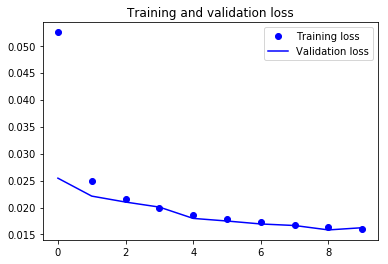

In [19]:
loss = autoencoder_trian.history['loss']
val_loss = autoencoder_trian.history['val_loss']
epochs = range (epoch)
plt.figure()
plt.plot(epochs, loss,'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Test images


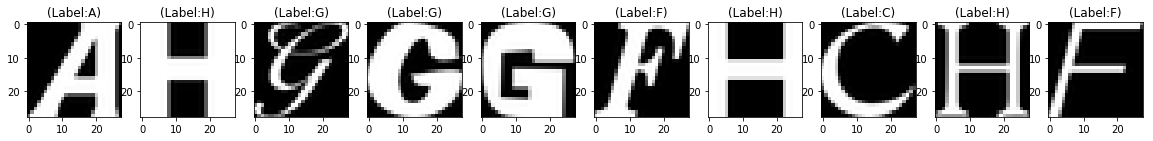

Test images with Noise


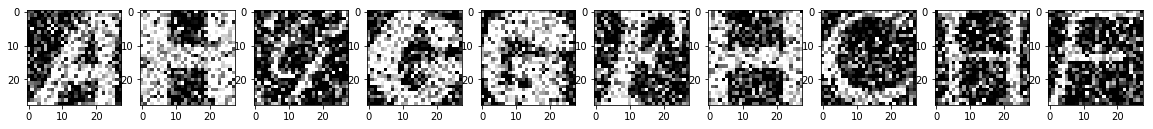

Reconstruction of Noisy Test Image


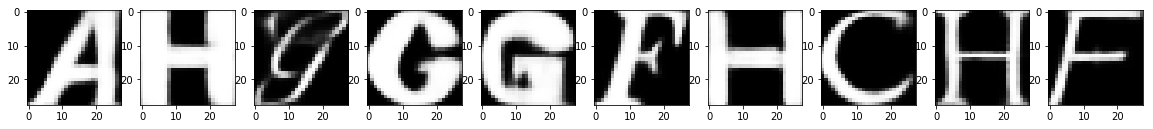

In [21]:
# predict test dataset
pred = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(20,4))
print("Test images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i,...,0], cmap='gray')
    curr_lbl = test_labels[i]
    plt.title("(Label:"+str(label_dict[curr_lbl])+")")
plt.show()

plt.figure(figsize=(20,4))
print("Test images with Noise")
for i in range(10,20,1):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test_noisy[i,...,0],cmap='gray')
plt.show()

plt.figure(figsize=(20,4))
print("Reconstruction of Noisy Test Image")
for i in range(10,20,1):
    plt.subplot(2,10,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()